# Accion Technical Assesment - Yash Kanakia

## **Objective**  
----------------------

* To identify the different factors that drive default max DPD 20 days the first 6 months (Default_20_6)
* To build a model to predict if a client will default or not max DPD 20 days the first 6 months (Default_20_6)

### **Importing the necessary libraries/ Importando Librerias**

In [771]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, auc, 
                             precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay)
import warnings
warnings.filterwarnings("ignore")

### **Reading the dataset / Leer la base de datos**

In [773]:
#Read CSV File
df = pd.read_csv("Accion_TechnicalAssesment_data.csv")
#File Preview
df.head()

CustomerId   LoanId  LoanCycle  LoanCycle_group_weight  MonthDisbursed  \
0      933753  2193834          2                       2          202208   
1     1135335  1935807          1                       1          202205   
2      831664  1991992          2                       2          202206   
3      899786  2218327          1                       1          202208   
4     1154490  1997158          1                       1          202206   

  first_disbursement_date Disbursement Date Disbursement Date Renewed  \
0          11/4/2021 0:00    8/23/2022 0:00                 7/13/2023   
1          5/30/2022 0:00    5/30/2022 0:00                 3/14/2023   
2          9/10/2021 0:00    6/21/2022 0:00                 4/11/2023   
3         10/21/2021 0:00    8/25/2022 0:00                  6/1/2023   
4          6/22/2022 0:00    6/22/2022 0:00                  6/7/2023   

   Customer_Vintage  Customer_Vintage_group  ...  Default_20_12_C  \
0                20                       1  ...              NaN   
1                10                       0  ...              NaN   
2                19                       1  ...              NaN   
3                20                       1  ...              NaN   
4                12                       1  ...              NaN   

   Default_25_3_C  Default_25_6_C  Default_25_9_C Default_25_12_C  \
0            GOOD            GOOD             NaN             NaN   
1            GOOD            GOOD            GOOD             NaN   
2            GOOD            GOOD             BAD             NaN   
3            GOOD            GOOD            GOOD             NaN   
4            GOOD            GOOD            GOOD             NaN   

  Default_30_3_C  Default_30_6_C Default_30_9_C  Default_30_12_C  \
0           GOOD            GOOD            NaN              NaN   
1           GOOD            GOOD           GOOD              NaN   
2           GOOD            GOOD            BAD              NaN   
3           GOOD            GOOD           GOOD              NaN   
4           GOOD            GOOD           GOOD              NaN   

  NoOfGroupCustomers  
0                 17  
1                 21  
2                 25  
3                 25  
4                 20  

[5 rows x 1002 columns]

### **Checking the info of the data**

In [775]:
#File and Columns Resume
df.shape

(18029, 1002)

### **Printing the info**

In [777]:
#Variable Type
pd.options.display.max_info_columns
df.info(verbose=True, max_cols=None, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18029 entries, 0 to 18028
Data columns (total 1002 columns):
 #     Column                                      Non-Null Count  Dtype  
---    ------                                      --------------  -----  
 0     CustomerId                                  18029 non-null  int64  
 1     LoanId                                      18029 non-null  int64  
 2     LoanCycle                                   18029 non-null  int64  
 3     LoanCycle_group_weight                      18029 non-null  int64  
 4     MonthDisbursed                              18029 non-null  int64  
 5     first_disbursement_date                     18029 non-null  object 
 6     Disbursement Date                           18029 non-null  object 
 7     Disbursement Date Renewed                   18029 non-null  object 
 8     Customer_Vintage                            18029 non-null  int64  
 9     Customer_Vintage_group                      18029 non-nul

**Observations:**

<h4>Total Size of File: 138 MB</h4>
<h4>Total Columns: 1002</h4>
<ul>
  <li>Float: 841</li>
  <li>Integer: 120</li>
  <li>Object: 41</li></ul>

</div>

</div>


## Exploratory Data Analysis

### ** Excluide last loan maturity smaller than 6 from the Dateframe ** 

In [782]:
df['NUMOBS_DPD2'].value_counts()

NUMOBS_DPD2
9     7370
10    5142
11    3158
8     1238
12     728
7      279
6       43
4       16
5       16
3       13
2       11
13       7
1        4
14       4
Name: count, dtype: int64

In [783]:
df2=df[((df["NUMOBS_DPD2"] >5))]

In [784]:
df2['NUMOBS_DPD2'].value_counts()

NUMOBS_DPD2
9     7370
10    5142
11    3158
8     1238
12     728
7      279
6       43
13       7
14       4
Name: count, dtype: int64

### ** Feature Selection ** 

In [786]:
#Excluding Variables (dates, already agruppated, repeat, IDs)

In [787]:
#Feature Selection: excluding others defaults
df2 = df2.drop(['Default_5_3', 'Default_10_3', 'Default_15_3', 'Default_20_3', 'Default_25_3', 'Default_30_3', 'Default_5_6', 'Default_10_6', 'Default_15_6', 'Default_25_6', 'Default_30_6', 'Default_5_9', 'Default_10_9', 'Default_15_9', 'Default_20_9', 'Default_25_9', 'Default_30_9', 'Default_5_3_C', 'Default_5_6_C', 'Default_5_9_C', 'Default_10_3_C', 'Default_10_6_C', 'Default_10_9_C', 'Default_15_3_C', 'Default_15_6_C', 'Default_15_9_C', 'Default_20_3_C', 'Default_20_6_C', 'Default_20_9_C', 'Default_25_3_C', 'Default_25_6_C', 'Default_25_9_C', 'Default_30_3_C', 'Default_30_6_C', 'Default_30_9_C' , 'Default_5_12', 'Default_10_12', 'Default_15_12', 'Default_20_12', 'Default_25_12', 'Default_30_12', 'Default_5_12_C', 'Default_10_12_C', 'Default_15_12_C', 'Default_20_12_C', 'Default_25_12_C', 'Default_30_12_C'], axis=1)

### **Printing the info with exclutions**

In [789]:
#Variable Type
pd.options.display.max_info_columns
df2.info(verbose=True, max_cols=None, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 17969 entries, 0 to 18028
Data columns (total 955 columns):
 #    Column                                      Non-Null Count  Dtype  
---   ------                                      --------------  -----  
 0    CustomerId                                  17969 non-null  int64  
 1    LoanId                                      17969 non-null  int64  
 2    LoanCycle                                   17969 non-null  int64  
 3    LoanCycle_group_weight                      17969 non-null  int64  
 4    MonthDisbursed                              17969 non-null  int64  
 5    first_disbursement_date                     17969 non-null  object 
 6    Disbursement Date                           17969 non-null  object 
 7    Disbursement Date Renewed                   17969 non-null  object 
 8    Customer_Vintage                            17969 non-null  int64  
 9    Customer_Vintage_group                      17969 non-null  int64  
 10   C

In [790]:
df2.isnull().sum().sort_values(ascending=False)

F12M_Amount_Max_DPD2_120_150             17231
L12M_Max_principal_amount_in_arrears     17231
F12M_AmountNextbucket_To_P1_30           17231
F12M_#Nextbucket_P61_90_To_P91_120       17231
F12M_#Nextbucket_P31_60_To_P61_90        17231
                                         ...  
L3M_#Nextbucket_P61_90_To_P91_120            0
L3M_AmountNextbucket_To_P1_30                0
L3M_AmountNextbucket_P1_30_To_P31_60         0
L3M_AmountNextbucket_P31_60_To_P61_90        0
NoOfGroupCustomers                           0
Length: 955, dtype: int64

In [791]:
# Check for duplicates
duplicates = df2.duplicated()
print(df2[duplicates])  # Display duplicate rows

       CustomerId   LoanId  LoanCycle  LoanCycle_group_weight  MonthDisbursed  \
1432      1138924  1949088          1                       1          202206   
1505      1108060  1868028          1                       1          202204   
1506       871782  2076618          2                       2          202207   
1511      1165072  2026657          1                       1          202206   
1561       994798  2234268          2                       2          202208   
...           ...      ...        ...                     ...             ...   
18024     1094083  1837791          1                       1          202203   
18025      943633  2249120          1                       1          202209   
18026     1072981  1795562          1                       1          202205   
18027     1120386  1898042          1                       1          202205   
18028     1112705  1878744          1                       1          202204   

      first_disbursement_da

In [792]:
len(df2['CustomerId'].unique())

9775

In [793]:
df2.shape

(17969, 955)

In [794]:
# Drop duplicate rows
df2 = df2.drop_duplicates()
df2.shape

(9775, 955)

In [795]:
len(df2['CustomerId'].unique())

9775

In [796]:
missing_values = df2.isnull().sum() / len(df2) * 100
print(missing_values[missing_values > 0])

legnth_of_business                         38.219949
data_jangkawaktu                            1.503836
F9M_Max_InterestRate                        8.890026
F9M_Max_LoanAmount                          8.890026
F9M_Max_InstallmentAmount                   8.890026
                                             ...    
L12M_AmountRecovery_P31_60_From_P61_90     95.897698
L12M_AmountRecovery_P61_90_From_P91_180    95.897698
L12M_POutstanding_DPD2                     95.897698
L12M_WMDPD2_desc_DPD2                      95.897698
L12M_WMDPD2_asc_DPD2                       95.897698
Length: 401, dtype: float64


# CATEGORICAL VARIABLES

In [798]:
categorical_cols = df2.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_cols)

['first_disbursement_date', 'Disbursement Date', 'Disbursement Date Renewed', 'date_of_birth', 'marital_status', 'latest_education', 'provinsi', 'provinsi_group', 'kabupaten_kota', 'kecamatan', 'kelurahan', 'source_of_income', 'business_field', 'business_field_group_weight', 'industry_subsector', 'Product Name', 'Disbursement Date Renew']


In [799]:
df2[['first_disbursement_date', 'Disbursement Date', 'Disbursement Date Renewed', 'date_of_birth', 'marital_status', 'latest_education', 'provinsi', 'provinsi_group', 'kabupaten_kota', 'kecamatan', 'kelurahan', 'source_of_income', 'business_field', 'business_field_group_weight', 'industry_subsector',
     'Product Name', 'Disbursement Date Renew']]

first_disbursement_date Disbursement Date Disbursement Date Renewed  \
0              11/4/2021 0:00    8/23/2022 0:00                 7/13/2023   
1              5/30/2022 0:00    5/30/2022 0:00                 3/14/2023   
2              9/10/2021 0:00    6/21/2022 0:00                 4/11/2023   
3             10/21/2021 0:00    8/25/2022 0:00                  6/1/2023   
4              6/22/2022 0:00    6/22/2022 0:00                  6/7/2023   
...                       ...               ...                       ...   
17985         11/10/2021 0:00    8/17/2022 0:00                  6/7/2023   
18008          4/14/2022 0:00    4/14/2022 0:00                  5/2/2023   
18012          4/14/2022 0:00    4/14/2022 0:00                  4/5/2023   
18017          7/26/2021 0:00    6/16/2022 0:00                 3/28/2023   
18022          3/16/2022 0:00    3/16/2022 0:00                 3/30/2023   

      date_of_birth marital_status              latest_education  \
0         7/31/1984        Menikah               SMA & Sederajat   
1         8/18/1969        Menikah  Perguruan Tinggi & Sederajat   
2         9/20/1984        Menikah                SD & Sederajat   
3          2/7/1993        Menikah               SMP & Sederajat   
4        10/10/1981        Menikah                SD & Sederajat   
...             ...            ...                           ...   
17985     3/12/1979        Menikah               SMA & Sederajat   
18008     3/27/1969        Menikah                SD & Sederajat   
18012      8/4/1968        Menikah               SMA & Sederajat   
18017      7/6/1982        Menikah                SD & Sederajat   
18022     5/25/1990        Menikah               SMA & Sederajat   

               provinsi provinsi_group      kabupaten_kota  \
0            JAWA TIMUR             A1             MAGETAN   
1        Sumatera Barat             C2         Bukittinggi   
2      SUMATERA SELATAN             C1           BANYUASIN   
3            JAWA TIMUR             A1             JOMBANG   
4      SUMATERA SELATAN             C1      MUSI BANYUASIN   
...                 ...            ...                 ...   
17985  SUMATERA SELATAN             C1  OGAN KOMERING ILIR   
18008        JAWA BARAT             A2            KARAWANG   
18012        JAWA TIMUR             A1            SURABAYA   
18017  SUMATERA SELATAN             C1           PALEMBANG   
18022    SUMATERA UTARA             C2              BINJAI   

                     kecamatan          kelurahan source_of_income  \
0                       PARANG             PARANG      hasil_usaha   
1      Mandiangin Koto Selayan  Puhun Pintu Kabun      hasil_usaha   
2                  BANYUASIN I         TIRTO SARI      hasil_usaha   
3                         GUDO  BUGASUR KEDALEMAN      hasil_usaha   
4              BATANGHARI LEKO        TANAH ABANG      hasil_usaha   
...                        ...                ...              ...   
17985               KAYU AGUNG             TELOKO      hasil_usaha   
18008                BANYUSARI          MEKARASIH      hasil_usaha   
18012                WONOKROMO              DARMO      hasil_usaha   
18017                    PLAJU       TALANG PUTRI      hasil_usaha   
18022             BINJAI TIMUR       SUMBER KARYA      hasil_usaha   

      business_field business_field_group_weight     industry_subsector  \
0         Peternakan                  Peternakan            Ternak Ikan   
1               Jasa                      others             Modal Toko   
2          Pertanian                   Pertanian              Tani Cabe   
3          Pertanian                   Pertanian              Tani Padi   
4        Perdagangan                 Perdagangan    Dagang Warung Kecil   
...              ...                         ...                    ...   
17985    Perdagangan                 Perdagangan    Dagang Warung Makan   
18008     Peternakan                  Peternakan         Ternak Kambing   
180

In [800]:
df2.shape

(9775, 955)

In [801]:
df2 = df2.drop(['Disbursement Date Renewed'],axis=1)
df2.shape

(9775, 954)

In [802]:
# Convert columns to datetime and format as 'dd/mm/YYYY'
df2['first_disbursement_date'] = pd.to_datetime(df2['first_disbursement_date']).dt.strftime('%d/%m/%Y')
df2['Disbursement Date'] = pd.to_datetime(df2['Disbursement Date']).dt.strftime('%d/%m/%Y')
df2['date_of_birth'] = pd.to_datetime(df2['date_of_birth']).dt.strftime('%d/%m/%Y')
df2['Disbursement Date Renew'] = pd.to_datetime(df2['Disbursement Date Renew']).dt.strftime('%d/%m/%Y')

df2[['first_disbursement_date', 'Disbursement Date','date_of_birth','Disbursement Date Renew']].head()

first_disbursement_date Disbursement Date date_of_birth  \
0              04/11/2021        23/08/2022    31/07/1984   
1              30/05/2022        30/05/2022    18/08/1969   
2              10/09/2021        21/06/2022    20/09/1984   
3              21/10/2021        25/08/2022    07/02/1993   
4              22/06/2022        22/06/2022    10/10/1981   

  Disbursement Date Renew  
0              13/07/2023  
1              14/03/2023  
2              11/04/2023  
3              01/06/2023  
4              07/06/2023

In [803]:
categorical_cols = df2.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_cols)

['first_disbursement_date', 'Disbursement Date', 'date_of_birth', 'marital_status', 'latest_education', 'provinsi', 'provinsi_group', 'kabupaten_kota', 'kecamatan', 'kelurahan', 'source_of_income', 'business_field', 'business_field_group_weight', 'industry_subsector', 'Product Name', 'Disbursement Date Renew']


In [804]:
df2.info(verbose=True, max_cols=None, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 9775 entries, 0 to 18022
Data columns (total 954 columns):
 #    Column                                      Non-Null Count  Dtype  
---   ------                                      --------------  -----  
 0    CustomerId                                  9775 non-null   int64  
 1    LoanId                                      9775 non-null   int64  
 2    LoanCycle                                   9775 non-null   int64  
 3    LoanCycle_group_weight                      9775 non-null   int64  
 4    MonthDisbursed                              9775 non-null   int64  
 5    first_disbursement_date                     9775 non-null   object 
 6    Disbursement Date                           9775 non-null   object 
 7    Customer_Vintage                            9775 non-null   int64  
 8    Customer_Vintage_group                      9775 non-null   int64  
 9    Customer_Vintage_group_weight               9775 non-null   int64  
 10   Ag

### **Univariate analysis for categorical variables**

In [806]:
df2[['marital_status', 'latest_education', 'provinsi', 'provinsi_group', 
                    'kabupaten_kota', 'kecamatan', 'kelurahan', 'source_of_income', 
                    'business_field', 'business_field_group_weight', 'industry_subsector', 
                    'Product Name']].head()

marital_status              latest_education          provinsi  \
0        Menikah               SMA & Sederajat        JAWA TIMUR   
1        Menikah  Perguruan Tinggi & Sederajat    Sumatera Barat   
2        Menikah                SD & Sederajat  SUMATERA SELATAN   
3        Menikah               SMP & Sederajat        JAWA TIMUR   
4        Menikah                SD & Sederajat  SUMATERA SELATAN   

  provinsi_group  kabupaten_kota                kecamatan          kelurahan  \
0             A1         MAGETAN                   PARANG             PARANG   
1             C2     Bukittinggi  Mandiangin Koto Selayan  Puhun Pintu Kabun   
2             C1       BANYUASIN              BANYUASIN I         TIRTO SARI   
3             A1         JOMBANG                     GUDO  BUGASUR KEDALEMAN   
4             C1  MUSI BANYUASIN          BATANGHARI LEKO        TANAH ABANG   

  source_of_income business_field business_field_group_weight  \
0      hasil_usaha     Peternakan                  Peternakan   
1      hasil_usaha           Jasa                      others   
2      hasil_usaha      Pertanian                   Pertanian   
3      hasil_usaha      Pertanian                   Pertanian   
4      hasil_usaha    Perdagangan                 Perdagangan   

    industry_subsector Product Name  
0          Ternak Ikan   Group Loan  
1           Modal Toko   Group Loan  
2            Tani Cabe   Group Loan  
3            Tani Padi   Group Loan  
4  Dagang Warung Kecil   Group Loan

In [807]:
for i in categorical_cols:
    print("Feature :",i)
    print("Unique Values :",len(df2[i].unique()))
    print("\n")

Feature : first_disbursement_date
Unique Values : 931


Feature : Disbursement Date
Unique Values : 190


Feature : date_of_birth
Unique Values : 6400


Feature : marital_status
Unique Values : 3


Feature : latest_education
Unique Values : 5


Feature : provinsi
Unique Values : 30


Feature : provinsi_group
Unique Values : 6


Feature : kabupaten_kota
Unique Values : 288


Feature : kecamatan
Unique Values : 1728


Feature : kelurahan
Unique Values : 4574


Feature : source_of_income
Unique Values : 6


Feature : business_field
Unique Values : 6


Feature : business_field_group_weight
Unique Values : 4


Feature : industry_subsector
Unique Values : 156


Feature : Product Name
Unique Values : 1


Feature : Disbursement Date Renew
Unique Values : 109




In [808]:
df2[['marital_status', 'latest_education', 'provinsi', 'provinsi_group', 
                    'kabupaten_kota', 'kecamatan', 'kelurahan', 'source_of_income', 
                    'business_field', 'business_field_group_weight', 'industry_subsector', 
                    'Product Name']].nunique()<10

marital_status                  True
latest_education                True
provinsi                       False
provinsi_group                  True
kabupaten_kota                 False
kecamatan                      False
kelurahan                      False
source_of_income                True
business_field                  True
business_field_group_weight     True
industry_subsector             False
Product Name                    True
dtype: bool

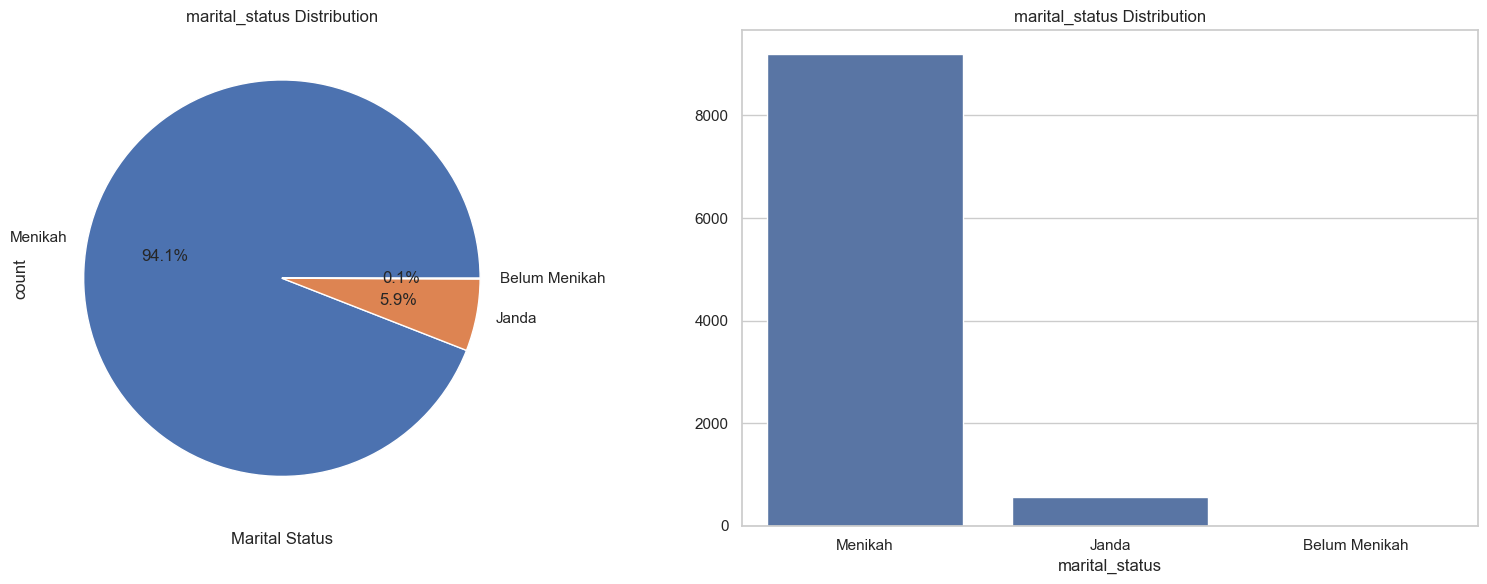

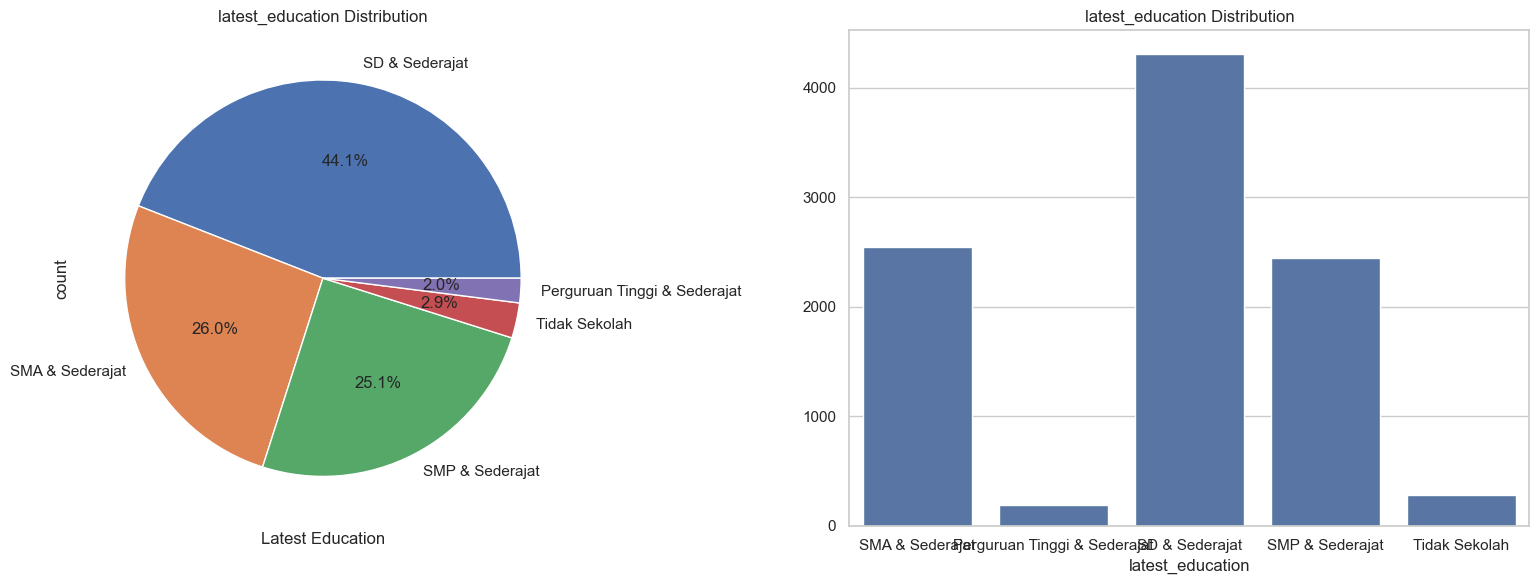

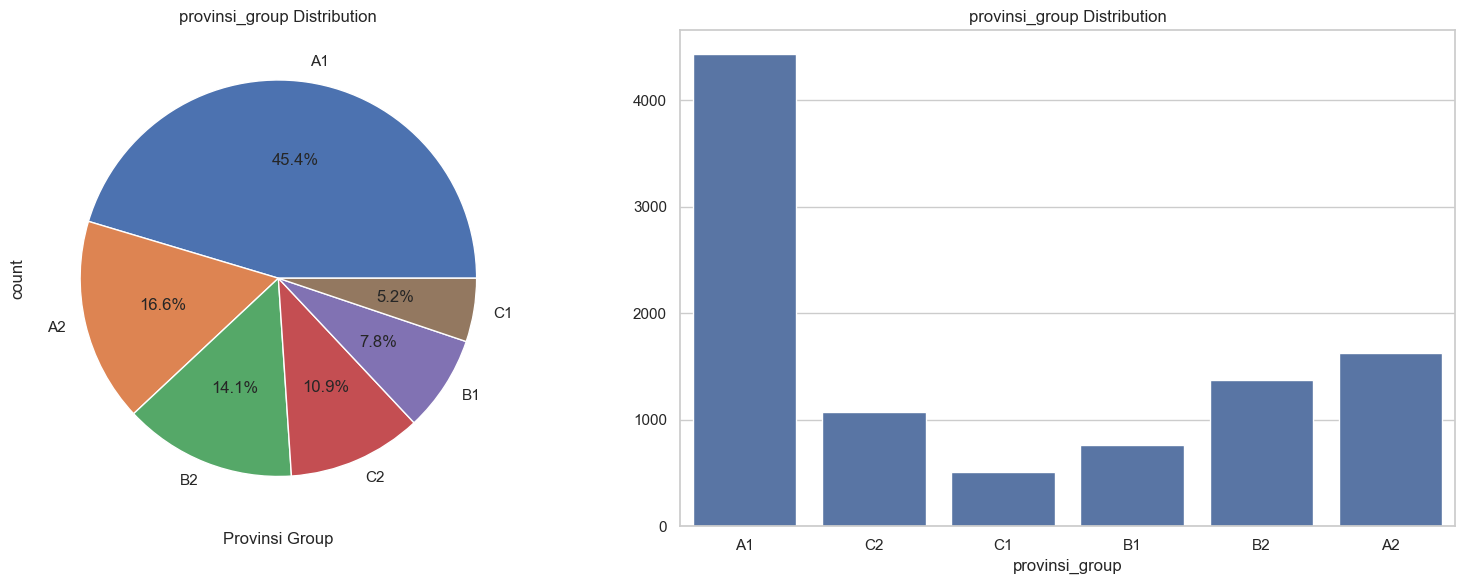

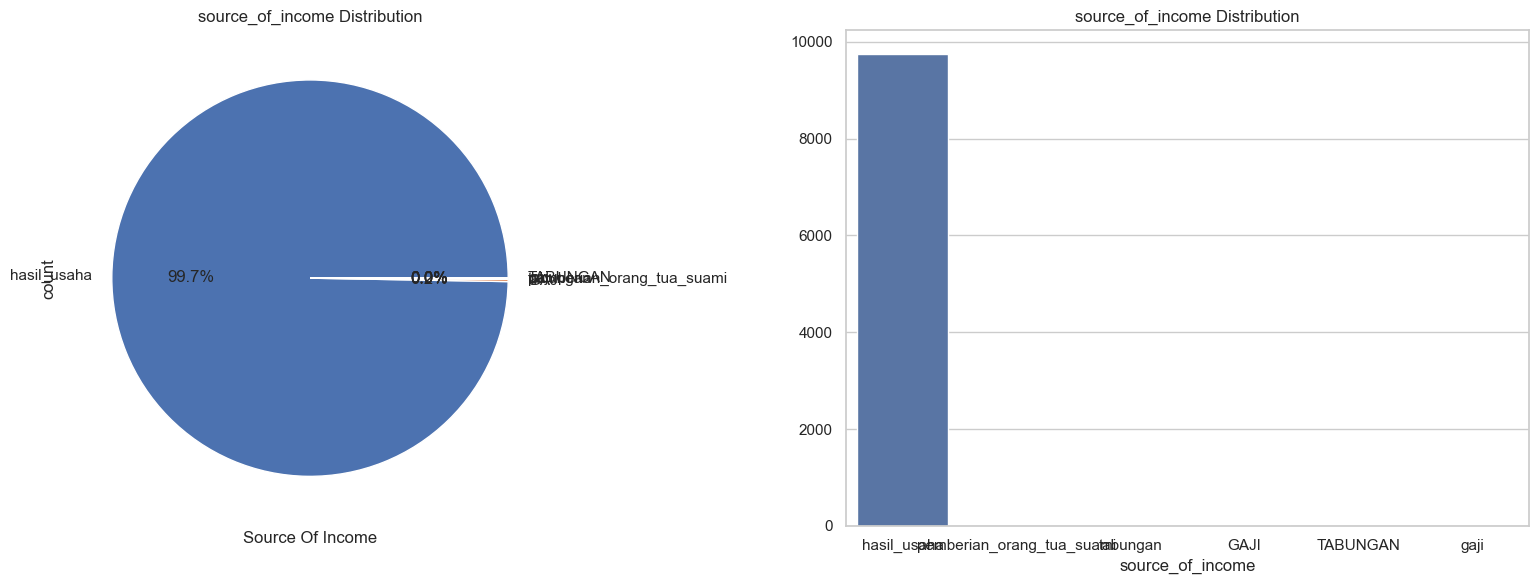

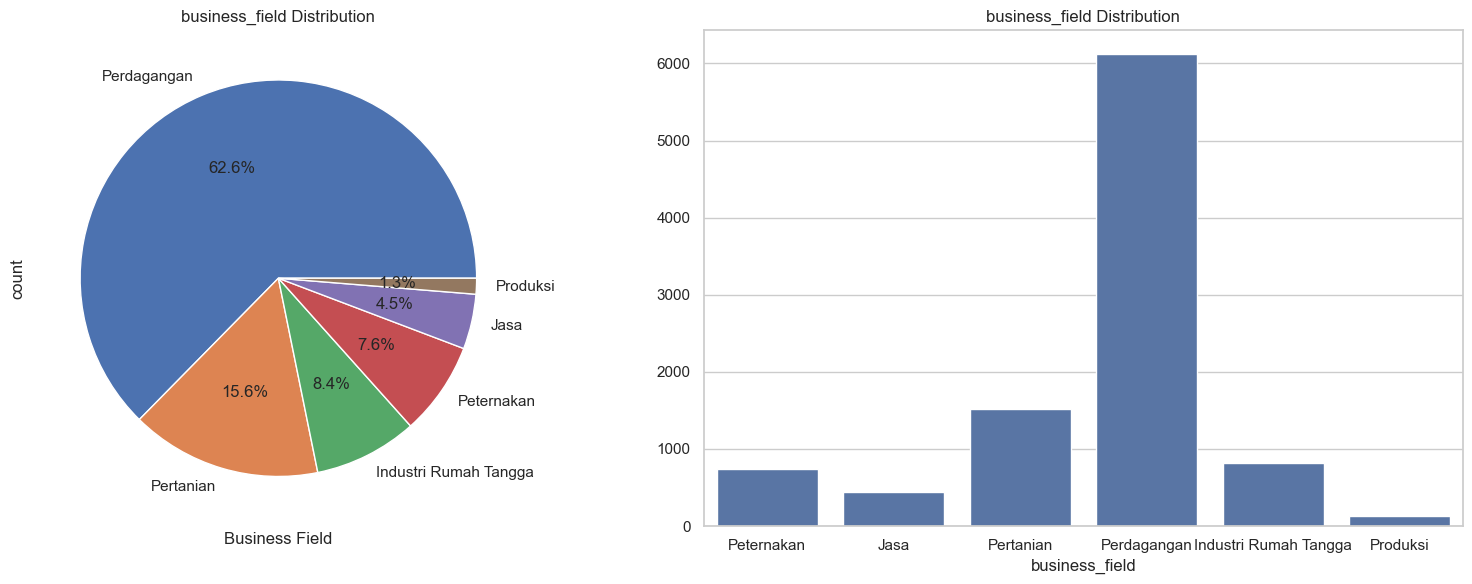

In [809]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical variables to visualize
categorical_vars = ['marital_status', 'latest_education', 'provinsi_group', 'source_of_income', 
                    'business_field']

# Loop through each variable
for var in categorical_vars:
    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Count plot for the variable
    sns.countplot(data=df2, x=var)
    axes[0].set_title(f'{var} Distribution')
    axes[0].set_xlabel(var.replace('_', ' ').title())
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=45)  # Rotate x-ticks for better readability
    
    # Pie chart for the variable's distribution
    var_counts = df2[var].value_counts()
    var_counts.plot.pie(autopct='%1.1f%%', ax=axes[0])
    axes[1].set_title(f'{var} Distribution')
    axes[1].set_ylabel('')
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the plots
    plt.show()

**Observations:**

<h4>Marital Status</h4>
<ul>
  <li>Menikah : 94%</li>
  <li>Janda: 5.9%</li>
  <li>Belum Menikah: 0.1%</li>
</ul>

<h4>Latest Education</h4>
<ul>
  <li>SD & Sederajat: 44%</li>
  <li>SMA & Sederajat: 26%</li>
  <li>SMP & Sederajat: 25%</li>
  <li>Tidak Sekolah: 3%</li>
  <li>Perguruan Tinggi & Sederajat: 2%</li>
</ul>

<h4>Provinci Group</h4>
<ul>
  <li>A1: 45%</li>
  <li>A2: 17%</li>
  <li>B2: 14%</li>
  <li>C2: 11%</li>
  <li>B1: 8%</li>
  <li>C1: 5%</li>
</ul>

<h4>Source of Income</h4>
<ul>
  <li>hasil_usaha: 99.7%</li>
  <li>others: 0.3%</li>
</ul>

<h4>Business Field Group</h4>
<ul>
  <li>Perdagangan: 63%</li>
  <li>Pertanian: 16%</li>
  <li>Industri Rummah Tangga: 8%</li>
  <li>Peternakan: 8%</li>
  <li>Jasa: 5%</li>
  <li>Produski: 1%</li>
</ul>

### Bivariate analysis of categorical 

source_of_income  GAJI  TABUNGAN  gaji  hasil_usaha  \
marital_status                                        
Belum Menikah        0         0     0            6   
Janda                1         0     0          573   
Menikah             18         1     1         9169   

source_of_income  pemberian_orang_tua_suami  tabungan  
marital_status                                         
Belum Menikah                             0         0  
Janda                                     0         0  
Menikah                                   4         2  


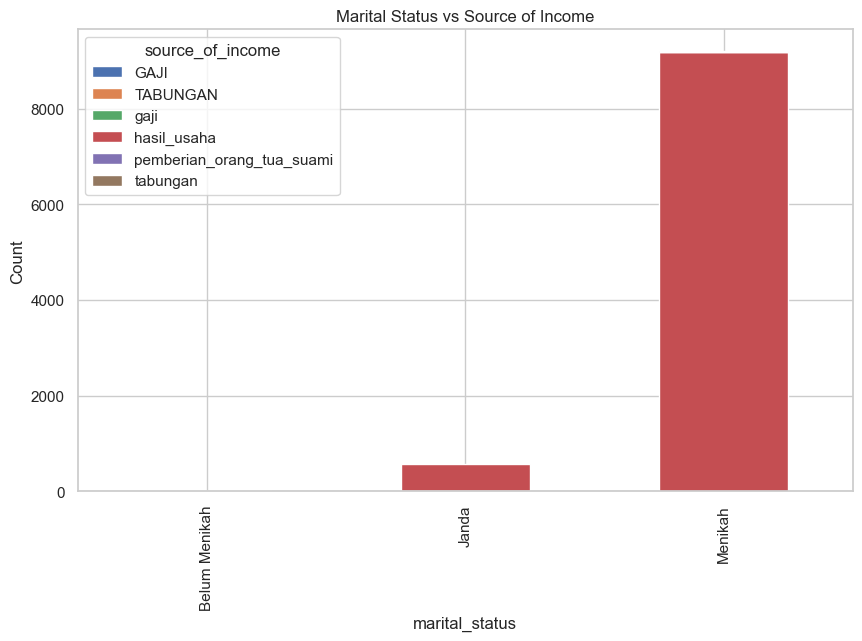

In [812]:
# Example: Cross-tab and bar plot for marital_status and source_of_income
crosstab = pd.crosstab(df2['marital_status'], df2['source_of_income'])
print(crosstab)

crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Marital Status vs Source of Income')
plt.ylabel('Count')
plt.show()

Chi-Square Test between marital_status and latest_education:
Chi-square statistic: 17.101124313123307
p-value: 0.02907313766395077



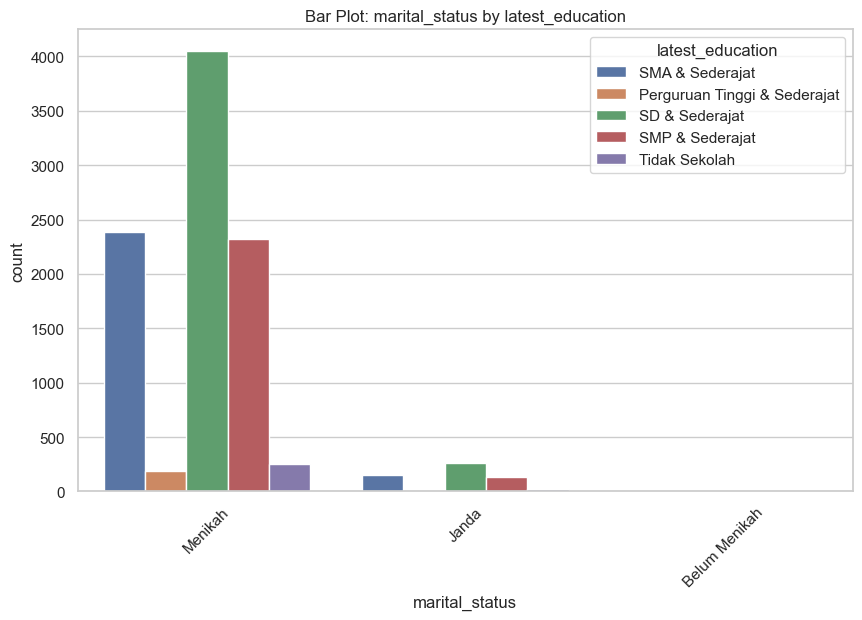

Chi-Square Test between marital_status and provinsi_group:
Chi-square statistic: 46.959253502460676
p-value: 9.605224769323403e-07



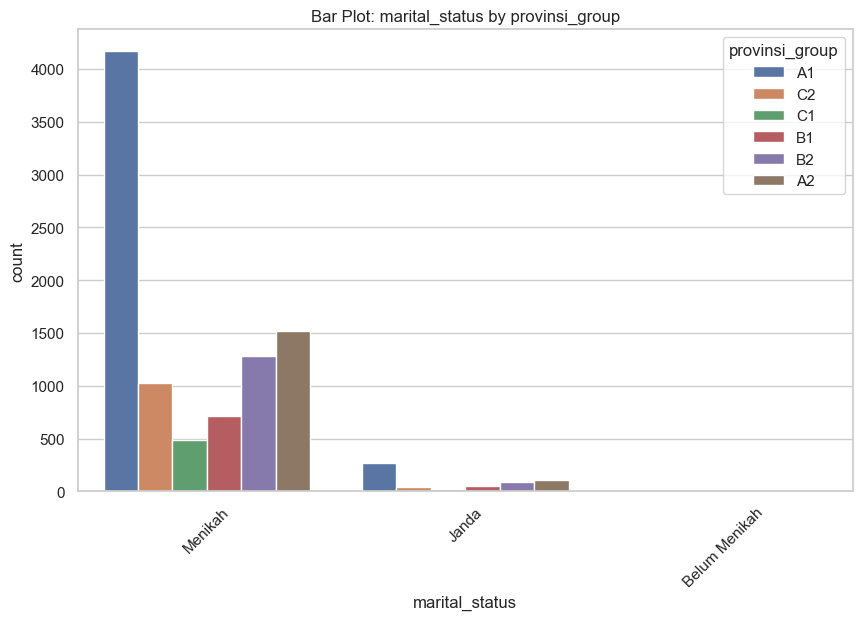

Chi-Square Test between marital_status and source_of_income:
Chi-square statistic: 0.5298753310431579
p-value: 0.9999912710892029



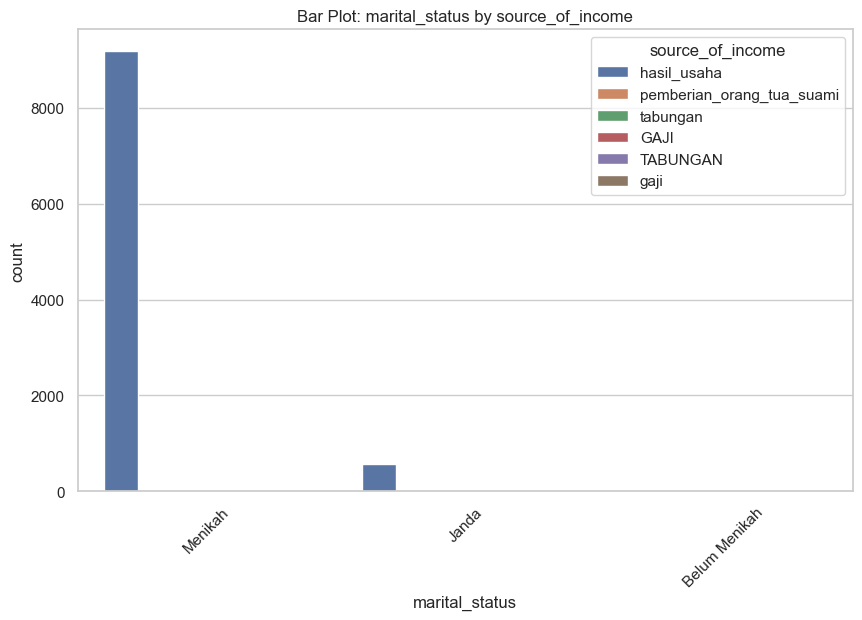

Chi-Square Test between marital_status and business_field:
Chi-square statistic: 51.6834150831362
p-value: 1.3058872397930684e-07



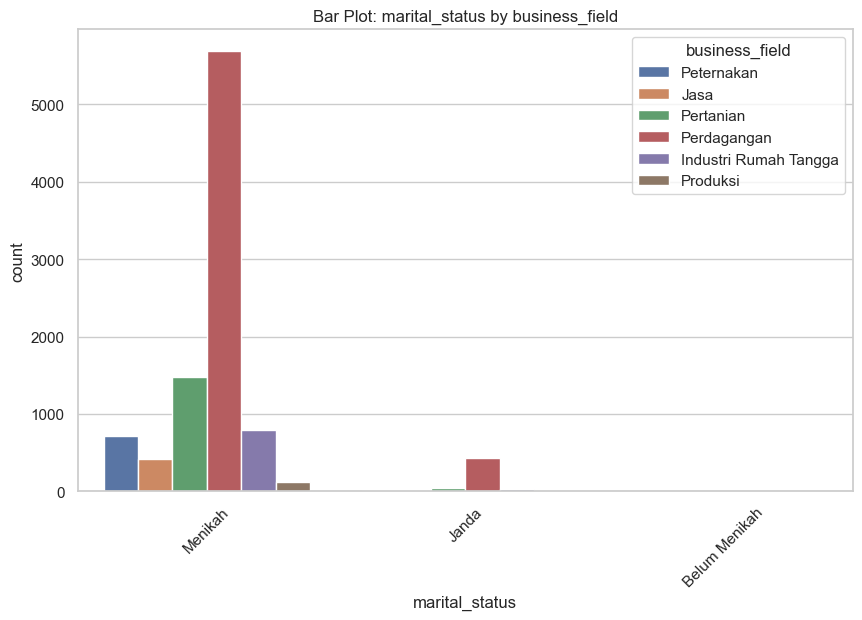

Chi-Square Test between latest_education and provinsi_group:
Chi-square statistic: 353.03713661194877
p-value: 1.0541447884000935e-62



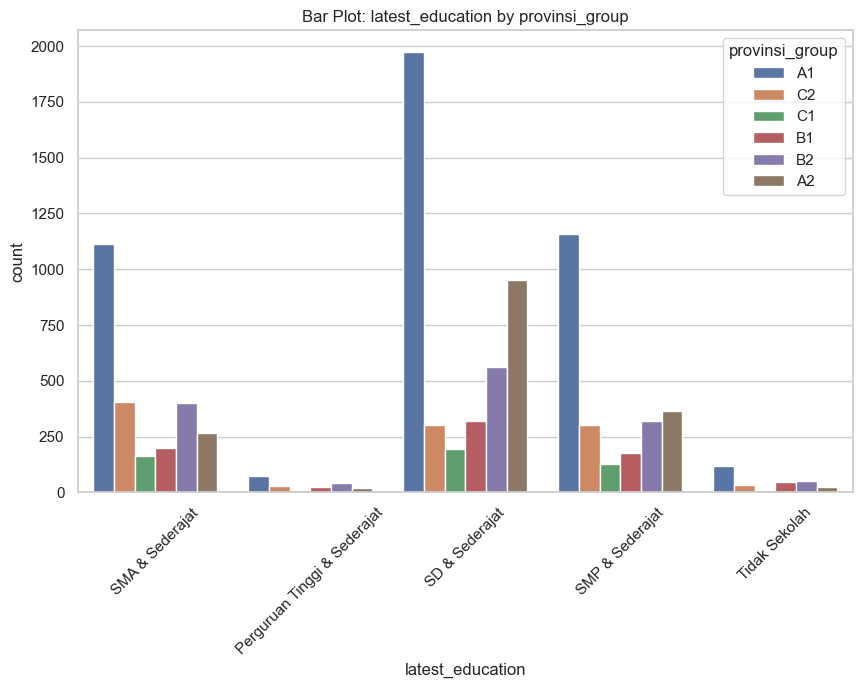

Chi-Square Test between latest_education and source_of_income:
Chi-square statistic: 13.15593725634449
p-value: 0.8705936213765779



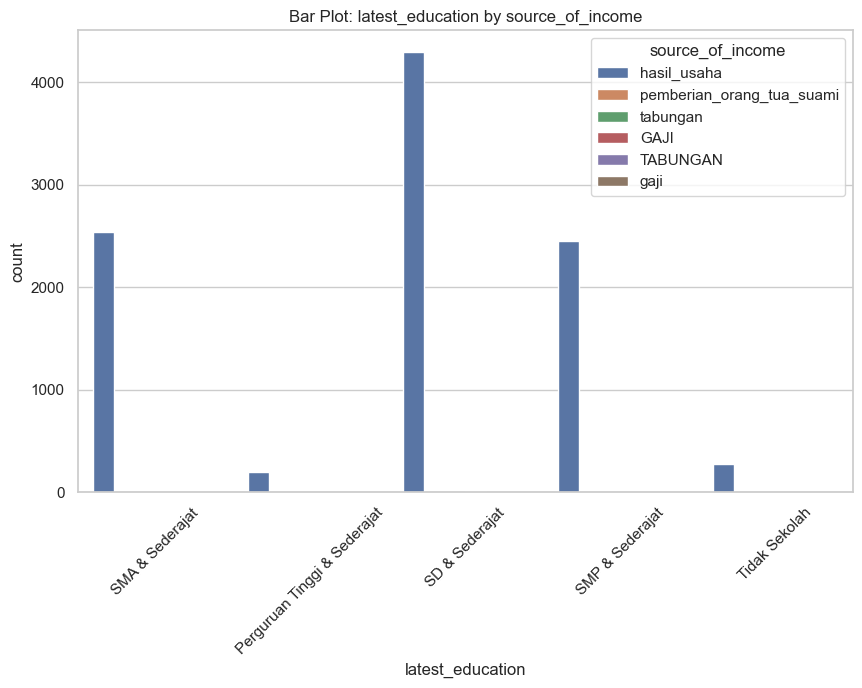

Chi-Square Test between latest_education and business_field:
Chi-square statistic: 251.92700418984847
p-value: 4.6676629001852666e-42



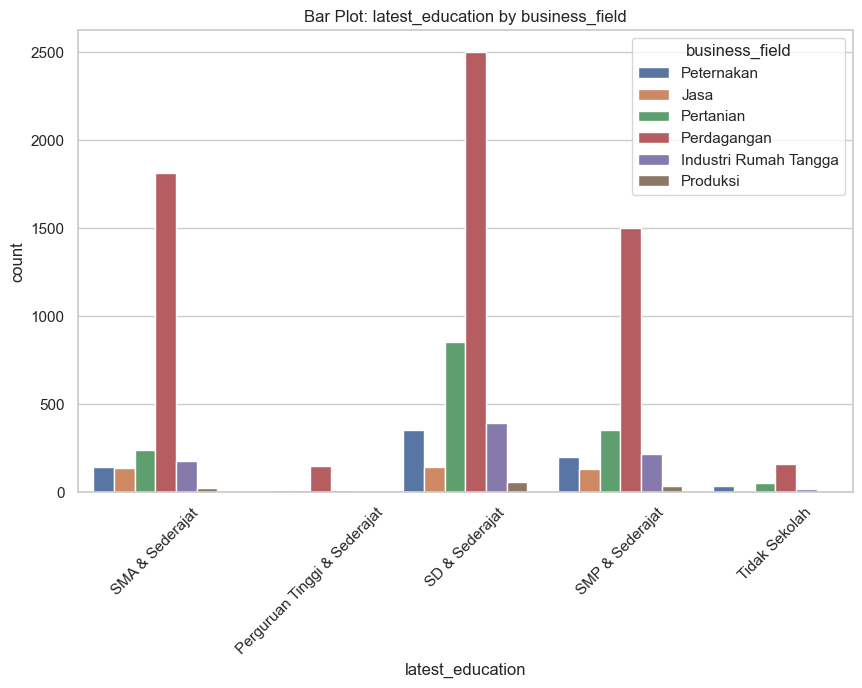

Chi-Square Test between provinsi_group and source_of_income:
Chi-square statistic: 27.255399663536338
p-value: 0.3432472384756315



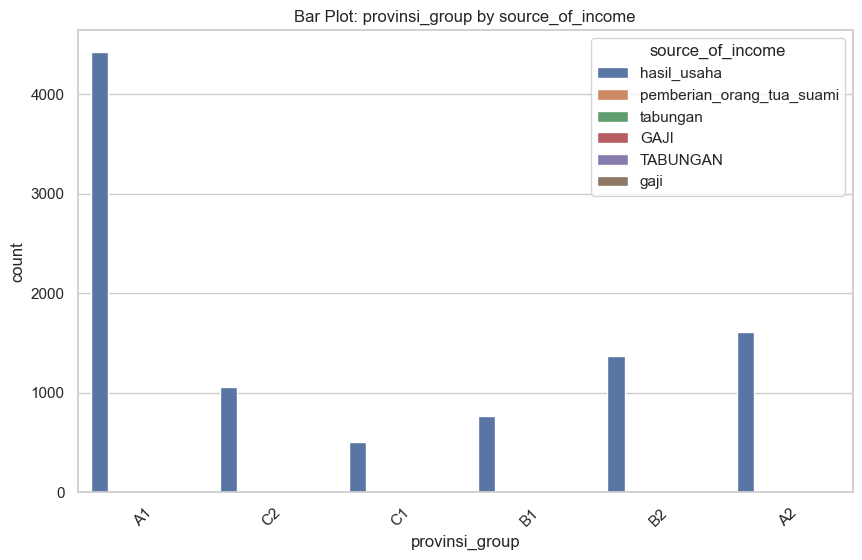

Chi-Square Test between provinsi_group and business_field:
Chi-square statistic: 1006.9249592514926
p-value: 1.9744032425918803e-196



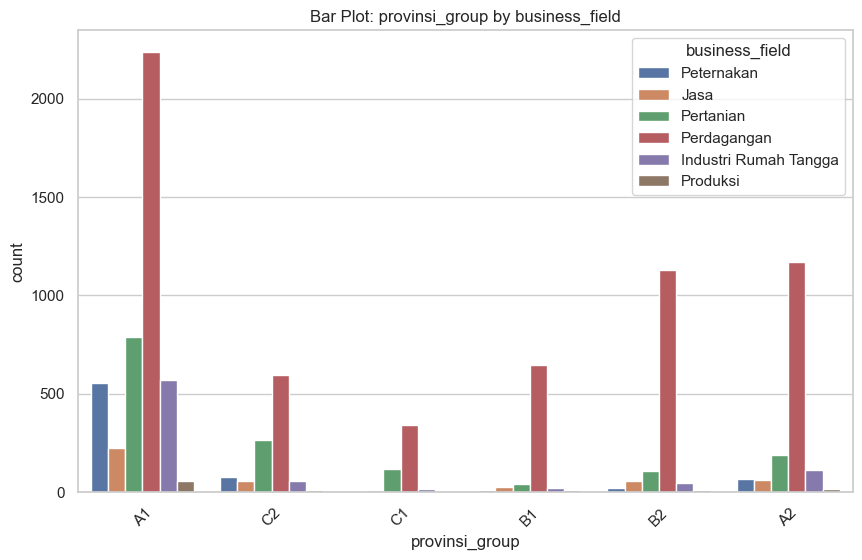

Chi-Square Test between source_of_income and business_field:
Chi-square statistic: 8.641569261414807
p-value: 0.9990077142032752



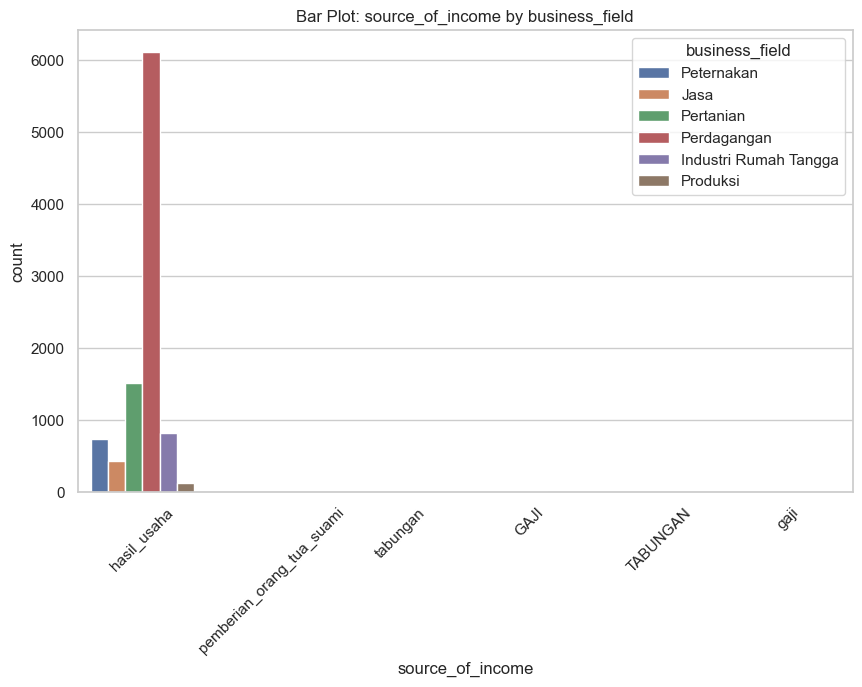

In [813]:
# Loop through the pairs of categorical variables for bivariate analysis
for i in range(len(categorical_vars)):
    for j in range(i + 1, len(categorical_vars)):
        var1 = categorical_vars[i]
        var2 = categorical_vars[j]
        
        # Chi-Square Test
        print(f"Chi-Square Test between {var1} and {var2}:")
        contingency_table = pd.crosstab(df2[var1], df2[var2])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        print(f"Chi-square statistic: {chi2}")
        print(f"p-value: {p}\n")
        
        # Bar Plot (Hue)
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df2, x=var1, hue=var2)
        plt.title(f"Bar Plot: {var1} by {var2}")
        plt.xticks(rotation=45)
        plt.show()

**Observations:**

<h4>Chi Square Test</h4>
<ul>
  <li>Marital Status, Latest Education, Business Field, and Province Group are statistically significant since p-value is less than 0.05</li>
  <li>Source of Income does not depend on any of the above as p-values are greater than 0.05</li>
</ul>

### **Univariate analysis of numerical columns**

In [816]:
numerical_cols = df2.select_dtypes(include=['int', 'float']).columns.tolist()
print(numerical_cols)

['CustomerId', 'LoanId', 'LoanCycle', 'LoanCycle_group_weight', 'MonthDisbursed', 'Customer_Vintage', 'Customer_Vintage_group', 'Customer_Vintage_group_weight', 'Age', 'Age_group', 'Age_group_weight', 'marital_status_Menikah', 'latest_education_group', 'kode_pos', 'legnth_of_business', 'mitra_pendapatan', 'pj_pendapatan', 'pendapatan_lain', 'majelis_id', 'data_jangkawaktu', 'LastLnnote', 'LastMonthObs_DPD2', 'NUMOBS_DPD2', 'Diff_Disb_LOD', 'Diff_Disb_LOD_group_weight', 'NUMOBS_DPD2_group', 'NUMOBS_DPD2__group_weight', 'Flag_Prepaid', 'Diff_Maturity_LOD', 'LastMonth', 'NumLoans', 'NumLoans_group_weight', 'Max_InterestRate', 'rate', 'tenor', 'Max_LoanAmount', 'Max_InstallmentAmount', 'Min_InstallmentAmount', 'Max_principal_amount_in_arrears', 'Max_interest_amount_arrears', 'MaxPrincipalInArrears_LoanAmount_DPD2', 'MaxInterestInArrears_LoanAmount_DPD2', 'Max_installment_miss', 'Max_Loan_Term_Month_DPD2', 'Vintage_Last_Loan_DPD2', 'Vintage_Last_Loan_DPD2_gruop_weight', 'ActiveMonths_DPD2',

In [817]:
len(numerical_cols)

938

In [818]:
# Descriptive statistics for numerical columns
df2.describe()

CustomerId        LoanId    LoanCycle  LoanCycle_group_weight  \
count  9.775000e+03  9.775000e+03  9775.000000             9775.000000   
mean   9.045909e+05  2.098933e+06     1.776061                1.584450   
std    3.409985e+05  1.507639e+05     1.024400                0.649884   
min    3.090000e+02  1.776975e+06     1.000000                1.000000   
25%    6.907735e+05  1.984000e+06     1.000000                1.000000   
50%    9.228850e+05  2.086166e+06     1.000000                1.000000   
75%    1.199078e+06  2.197201e+06     2.000000                2.000000   
max    1.578164e+06  2.753527e+06    12.000000                3.000000   

       MonthDisbursed  Customer_Vintage  Customer_Vintage_group  \
count     9775.000000       9775.000000             9775.000000   
mean    202207.001637         20.102097                0.655038   
std          1.933728         13.024571                0.475380   
min     202203.000000          6.000000                0.000000   
25%     202206.000000         10.000000                0.000000   
50%     202207.000000         19.000000                1.000000   
75%     202208.000000         23.000000                1.000000   
max     202301.000000        111.000000                1.000000   

       Customer_Vintage_group_weight          Age    Age_group  ...  \
count                    9775.000000  9775.000000  9775.000000  ...   
mean                        2.623018    42.942404     1.822609  ...   
std                         0.546752     9.521252     0.753846  ...   
min                         1.000000    18.000000     1.000000  ...   
25%                         2.000000    36.000000     1.000000  ...   
50%                         3.000000    43.000000     2.000000  ...   
75%                         3.000000    50.000000     2.000000  ...   
max                         3.000000    70.000000     3.000000  ...   

       L12M_AmountRecovery_P61_90_From_P91_180  L12M_POutstanding_DPD2  \
count                                    401.0              401.000000   
mean                                       0.0                0.972033   
std                                        0.0                0.013063   
min                                        0.0                0.900000   
25%                                        0.0                0.960000   
50%                                        0.0                0.980000   
75%                                        0.0                0.980000   
max                                        0.0                0.980179   

       L12M_WMDPD2_desc_DPD2  L12M_WMDPD2_asc_DPD2  LastLoanCycle  \
count             401.000000            401.000000    9775.000000   
mean                0.574478              0.094196       1.776061   
std                 2.630399              0.722064       1.024400   
min                 0.000000              0.000000       1.000000   
25%                 0.000000              0.000000       1.000000   
50%                 0.000000              0.000000       1.000000   
75%                 0.000000              0.000000       2.000000   
max                36.044444             11.515152      12.000000   

       RenewLoanLnnote  MonthDisbursed_Renew  resting_observationdate  \
count     9.775000e+03           9775.000000              9775.000000   
mean      3.199664e+06         202304.989258                 1.073862   
std       1.334764e+05              1.354493                 0.323468   
min       2.792594e+06         202303.000000                 0.000000   
25%       3.092420e+06         202304.000000                 1.000000   
50%       3.202275e+06         202305.000000                 1.000000   
75%       3.296236e+06         202306.000000                 1.000000   
max       3.495931e+06         202308.000000                 6.000000   

       Default_20_6  NoOfGroupCustomers  
count   9775.000000         9775.000000  
mean       0.103734           16.599284  
std        0.304931      

In [819]:
# List of prefixes to drop
prefixes_to_drop = ['F3', 'F6', 'F9', 'F12', 'L3', 'L6', 'L9', 'L12']

# Create a boolean mask to filter out columns that start with the specified prefixes
mask = df2.columns.str.startswith(tuple(prefixes_to_drop))

# Drop the columns that match the mask
df2 = df2.loc[:, ~mask]

df2.head()

CustomerId   LoanId  LoanCycle  LoanCycle_group_weight  MonthDisbursed  \
0      933753  2193834          2                       2          202208   
1     1135335  1935807          1                       1          202205   
2      831664  1991992          2                       2          202206   
3      899786  2218327          1                       1          202208   
4     1154490  1997158          1                       1          202206   

  first_disbursement_date Disbursement Date  Customer_Vintage  \
0              04/11/2021        23/08/2022                20   
1              30/05/2022        30/05/2022                10   
2              10/09/2021        21/06/2022                19   
3              21/10/2021        25/08/2022                20   
4              22/06/2022        22/06/2022                12   

   Customer_Vintage_group  Customer_Vintage_group_weight  ...  \
0                       1                              3  ...   
1                       0                              2  ...   
2                       1                              3  ...   
3                       1                              3  ...   
4                       1                              3  ...   

   AmountRecovery_P1_30_From_P31_60  AmountRecovery_P31_60_From_P61_90  \
0                                 0                                  0   
1                                 0                                  0   
2                                 0                                  0   
3                                 0                                  0   
4                                 0                                  0   

   AmountRecovery_P61_90_From_P91_180 LastLoanCycle RenewLoanLnnote  \
0                                   0             2         3378212   
1                                   0             1         3011540   
2                                   0             2         3104067   
3                                   0             1         3255676   
4                                   0             1         3264482   

   MonthDisbursed_Renew Disbursement Date Renew  resting_observationdate  \
0                202307              13/07/2023                        1   
1                202303              14/03/2023                        1   
2                202304              11/04/2023                        1   
3                202306              01/06/2023                        1   
4                202306              07/06/2023                        1   

  Default_20_6 NoOfGroupCustomers  
0            0                 17  
1            0                 21  
2            0                 25  
3            0                 25  
4            0                 20  

[5 rows x 157 columns]

In [820]:
numerical_cols = df2.select_dtypes(include=['int', 'float']).columns.tolist()
print(numerical_cols)

['CustomerId', 'LoanId', 'LoanCycle', 'LoanCycle_group_weight', 'MonthDisbursed', 'Customer_Vintage', 'Customer_Vintage_group', 'Customer_Vintage_group_weight', 'Age', 'Age_group', 'Age_group_weight', 'marital_status_Menikah', 'latest_education_group', 'kode_pos', 'legnth_of_business', 'mitra_pendapatan', 'pj_pendapatan', 'pendapatan_lain', 'majelis_id', 'data_jangkawaktu', 'LastLnnote', 'LastMonthObs_DPD2', 'NUMOBS_DPD2', 'Diff_Disb_LOD', 'Diff_Disb_LOD_group_weight', 'NUMOBS_DPD2_group', 'NUMOBS_DPD2__group_weight', 'Flag_Prepaid', 'Diff_Maturity_LOD', 'LastMonth', 'NumLoans', 'NumLoans_group_weight', 'Max_InterestRate', 'rate', 'tenor', 'Max_LoanAmount', 'Max_InstallmentAmount', 'Min_InstallmentAmount', 'Max_principal_amount_in_arrears', 'Max_interest_amount_arrears', 'MaxPrincipalInArrears_LoanAmount_DPD2', 'MaxInterestInArrears_LoanAmount_DPD2', 'Max_installment_miss', 'Max_Loan_Term_Month_DPD2', 'Vintage_Last_Loan_DPD2', 'Vintage_Last_Loan_DPD2_gruop_weight', 'ActiveMonths_DPD2',

In [821]:
df2.shape

(9775, 157)

In [822]:
# List of columns to exclude
exclude_keywords = ['Id', 'note','id']

# Filter out columns that contain 'Id' or 'note' in their names
filtered_numerical_cols = [col for col in numerical_cols if not any(keyword in col for keyword in exclude_keywords)]

# Calculate variance and sort
top_variance_cols = df2[filtered_numerical_cols].var().sort_values(ascending=False).head(10)

# Print the top 10 columns with highest variance
print(top_variance_cols)

Max_LoanAmount                     1.789283e+12
pendapatan_lain                    4.958093e+11
pj_pendapatan                      4.485672e+11
mitra_pendapatan                   4.332778e+11
Min_InstallmentAmount              1.250477e+09
Max_InstallmentAmount              1.250477e+09
Max_principal_amount_in_arrears    1.247358e+09
kode_pos                           4.979737e+08
Max_interest_amount_arrears        1.420475e+08
legnth_of_business                 2.020551e+04
dtype: float64


In [823]:
highest_variance_numerical = top_variance_cols.index.tolist()
highest_variance_numerical

['Max_LoanAmount',
 'pendapatan_lain',
 'pj_pendapatan',
 'mitra_pendapatan',
 'Min_InstallmentAmount',
 'Max_InstallmentAmount',
 'Max_principal_amount_in_arrears',
 'kode_pos',
 'Max_interest_amount_arrears',
 'legnth_of_business']

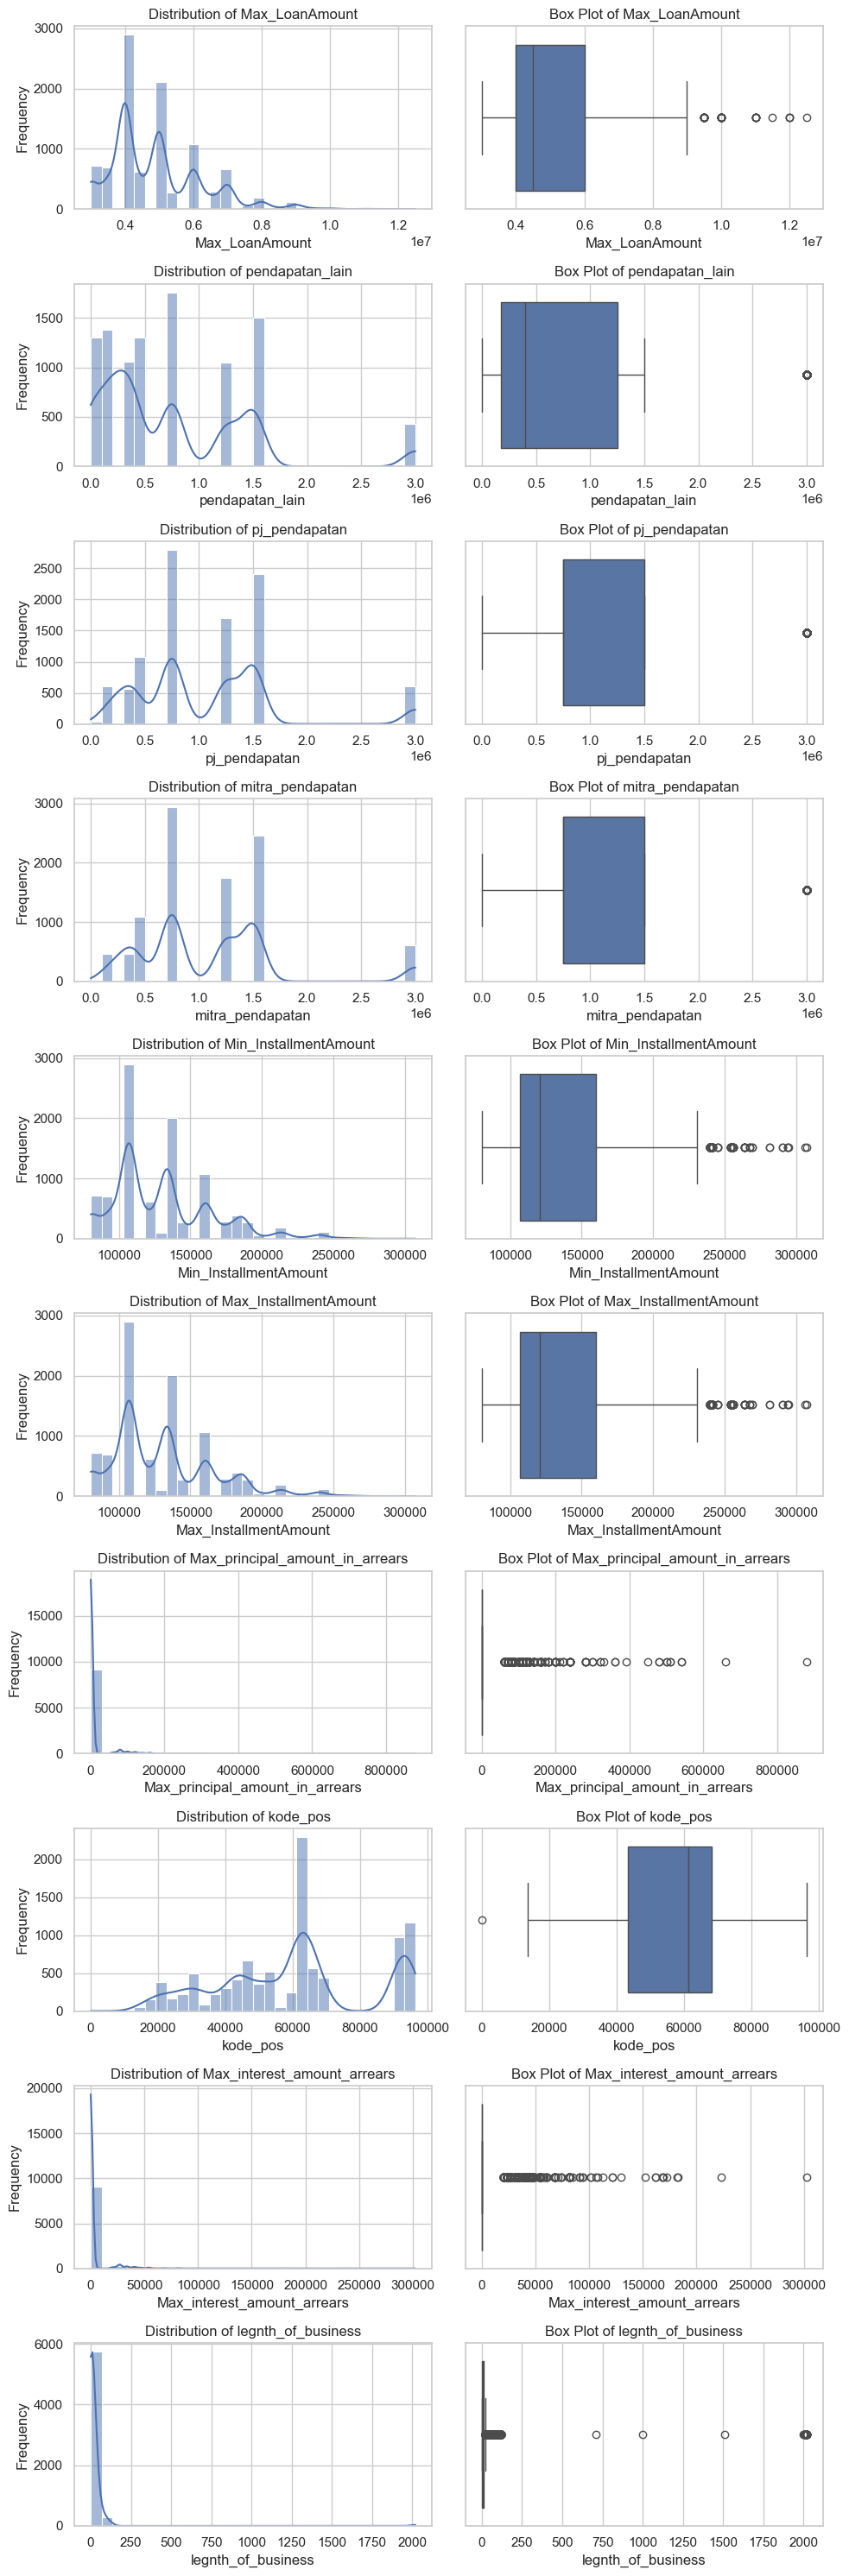

In [824]:
sns.set(style="whitegrid")

# Create subplots
num_columns = len(highest_variance_numerical)
fig, axes = plt.subplots(num_columns, 2, figsize=(10, 3 * num_columns))

# Loop through each numerical column and create histograms and box plots
for i, column in enumerate(highest_variance_numerical):
    # Histogram
    sns.histplot(df2[column], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {column}')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frequency')
    
    # Box Plot
    sns.boxplot(x=df2[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {column}')
    axes[i, 1].set_xlabel(column)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [825]:
# Calculate skewness and kurtosis
skewness = df2[numerical_cols].skew()
kurtosis = df2[numerical_cols].kurt()

# Combine results into a DataFrame
univariate_summary = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})
print(univariate_summary)

                          Skewness    Kurtosis
CustomerId               -0.559754   -0.714227
LoanId                    0.479516   -0.110737
LoanCycle                 1.885922    6.866516
LoanCycle_group_weight    0.665741   -0.581498
MonthDisbursed           11.598012  570.241662
...                            ...         ...
RenewLoanLnnote           0.077069   -0.775635
MonthDisbursed_Renew      0.105210   -0.783475
resting_observationdate   5.259362   34.706001
Default_20_6              2.599587    4.758827
NoOfGroupCustomers        0.308632    0.712495

[141 rows x 2 columns]


In [826]:
# Filter columns with skewness > 2 or < -2
high_skew_columns = univariate_summary[(univariate_summary['Skewness'] > 2) | (univariate_summary['Skewness'] < -2)]

# Filter columns with kurtosis > 10
high_kurtosis_columns = univariate_summary[univariate_summary['Kurtosis'] > 10]

# Combine the results to get unique columns with high skewness or kurtosis
high_skew_and_kurtosis_columns = pd.concat([high_skew_columns, high_kurtosis_columns]).index.unique()

# Convert to list
columns_to_consider = high_skew_and_kurtosis_columns.tolist()

# Print the list of columns
print(columns_to_consider)

['MonthDisbursed', 'marital_status_Menikah', 'legnth_of_business', 'majelis_id', 'data_jangkawaktu', 'LastMonthObs_DPD2', 'Flag_Prepaid', 'LastMonth', 'Max_InterestRate', 'rate', 'Max_principal_amount_in_arrears', 'Max_interest_amount_arrears', 'MaxPrincipalInArrears_LoanAmount_DPD2', 'MaxInterestInArrears_LoanAmount_DPD2', 'Max_installment_miss', 'WMDPD2_desc_DPD2', 'WMDPD2_asc_DPD2', 'max_Max_DPD2', 'sum_Max_DPD2', 'Perc_MaxDaysDPD2', 'Perc_AcumDaysDPD2', 'Max_DPD2_0', 'Max_DPD2_5', 'Max_DPD2_10', 'Max_DPD2_15', 'Max_DPD2_20', 'Max_DPD2_25', 'Max_DPD2_30', 'Max_DPD2_60', 'Max_DPD2_1_5', 'Max_DPD2_1_20', 'Max_DPD2_1_30', 'Max_DPD2_31_60', 'Max_DPD2_61_90', 'count_Max_DPD2_0', 'count_Max_DPD2_5', 'count_Max_DPD2_10', 'count_Max_DPD2_15', 'count_Max_DPD2_20', 'count_Max_DPD2_25', 'count_Max_DPD2_30', 'count_Max_DPD2_60', 'count_Max_DPD2_1_5', 'count_Max_DPD2_1_20', 'count_Max_DPD2_1_30', 'count_Max_DPD2_31_60', 'count_Max_DPD2_61_90', 'Amount_Max_DPD2_1_30', 'Amount_Max_DPD2_1_5', 'Amou

**Observations:**

- Installment Amount (Max,Min), Length of Business, pendapatan_lain (Other Income) : Some of the features with highest variance.
- A lot of features are skewed (left or right) and kurtosis (spread) is also high : They could be treated/dropped before modelling.
- A lot of features have outliers : They can be removed/capped before modelling especially while using regression models.

### **Bivariate and Multivariate analysis**

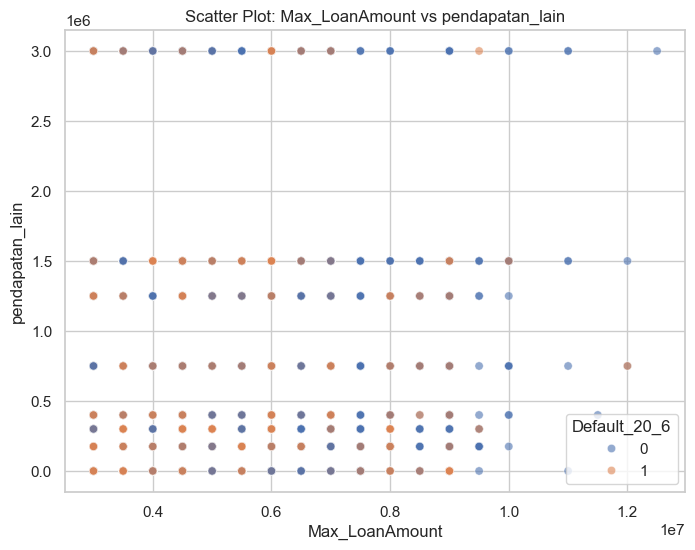

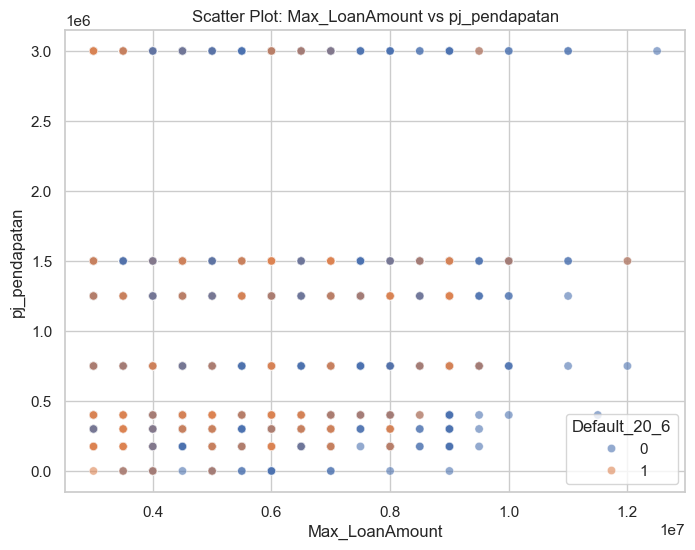

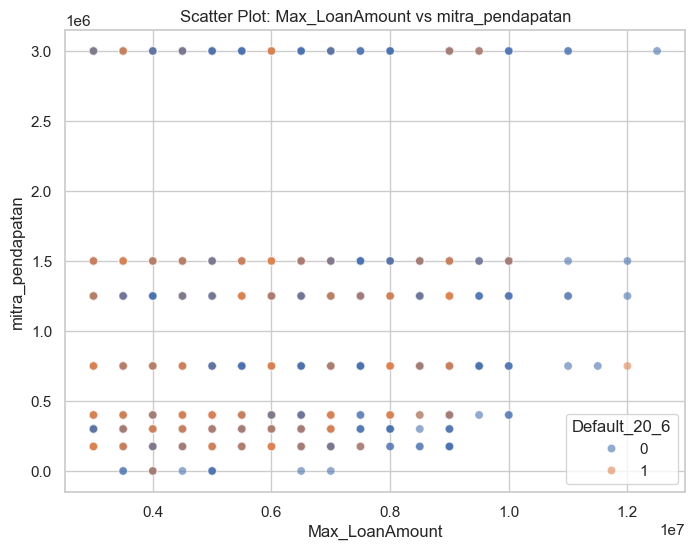

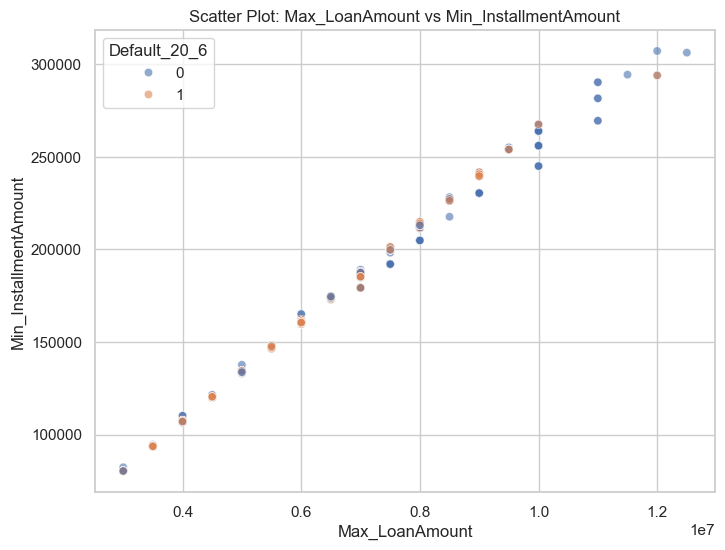

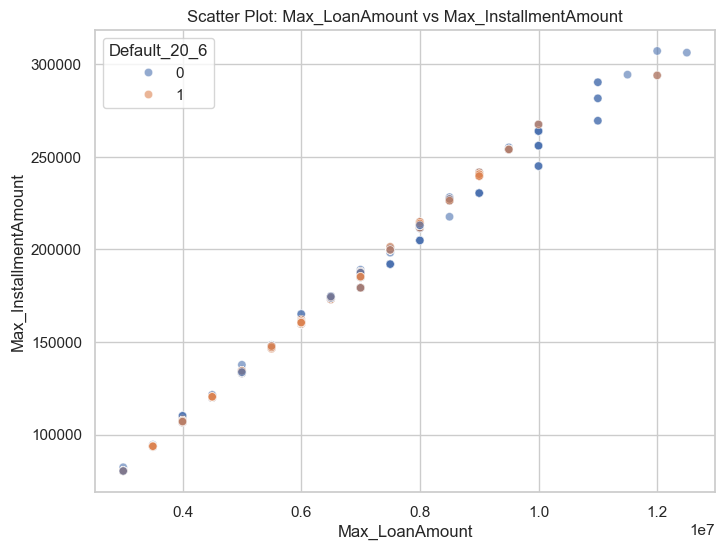

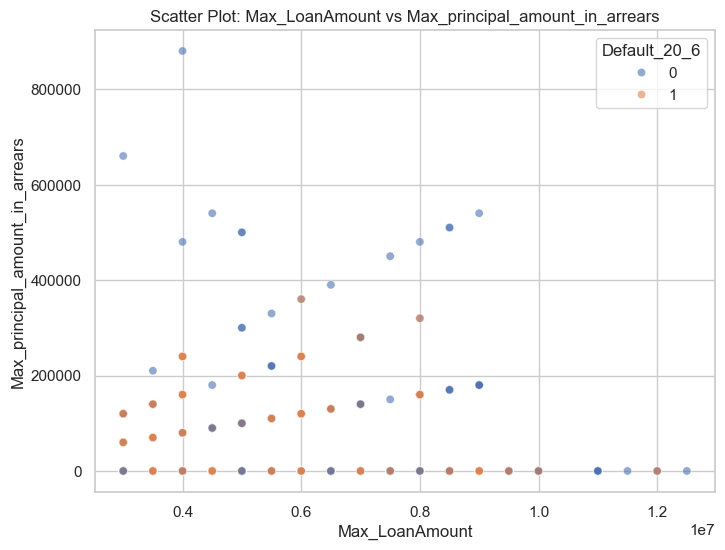

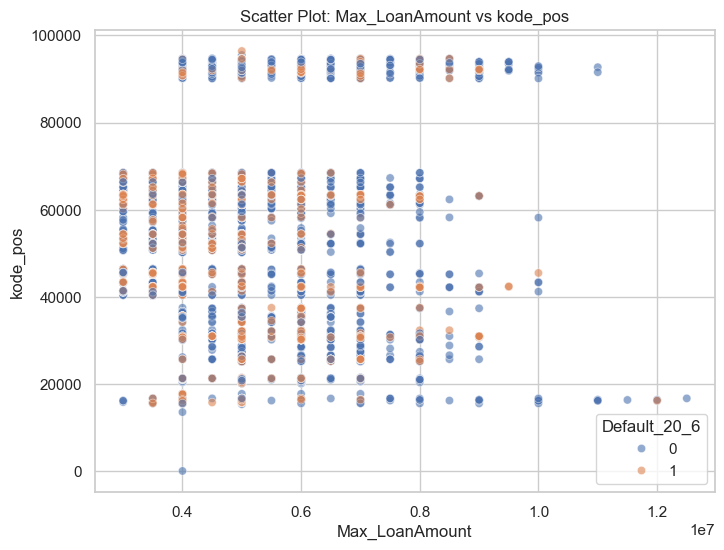

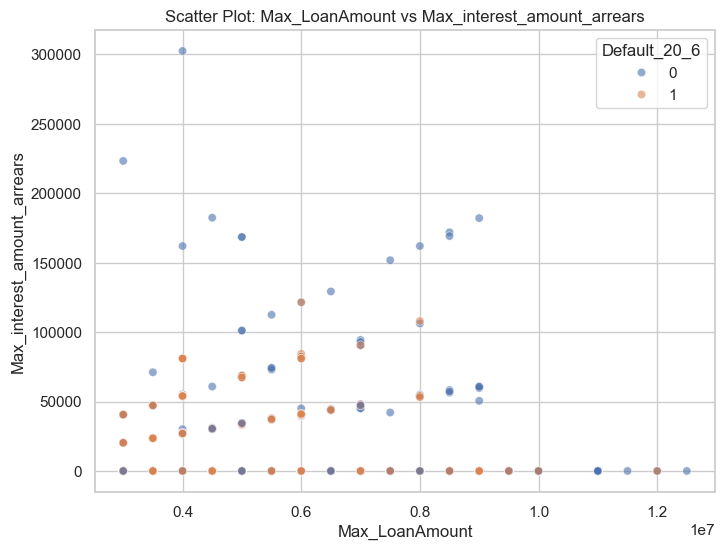

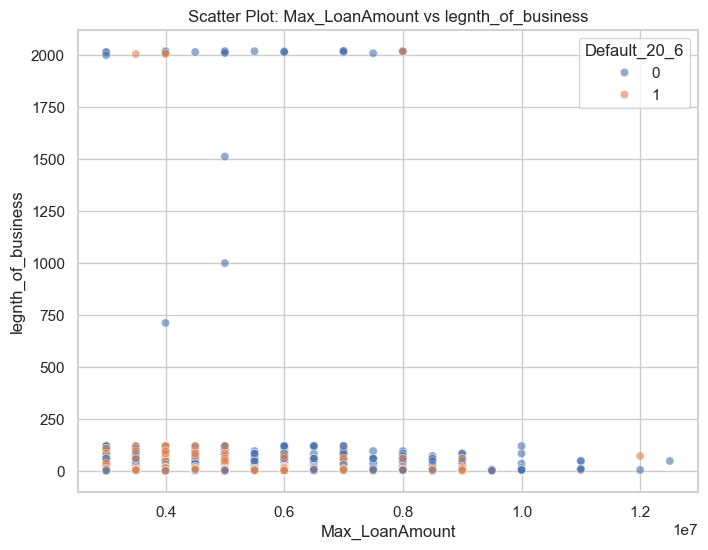

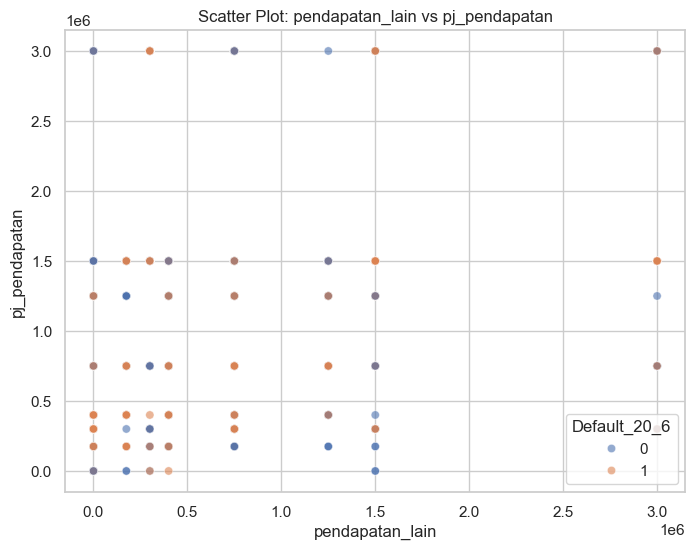

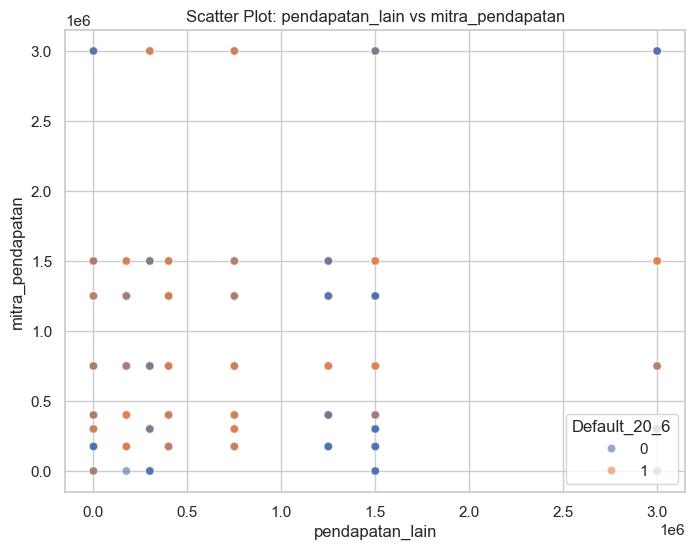

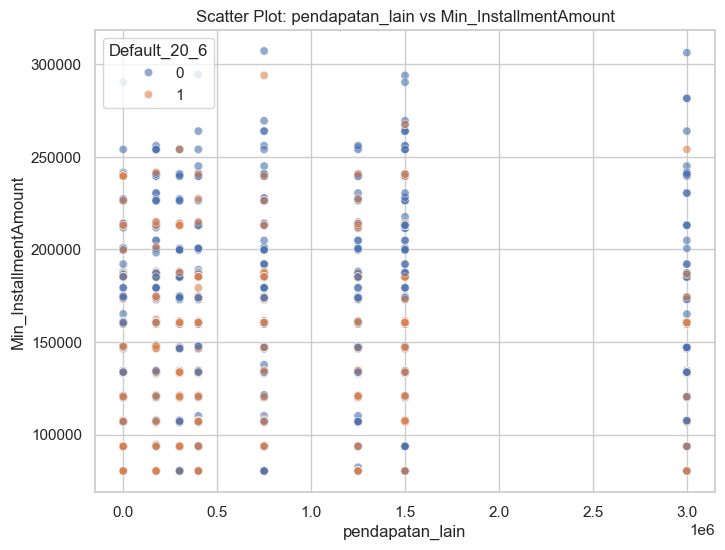

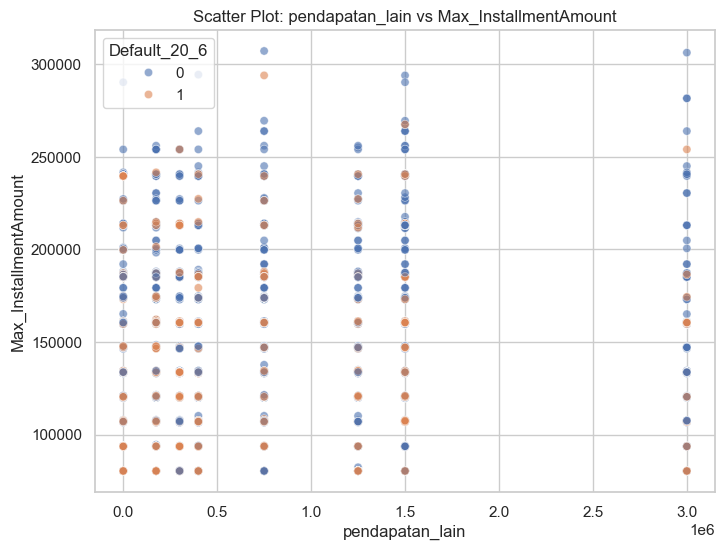

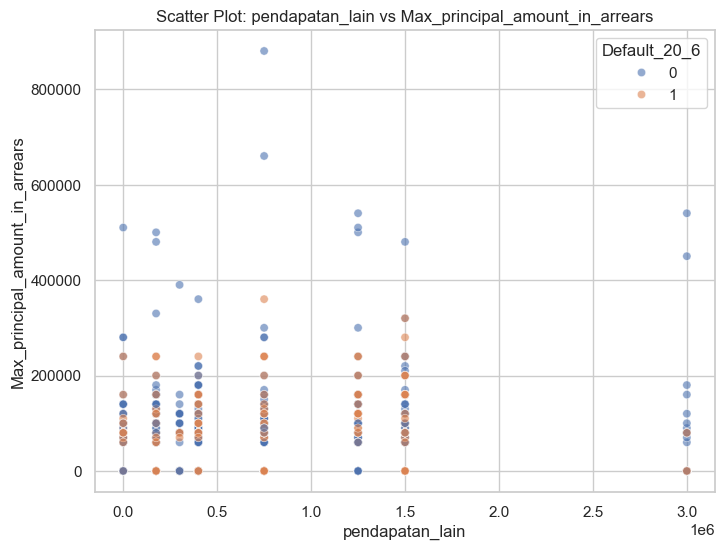

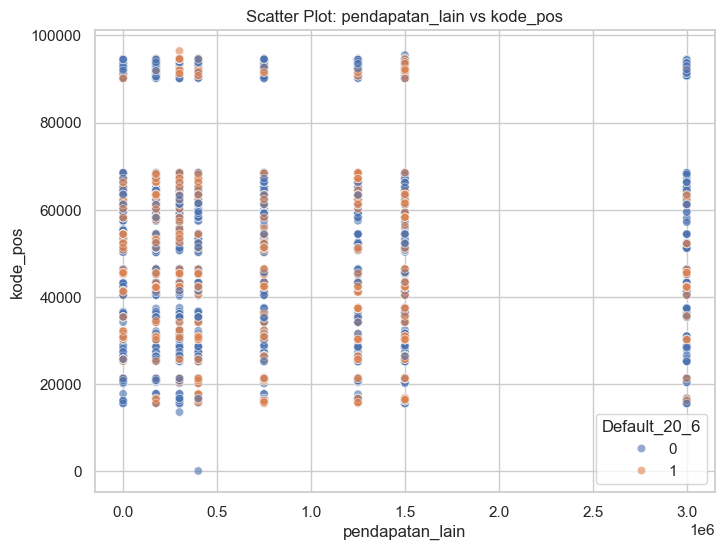

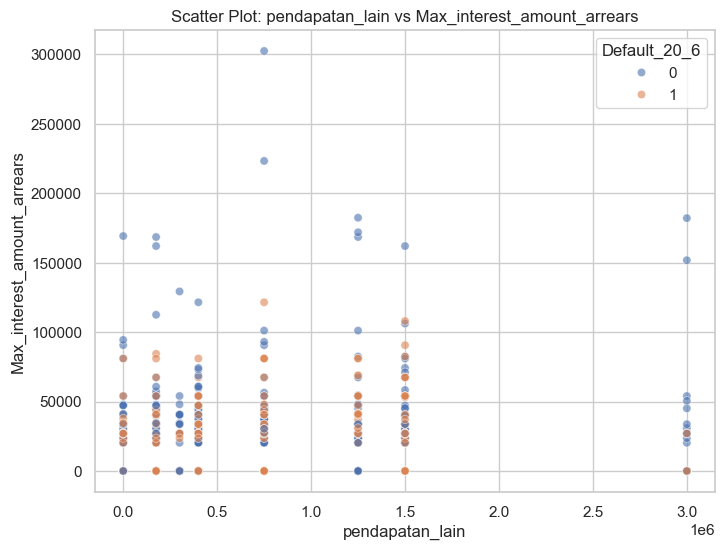

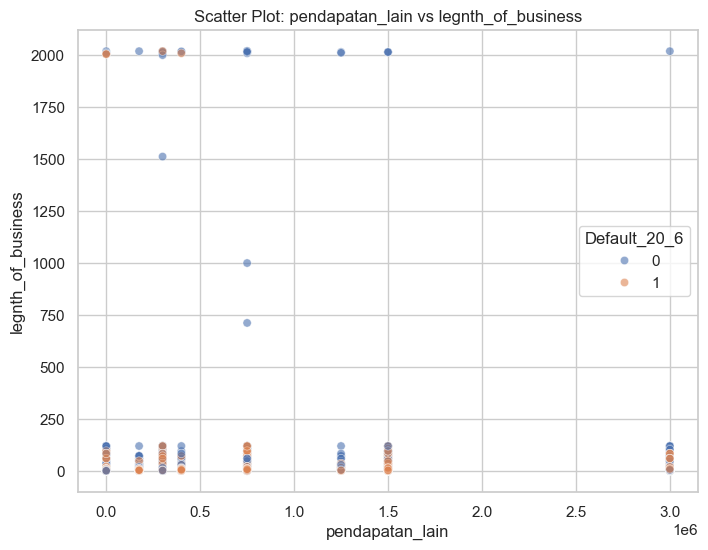

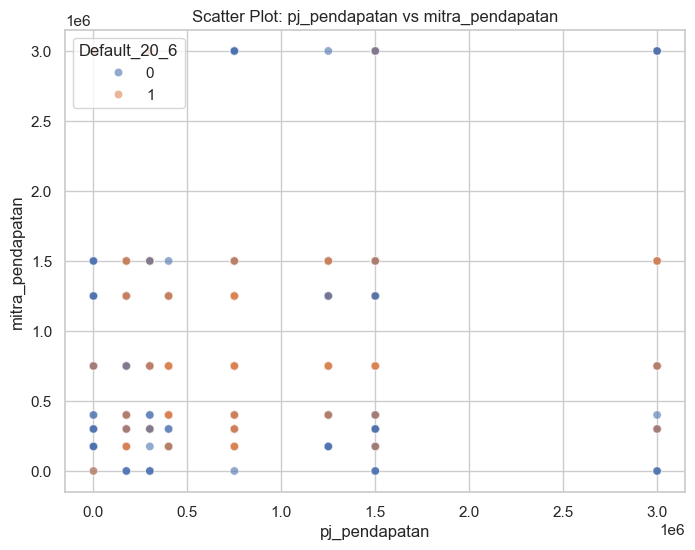

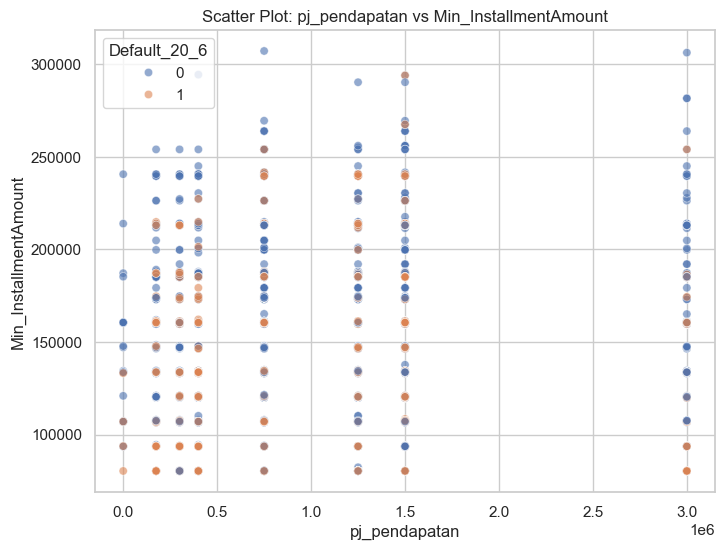

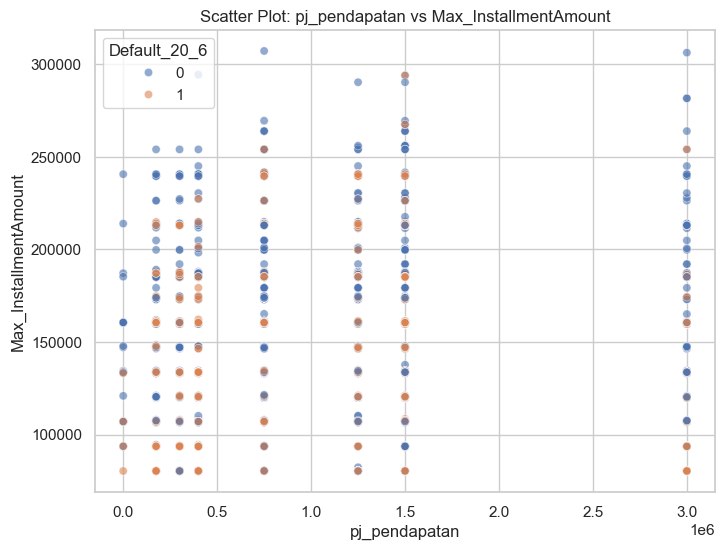

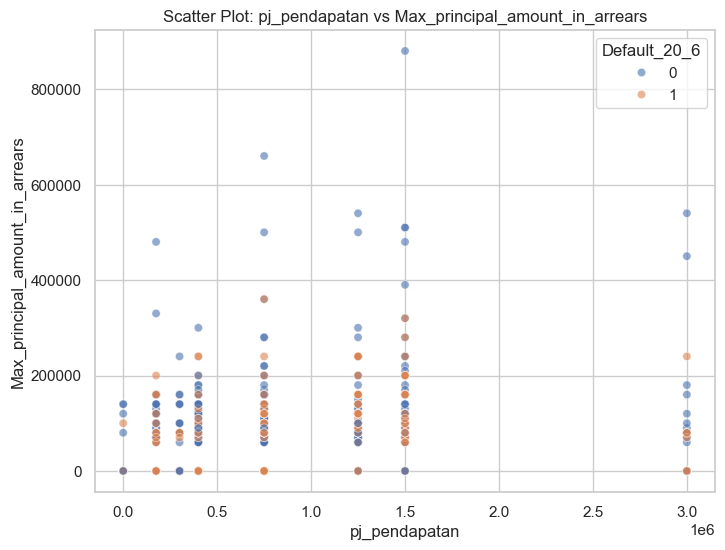

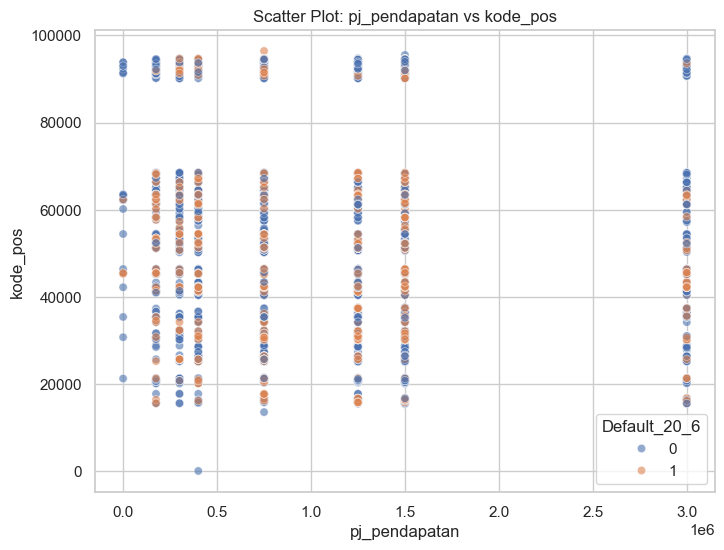

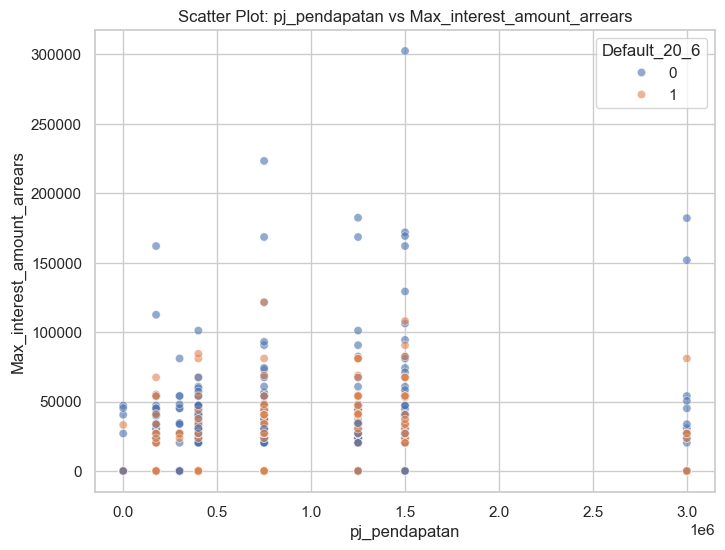

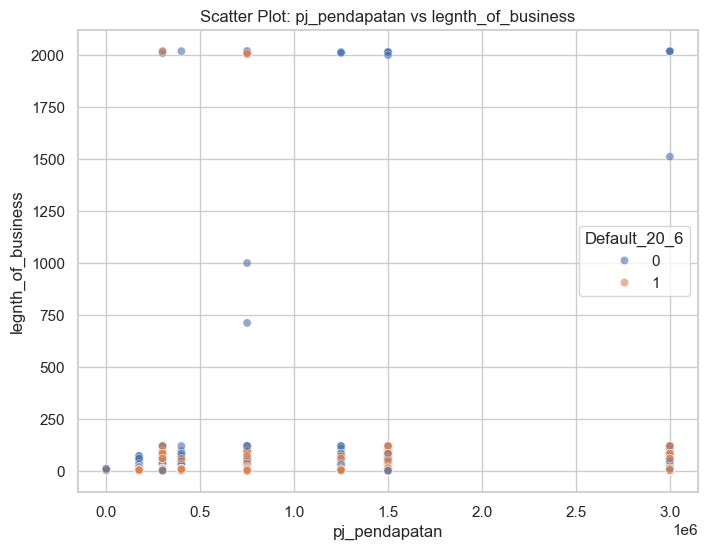

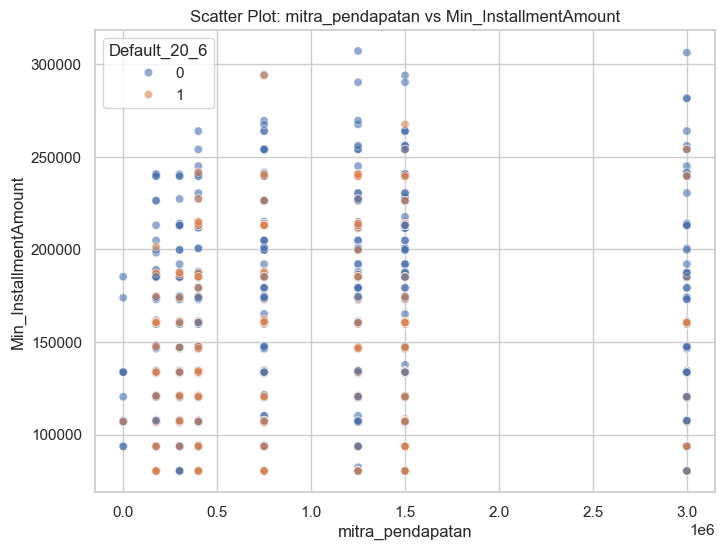

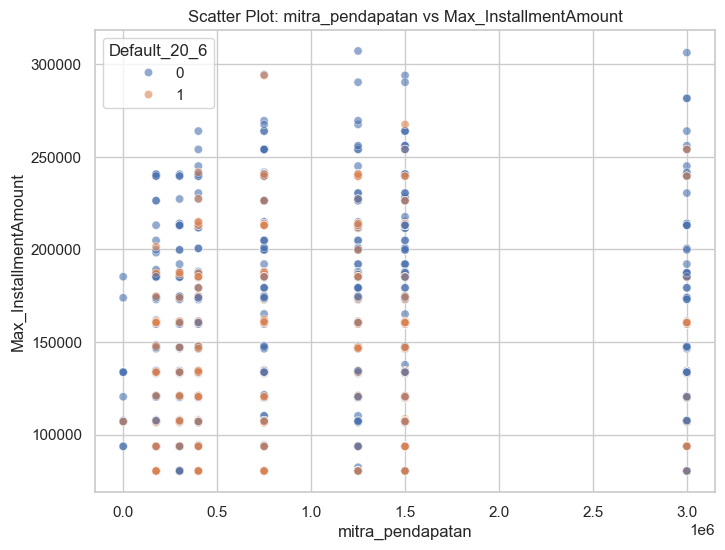

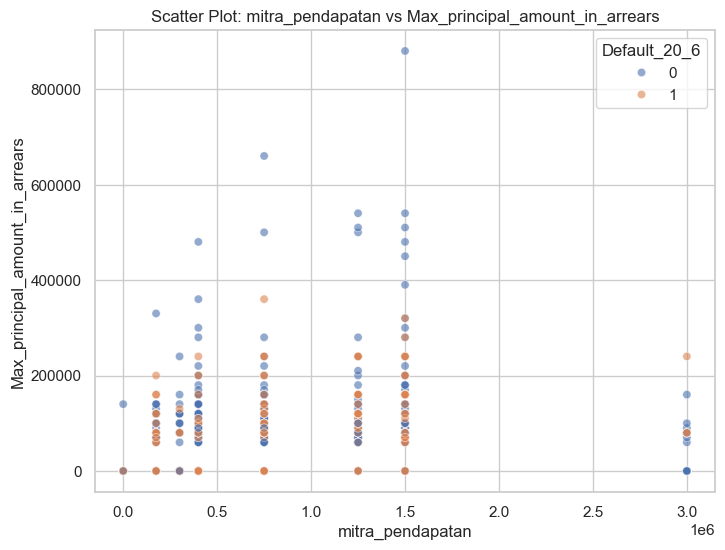

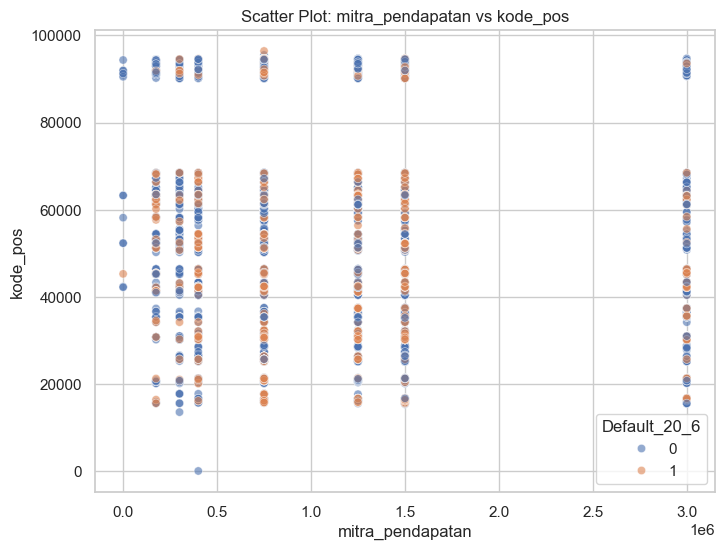

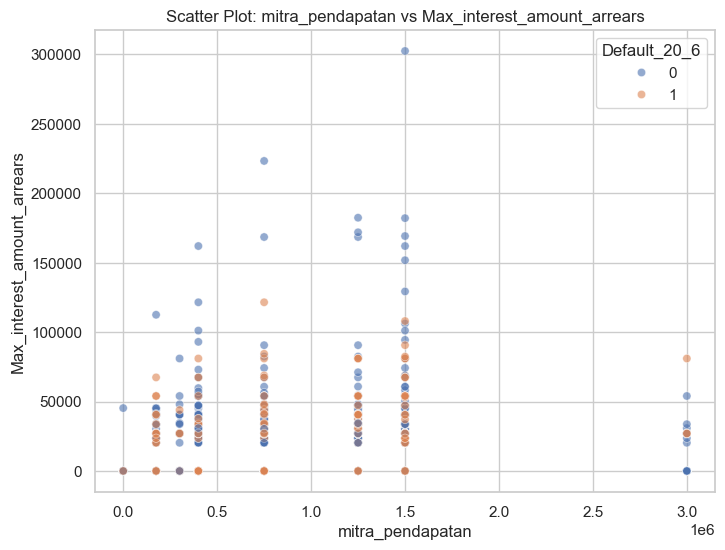

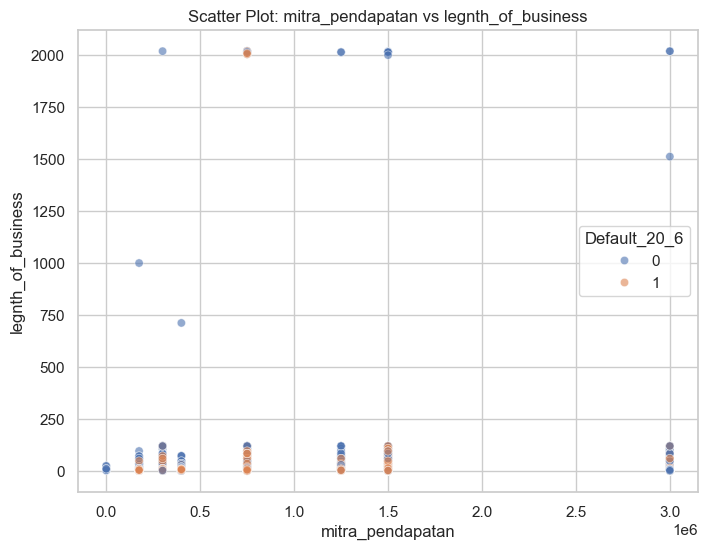

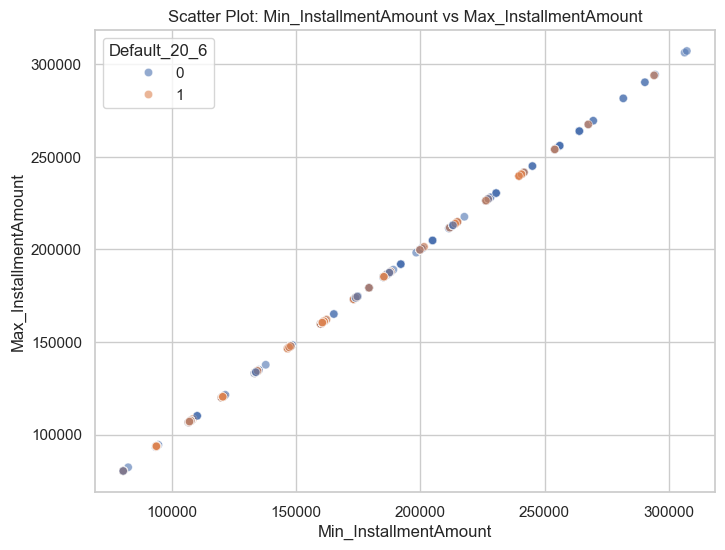

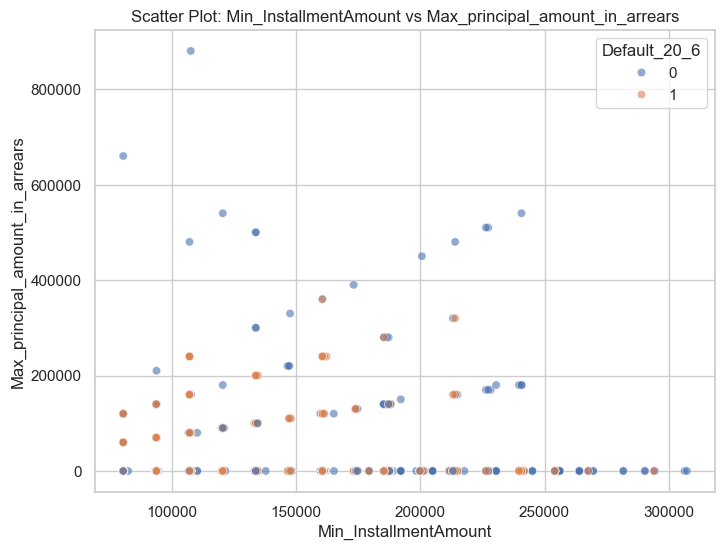

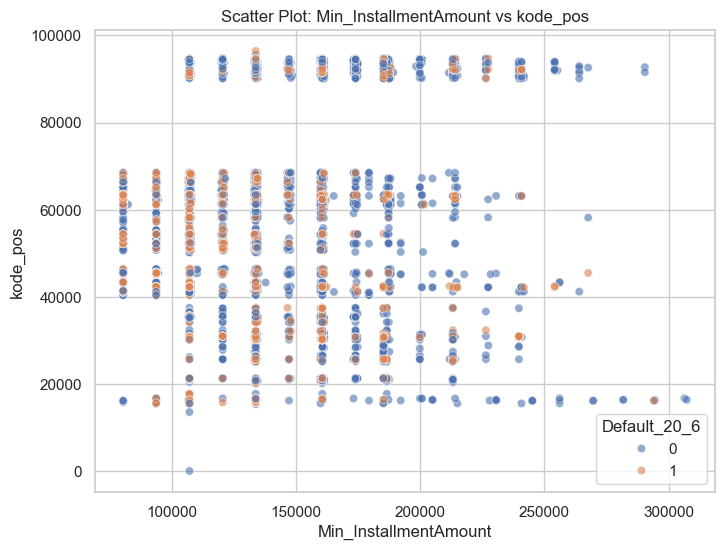

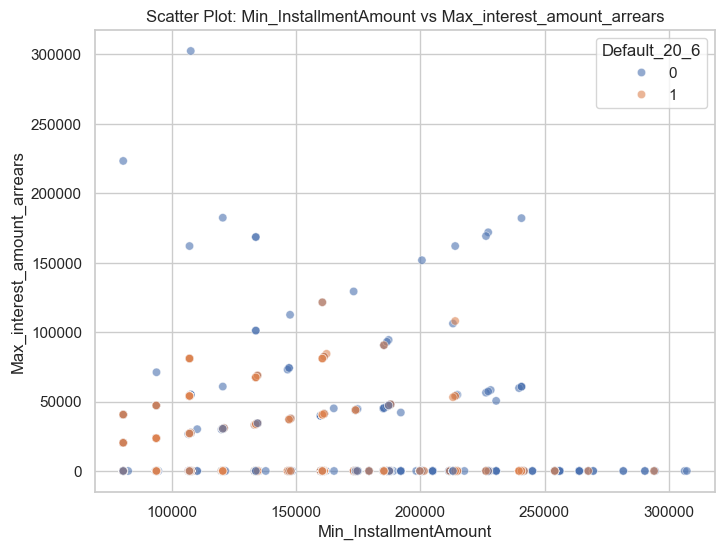

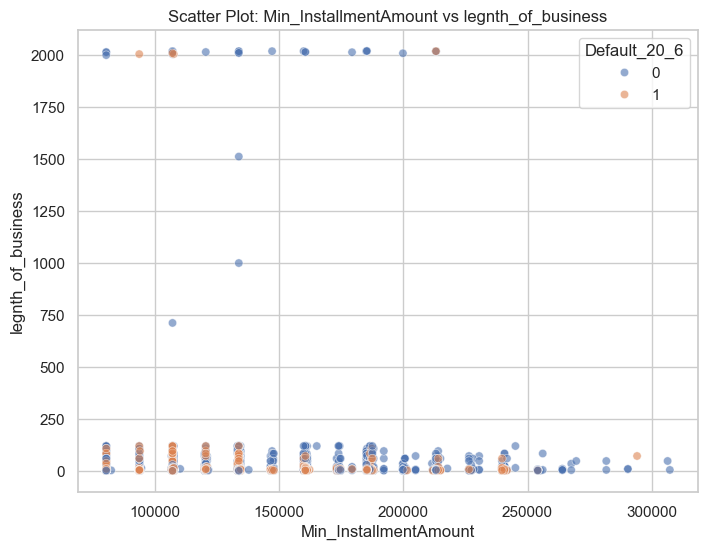

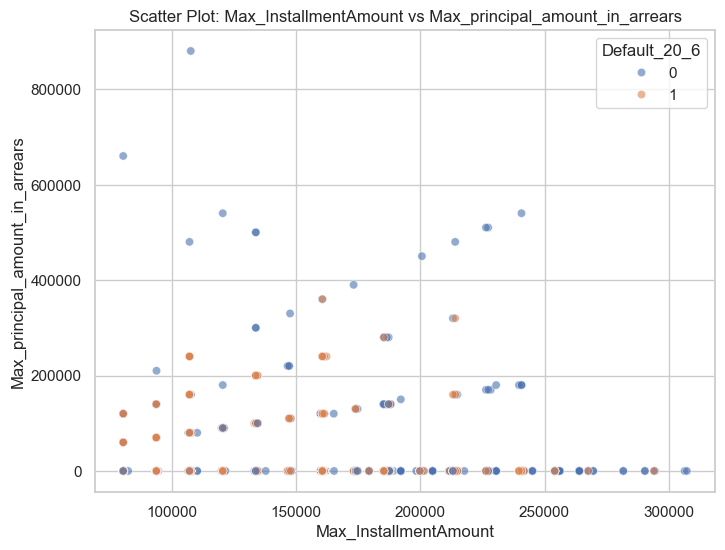

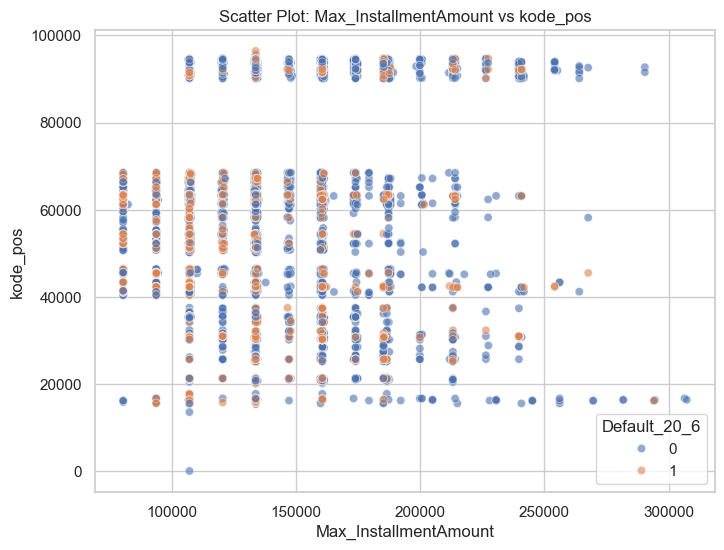

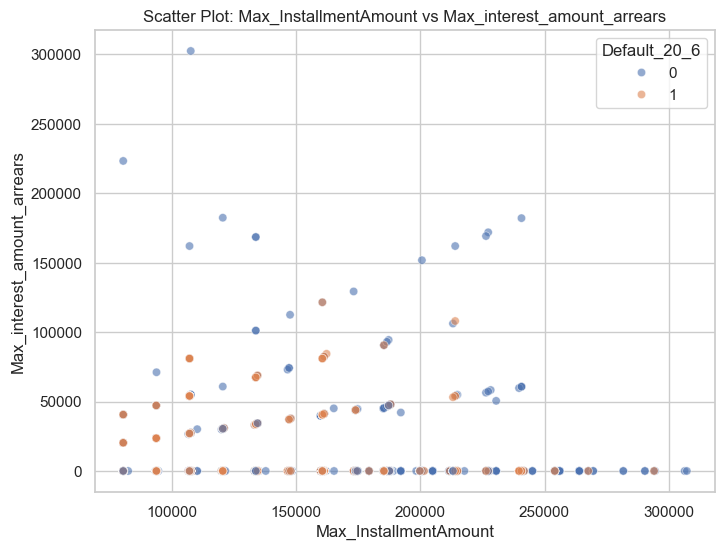

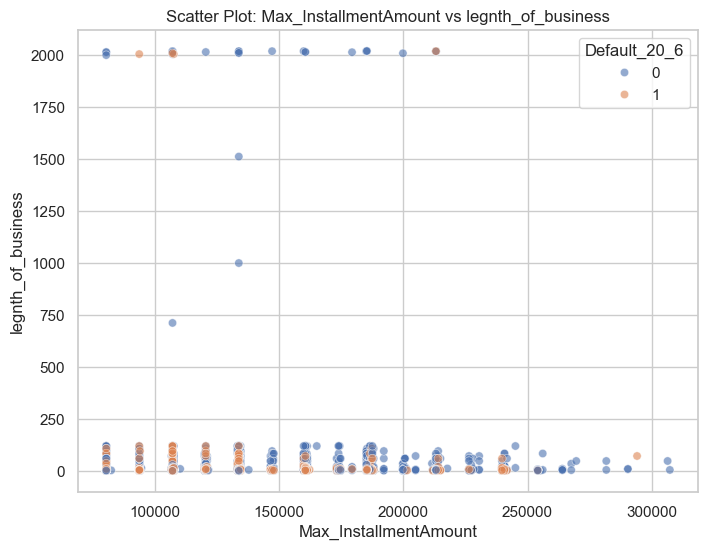

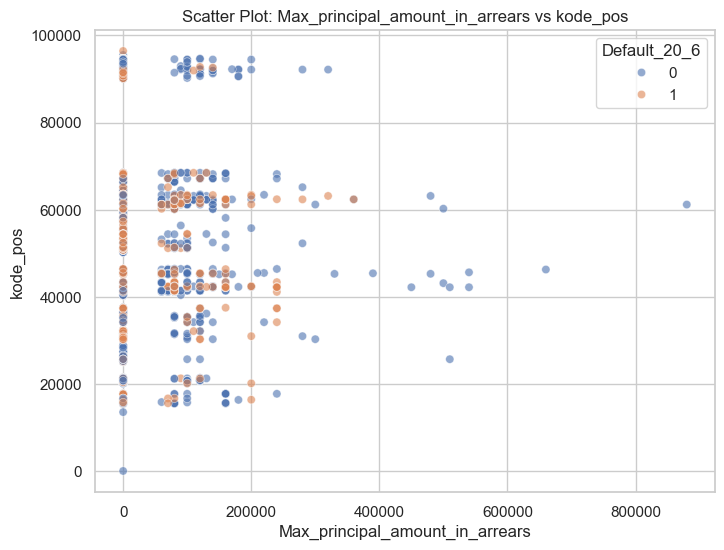

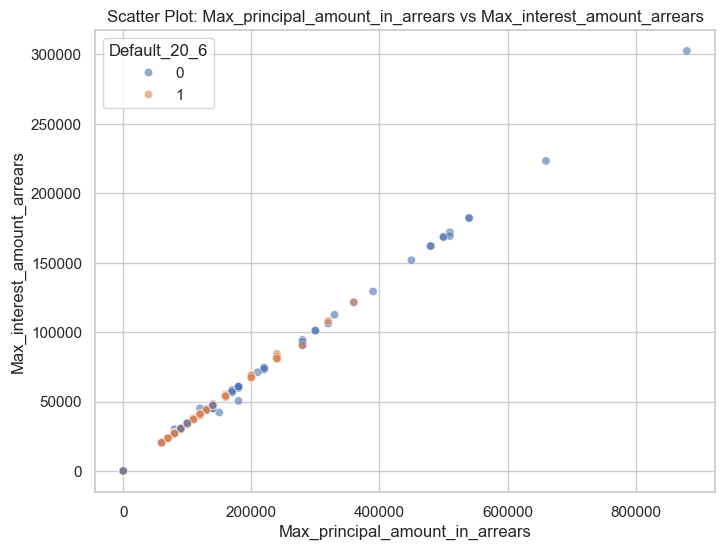

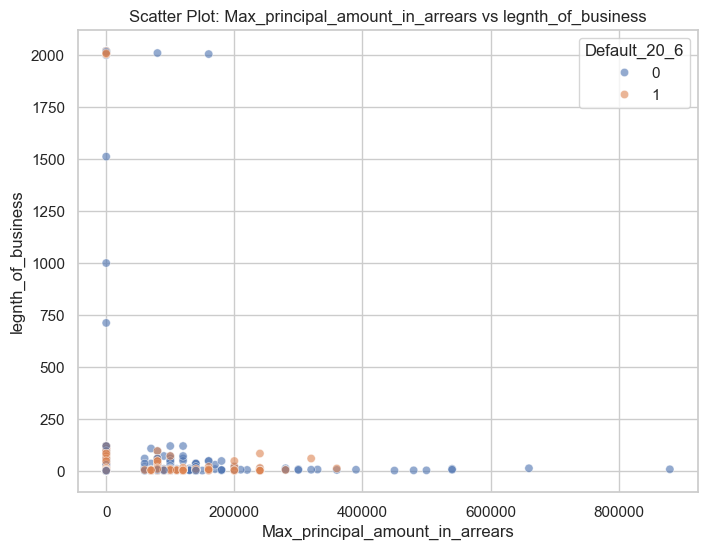

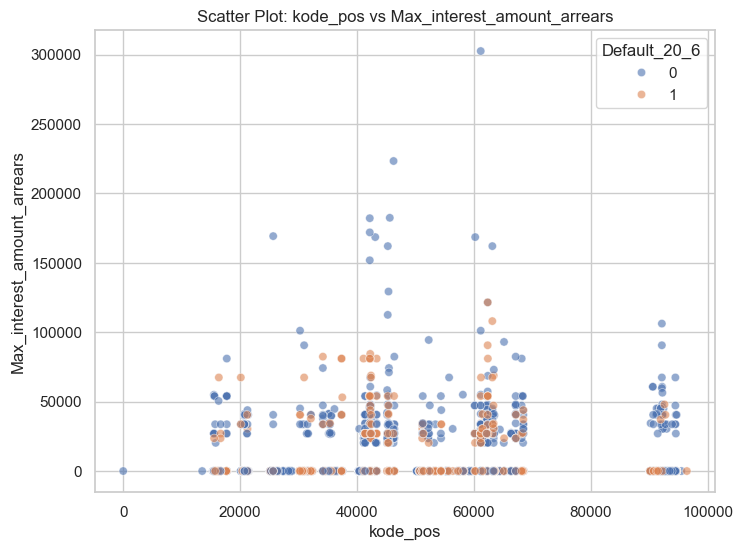

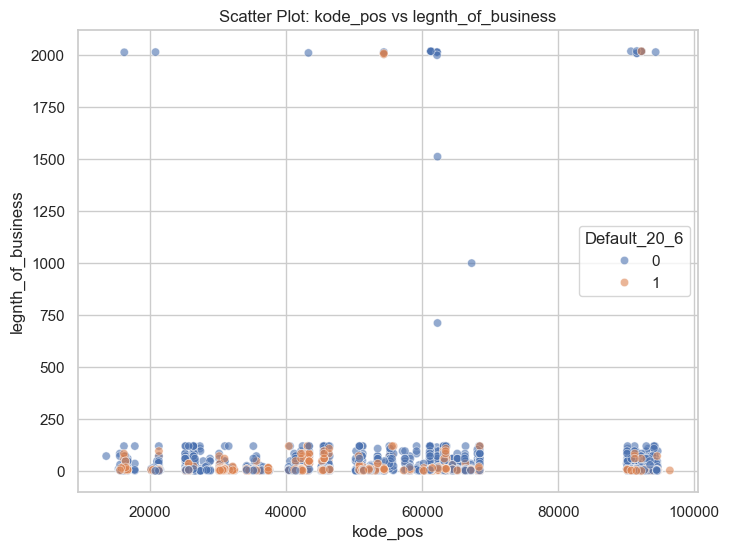

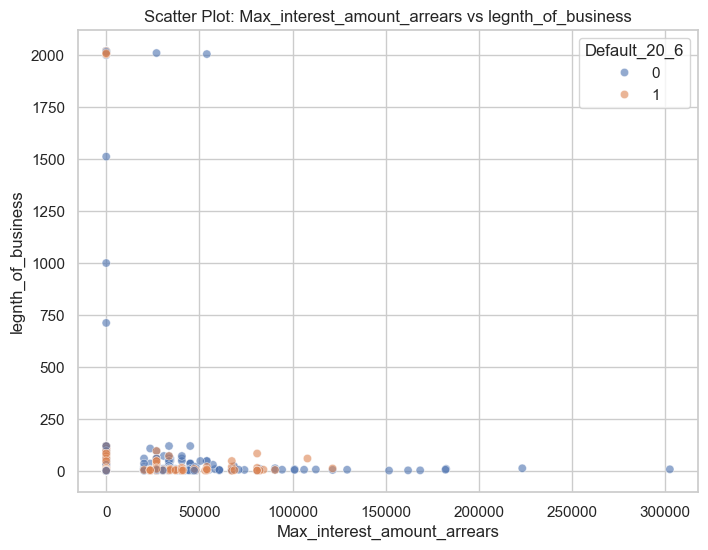

In [829]:
from itertools import combinations

# Create scatter plots for all pairs of highest_variance_numerical columns
for col1, col2 in combinations(highest_variance_numerical, 2):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df2, x=col1, y=col2, hue='Default_20_6', alpha=0.6)
    plt.title(f'Scatter Plot: {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

In [830]:

# Calculate variance and sort
top_3_variance_cols = df2[filtered_numerical_cols].var().sort_values(ascending=False).head(3)

# Print the top 3 columns with highest variance
print(top_3_variance_cols)

Max_LoanAmount     1.789283e+12
pendapatan_lain    4.958093e+11
pj_pendapatan      4.485672e+11
dtype: float64


In [831]:
top_3_variance_cols = top_3_variance_cols.index.tolist()
top_3_variance_cols

['Max_LoanAmount', 'pendapatan_lain', 'pj_pendapatan']

In [832]:
categorical_vars

['marital_status',
 'latest_education',
 'provinsi_group',
 'source_of_income',
 'business_field']

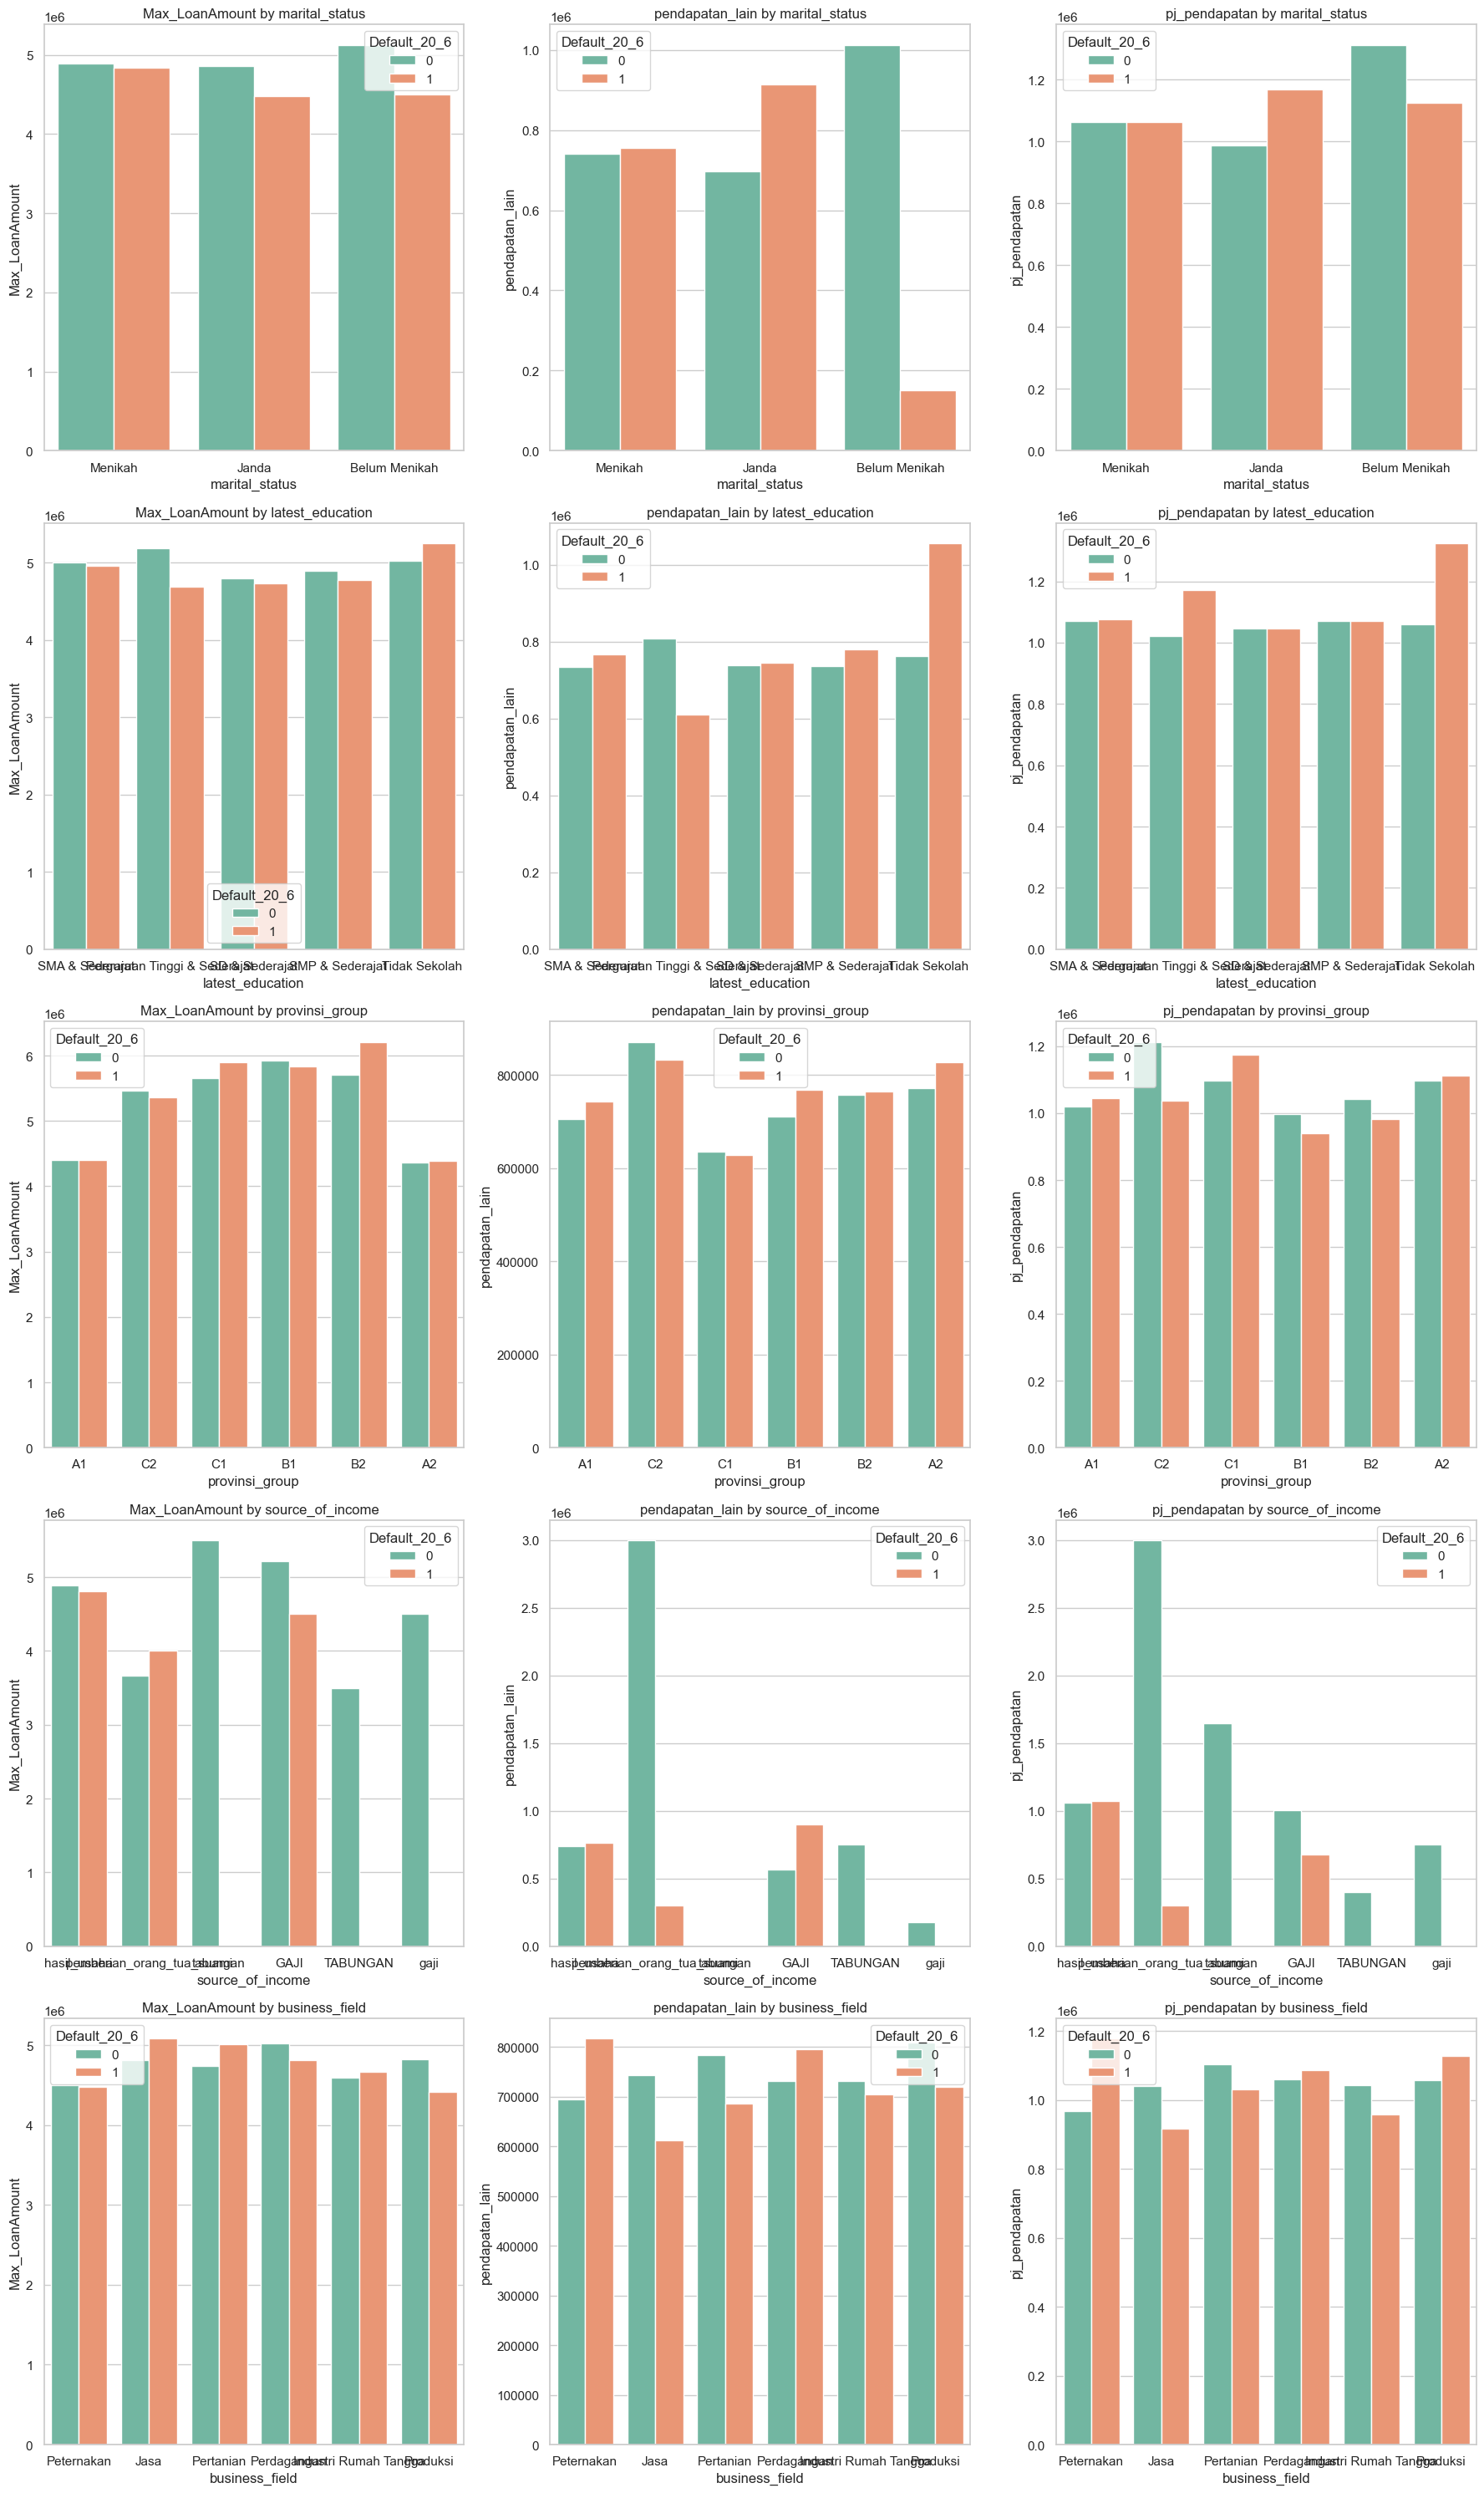

In [833]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up a grid of subplots: 5 rows for categorical vars and 3 columns for numerical vars
fig, axes = plt.subplots(len(categorical_vars), len(top_3_variance_cols), figsize=(18, 30))  # Adjust figure size accordingly

# Loop through each categorical column and numerical column combination
for row, cat_var in enumerate(categorical_vars):
    for col, num_var in enumerate(top_3_variance_cols):
        # Select the current axis
        ax = axes[row, col]
        
        # Use Seaborn's barplot function to plot categorical features vs numerical features
        sns.barplot(
            data=df2, 
            x=cat_var, 
            y=num_var, 
            hue='Default_20_6', 
            ax=ax,
            errorbar=None,  # Remove confidence intervals if not needed
            palette='Set2'
        )
        
        # Set labels and title
        ax.set_title(f'{num_var} by {cat_var}')
        ax.set_xlabel(cat_var)
        ax.set_ylabel(num_var)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

#### Chi-Square Test

In [835]:
# Initialize an empty list to store significant features
significant_features = []

# Loop through each categorical column
for i in df2[categorical_cols]:
    contingency_table = pd.crosstab(df2[i], df2['Default_20_6'])
    
    # Perform the Chi-Square test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    # Check if the p-value is less than 0.05
    if round(p,1) <= 0.05:
        significant_features.append(i)

# Print the list of significant features
print("Significant categorical features (p < 0.05):", significant_features)

Significant categorical features (p < 0.05): ['first_disbursement_date', 'Disbursement Date', 'latest_education', 'provinsi', 'provinsi_group', 'kabupaten_kota', 'kecamatan', 'kelurahan', 'industry_subsector', 'Disbursement Date Renew']


**Observations:**

- loan amount is postively correlated to installment amount and principal amount
- Installment amount is postively correlated with principal amount, interest amount
- Unmarried Customers have taken maximum loans
- Widowed with more other source of income have defaulted the most compared to Married/Unmarried Customers
- Customers who have never been to school or belonging to provoince B2 (SULAWESI) have deafauled the most

# Correlation Matrix

In [838]:
# List of columns to exclude
exclude_keywords = ['Id', 'note','id']

# Filter out columns that contain 'Id' or 'note' in their names
filtered_numerical_cols = [col for col in numerical_cols if not any(keyword in col for keyword in exclude_keywords)]

correlation = df2[filtered_numerical_cols].corr()
correlation

LoanCycle  LoanCycle_group_weight  MonthDisbursed  \
LoanCycle                 1.000000                0.921685       -0.082144   
LoanCycle_group_weight    0.921685                1.000000       -0.107250   
MonthDisbursed           -0.082144               -0.107250        1.000000   
Customer_Vintage          0.774847                0.707223       -0.120294   
Customer_Vintage_group    0.549795                0.652659       -0.326048   
...                            ...                     ...             ...   
LastLoanCycle             1.000000                0.921685       -0.082144   
MonthDisbursed_Renew     -0.094642               -0.120022        0.652539   
resting_observationdate  -0.014918               -0.017508       -0.301650   
Default_20_6             -0.031092               -0.030271        0.030771   
NoOfGroupCustomers       -0.042298               -0.013306        0.004744   

                         Customer_Vintage  Customer_Vintage_group  \
LoanCycle                        0.774847                0.549795   
LoanCycle_group_weight           0.707223                0.652659   
MonthDisbursed                  -0.120294               -0.326048   
Customer_Vintage                 1.000000                0.597160   
Customer_Vintage_group           0.597160                1.000000   
...                                   ...                     ...   
LastLoanCycle                    0.774847                0.549795   
MonthDisbursed_Renew            -0.068226               -0.128581   
resting_observationdate          0.030848                0.159062   
Default_20_6                    -0.032627               -0.039673   
NoOfGroupCustomers              -0.113586               -0.021703   

                         Customer_Vintage_group_weight       Age  Age_group  \
LoanCycle                                     0.522397  0.120641   0.098927   
LoanCycle_group_weight                        0.620135  0.119646   0.099289   
MonthDisbursed                               -0.353789  0.007596   0.009534   
Customer_Vintage                              0.574779  0.109302   0.088365   
Customer_Vintage_group                        0.950168  0.071335   0.056482   
...                                                ...       ...        ...   
LastLoanCycle                                 0.522397  0.120641   0.098927   
MonthDisbursed_Renew                         -0.103005  0.000285   0.008154   
resting_observationdate                       0.148780 -0.012604  -0.007940   
Default_20_6                                 -0.043411 -0.044811  -0.048125   
NoOfGroupCustomers                           -0.024514 -0.023729  -0.020169   

                         Age_group_weight  marital_status_Menikah  ...  \
LoanCycle                        0.100209                0.003431  ...   
LoanCycle_group_weight           0.101992                0.001986  ...   
MonthDisbursed                   0.010775               -0.024197  ...   
Customer_Vintage                 0.089096                0.001337  ...   
Customer_Vintage_group           0.059641                0.009950  ...   
...                                   ...                     ...  ...   
LastLoanCycle                    0.100209                0.003431  ...   
MonthDisbursed_Renew             0.008523               -0.017977  ...   
resting_observationdate         -0.004957                0.023883  ...   
Default_20_6                    -0.047540               -0.006865  ...   
NoOfGroupCustomers              -0.017869                0.021676  ...   

                         AmountRecovery_Current_From_P90+  \
LoanCycle                                             NaN   
LoanCycle_group_weight                                NaN   
MonthDisbursed                                        NaN   
Customer_Vintage                                      NaN   
Customer_Vintage_group                                NaN   
...                                                   .

In [839]:
len(filtered_numerical_cols)

135

In [840]:
from pprint import pprint

# Create an empty dictionary to store highly correlated features
high_corr_dict = {}
seen_pairs = set()  # Set to track already added pairs

# Loop through the correlation matrix
for col in correlation.columns:
    for row in correlation.index:
        # Only consider pairs once (i.e., upper triangle without diagonal)
        if col != row and abs(correlation.loc[row, col]) > 0.8:
            # Create a sorted tuple of the feature pair to avoid duplicates
            feature_pair = tuple(sorted((row, col)))
            if feature_pair not in seen_pairs:
                # Add the feature pair and their correlation value to the dictionary
                high_corr_dict[f'{row} & {col}'] = correlation.loc[row, col]
                seen_pairs.add(feature_pair)  # Mark this pair as seen

# Pretty print the dictionary of highly correlated features
pprint(high_corr_dict, width=1)

{'ActiveMonths_DPD2 & Diff_Disb_LOD': 0.9063250377647143,
 'ActiveMonths_DPD2 & Diff_Disb_LOD_group_weight': 0.8741301565721781,
 'ActiveMonths_DPD2 & Diff_Maturity_LOD': -0.9027368906889954,
 'ActiveMonths_DPD2 & NUMOBS_DPD2': 0.998973303436298,
 'ActiveMonths_DPD2 & NUMOBS_DPD2__group_weight': 0.8895165420384359,
 'ActiveMonths_DPD2 & NUMOBS_DPD2_group': 0.8895165420384359,
 'ActiveMonths_DPD2 & Vintage_Last_Loan_DPD2': 1.0,
 'ActiveMonths_DPD2 & Vintage_Last_Loan_DPD2_gruop_weight': 0.8902142488415423,
 'ActiveMonths_DPD2_gruop_weight & ActiveMonths_DPD2': 0.8902142488415424,
 'ActiveMonths_DPD2_gruop_weight & Diff_Disb_LOD': 0.8173834066430298,
 'ActiveMonths_DPD2_gruop_weight & Diff_Maturity_LOD': -0.8311794987557969,
 'ActiveMonths_DPD2_gruop_weight & NUMOBS_DPD2': 0.8889169210484232,
 'ActiveMonths_DPD2_gruop_weight & NUMOBS_DPD2__group_weight': 0.9978675768330818,
 'ActiveMonths_DPD2_gruop_weight & NUMOBS_DPD2_group': 0.9978675768330818,
 'ActiveMonths_DPD2_gruop_weight & Vinta

**Observations:**

- A lot of features are multicollinear
- A lot of features have null values or binary values

### <a id='link1'>Data Cleaning and Feature Engineering</a>

In [843]:
# List of columns to exclude
exclude_keywords = ['Id', 'note','id','group','date','Date','weight']

columns_list = [
    'Max_NPD2_0', 'Max_DPD2_0', 'Max_DPD2_5', 'Max_DPD2_10', 
    'Max_DPD2_15', 'Max_DPD2_20', 'Max_DPD2_25', 'Max_DPD2_30', 
    'Max_DPD2_60', 'Max_DPD2_90', 'Max_DPD2_180', 'Max_DPD2_1_5', 
    'Max_DPD2_1_20', 'Max_DPD2_1_30', 'Max_DPD2_31_60', 'Max_DPD2_61_90', 
    'Max_DPD2_91_180'
]

columns_list_2 = ['marital_status_Menikah','ActiveMonths_DPD2','LastMonthObs_DPD2','LastLoanCycle','Diff_Maturity_LOD','Diff_Disb_LOD','NumLoans',
                 'MaxInterestInArrears_LoanAmount_DPD2','MaxPrincipalInArrears_LoanAmount_DPD2','Max_InterestRate','Min_InstallmentAmount',
                  'Perc_AcumDaysDPD2 ','Perc_MaxDaysDPD2','max_Max_DPD2','MonthDisbursed','MonthDisbursed_Renew','kode_pos','LastMonth',
                  'data_jangkawaktu','legnth_of_business']

exclude_keywords = exclude_keywords + columns_list + columns_list_2

filtered_cols = [col for col in list(df2.columns) if not any(keyword in col for keyword in exclude_keywords)]
print(filtered_cols)

['LoanCycle', 'Customer_Vintage', 'Age', 'marital_status', 'latest_education', 'provinsi', 'kabupaten_kota', 'kecamatan', 'kelurahan', 'source_of_income', 'business_field', 'mitra_pendapatan', 'pj_pendapatan', 'pendapatan_lain', 'industry_subsector', 'Product Name', 'NUMOBS_DPD2', 'rate', 'tenor', 'Max_LoanAmount', 'Max_InstallmentAmount', 'Max_principal_amount_in_arrears', 'Max_interest_amount_arrears', 'Max_installment_miss', 'Max_Loan_Term_Month_DPD2', 'Vintage_Last_Loan_DPD2', 'POutstanding_DPD2', 'WMDPD2_desc_DPD2', 'WMDPD2_asc_DPD2', 'sum_Max_DPD2', 'Perc_AcumDaysDPD2', 'Amount_Max_DPD2_6_15', 'Amount_Max_DPD2_16_30', 'Amount_Max_DPD2_91_120', 'Amount_Max_DPD2_120_150', 'Amount_Max_DPD2>0', 'Amount_Max_DPD2>5', 'Amount_Max_DPD2>10', 'Amount_Max_DPD2>15', 'Amount_Max_DPD2>20', 'Amount_Max_DPD2>30', 'Amount_Max_DPD2>60', 'Amount_Max_DPD2>90', 'Amount_Max_DPD2>180', '#Nextbucket_Current_To_P1_30', '#Nextbucket_P1_30_To_P31_60', '#Nextbucket_P31_60_To_P61_90', '#Nextbucket_P61_90_To_

In [844]:
# Assuming filtered_cols is defined
numerical_filtered_cols = [col for col in filtered_cols if col in df2.select_dtypes(include=['number']).columns]

# Now calculate the correlation
filtered_numerical_df = df2[numerical_filtered_cols]  # Use the filtered numerical columns
correlation_matrix = filtered_numerical_df.corr()

# Display the correlation matrix
correlation_matrix

LoanCycle  Customer_Vintage       Age  \
LoanCycle                            1.000000          0.774847  0.120641   
Customer_Vintage                     0.774847          1.000000  0.109302   
Age                                  0.120641          0.109302  1.000000   
mitra_pendapatan                     0.055513          0.054913 -0.012074   
pj_pendapatan                        0.047334          0.053095 -0.024841   
...                                       ...               ...       ...   
AmountRecovery_P1_30_From_P31_60          NaN               NaN       NaN   
AmountRecovery_P31_60_From_P61_90         NaN               NaN       NaN   
AmountRecovery_P61_90_From_P91_180        NaN               NaN       NaN   
Default_20_6                        -0.031092         -0.032627 -0.044811   
NoOfGroupCustomers                  -0.042298         -0.113586 -0.023729   

                                    mitra_pendapatan  pj_pendapatan  \
LoanCycle                                   0.055513       0.047334   
Customer_Vintage                            0.054913       0.053095   
Age                                        -0.012074      -0.024841   
mitra_pendapatan                            1.000000       0.799045   
pj_pendapatan                               0.799045       1.000000   
...                                              ...            ...   
AmountRecovery_P1_30_From_P31_60                 NaN            NaN   
AmountRecovery_P31_60_From_P61_90                NaN            NaN   
AmountRecovery_P61_90_From_P91_180               NaN            NaN   
Default_20_6                                0.004625       0.004782   
NoOfGroupCustomers                          0.056688       0.048039   

                                    pendapatan_lain  NUMOBS_DPD2      rate  \
LoanCycle                                  0.038917     0.032960 -0.360852   
Customer_Vintage                           0.052377     0.118990 -0.279282   
Age                                       -0.011858    -0.009869 -0.003861   
mitra_pendapatan                           0.595906    -0.013804 -0.060792   
pj_pendapatan                              0.620975    -0.001717 -0.056546   
...                                             ...          ...       ...   
AmountRecovery_P1_30_From_P31_60                NaN          NaN       NaN   
AmountRecovery_P31_60_From_P61_90               NaN          NaN       NaN   
AmountRecovery_P61_90_From_P91_180              NaN          NaN       NaN   
Default_20_6                               0.010997    -0.036527  0.012206   
NoOfGroupCustomers                         0.040965    -0.058721  0.022941   

                                    tenor  Max_LoanAmount  ...  \
LoanCycle                             NaN        0.645472  ...   
Customer_Vintage                      NaN        0.505240  ...   
Age                                   NaN        0.018129  ...   
mitra_pendapatan                      NaN        0.059609  ...   
pj_pendapatan                         NaN        0.053723  ...   
...                                   ...             ...  ...   
AmountRecovery_P1_30_From_P31_60      NaN             NaN  ...   
AmountRecovery_P31_60_From_P61_90     NaN             NaN  ...   
AmountRecovery_P61_90_From_P91_180    NaN             NaN  ...   
Default_20_6                          NaN       -0.018082  ...   
NoOfGroupCustomers                    NaN        0.032765  ...   

                                    AmountRecovery_Current_From_P1+  \
LoanCycle                                                 -0.032153   
Customer_Vintage                                          -0.022266   
Age                                                       -0.001596   
mitra_pendapatan                                          -0.015433   
pj_pendapatan                                             -0.002554   
...                                                             ...   
AmountRecovery_P1_30_From_P31_6

In [845]:
from pprint import pprint

# Create an empty dictionary to store highly correlated features
high_corr_dict = {}
seen_pairs = set()  # Set to track already added pairs

# Loop through the correlation matrix
for col in correlation_matrix.columns:
    for row in correlation_matrix.index:
        # Only consider pairs once (i.e., upper triangle without diagonal)
        if col != row and abs(correlation_matrix.loc[row, col]) > 0.85:
            # Create a sorted tuple of the feature pair to avoid duplicates
            feature_pair = tuple(sorted((row, col)))
            if feature_pair not in seen_pairs:
                # Add the feature pair and their correlation value to the dictionary
                high_corr_dict[f'{row} & {col}'] = correlation_matrix.loc[row, col]
                seen_pairs.add(feature_pair)  # Mark this pair as seen

# Pretty print the dictionary of highly correlated features
pprint(high_corr_dict, width=1)

{'Amount_Max_DPD2>15 & Amount_Max_DPD2_16_30': 0.9846379812800449,
 'Max_InstallmentAmount & Max_LoanAmount': 0.9996028046962454,
 'Max_installment_miss & Max_interest_amount_arrears': 0.9598209364857571,
 'Max_installment_miss & Max_principal_amount_in_arrears': 0.9586856581800243,
 'Max_interest_amount_arrears & Max_principal_amount_in_arrears': 0.9998517814603644,
 'POutstanding_DPD2 & NUMOBS_DPD2': 0.8987282399006984,
 'POutstanding_DPD2 & Vintage_Last_Loan_DPD2': 0.900198465963564,
 'Perc_AcumDaysDPD2 & WMDPD2_desc_DPD2': 0.9911807468886733,
 'Perc_AcumDaysDPD2 & sum_Max_DPD2': 0.987370652822304,
 'Vintage_Last_Loan_DPD2 & NUMOBS_DPD2': 0.998973303436298,
 'WMDPD2_desc_DPD2 & Max_installment_miss': 0.8720733543669518,
 'sum_Max_DPD2 & WMDPD2_desc_DPD2': 0.97509108782929}


<h4> After a lot permutation and combination have decided to remove the below columns </h4>

- ID, Date, Note -> Nominal
- Group, Weight -> Redundant
- columns_list -> List of columns with binary values (redundant)
- columns_list_2 -> Multicolinear/Too Many Values (Increase Dimensionality)/ Random Values (length of business) / No Info (Diff_Disb_LOD, data_jangkawaktu)

In [847]:
df2[correlation_matrix.index.to_list()+categorical_cols]

LoanCycle  Customer_Vintage  Age  mitra_pendapatan  pj_pendapatan  \
0              2                20   39            750000         750000   
1              1                10   54            750000         750000   
2              2                19   39           1250000         400000   
3              1                20   30            750000         750000   
4              1                12   42           1500000        1500000   
...          ...               ...  ...               ...            ...   
17985          2                19   44            750000         750000   
18008          1                13   54            300000         300000   
18012          1                12   55           1500000         750000   
18017          2                20   41           1500000        1500000   
18022          1                12   33           3000000        1500000   

       pendapatan_lain  NUMOBS_DPD2      rate  tenor  Max_LoanAmount  ...  \
0               400000           11  0.337500     50         4000000  ...   
1                    0            9  0.337000     50         5000000  ...   
2               400000           10  0.337000     50         5000000  ...   
3               400000            9  0.337000     50         5000000  ...   
4               175000           12  0.337500     50         4000000  ...   
...                ...          ...       ...    ...             ...  ...   
17985           400000           10  0.323571     50         7000000  ...   
18008           300000           11  0.338333     50         3000000  ...   
18012                0           11  0.337500     50         4000000  ...   
18017          1500000            9  0.337500     50         6000000  ...   
18022                0           12  0.337000     50         5000000  ...   

       provinsi_group      kabupaten_kota                kecamatan  \
0                  A1             MAGETAN                   PARANG   
1                  C2         Bukittinggi  Mandiangin Koto Selayan   
2                  C1           BANYUASIN              BANYUASIN I   
3                  A1             JOMBANG                     GUDO   
4                  C1      MUSI BANYUASIN          BATANGHARI LEKO   
...               ...                 ...                      ...   
17985              C1  OGAN KOMERING ILIR               KAYU AGUNG   
18008              A2            KARAWANG                BANYUSARI   
18012              A1            SURABAYA                WONOKROMO   
18017              C1           PALEMBANG                    PLAJU   
18022              C2              BINJAI             BINJAI TIMUR   

               kelurahan  source_of_income  business_field  \
0                 PARANG       hasil_usaha      Peternakan   
1      Puhun Pintu Kabun       hasil_usaha            Jasa   
2             TIRTO SARI       hasil_usaha       Pertanian   
3      BUGASUR KEDALEMAN       hasil_usaha       Pertanian   
4            TANAH ABANG       hasil_usaha     Perdagangan   
...                  ...               ...             ...   
17985             TELOKO       hasil_usaha     Perdagangan   
18008          MEKARASIH       hasil_usaha      Peternakan   
18012              DARMO       hasil_usaha            Jasa   
18017       TALANG PUTRI       hasil_usaha     Perdagangan   
18022       SUMBER KARYA       hasil_usaha     Perdagangan   

       business_field_group_weight     industry_subsector  Product Name  \
0                       Peternakan            Ternak Ikan    Group Loan   
1                           others             Modal Toko    Group Loan   
2                        Pertanian              Tani Cabe    Group Loan   
3                        Pertanian              Tani Padi    Group Loan   
4                      Perdagangan    Dagang Warung Kecil    Group Loan   
...                            ...                    ...           ...   
17985                  Perdagangan    Dagang Warung Makan 

In [848]:
# Count the number of null values in each column
null_counts = df2[correlation_matrix.index.to_list()+categorical_cols].isnull().sum()

# Sort the null counts in descending order
sorted_null_counts = null_counts[null_counts > 0].sort_values(ascending=False)

# Print the sorted null counts
print(sorted_null_counts)

Series([], dtype: int64)


In [849]:
# List of columns to exclude
exclude_keywords = ['Date', 'date','business_field_group_weight']

# Filter out columns that contain 'date' in their names
filtered_categorical_cols = [col for col in categorical_cols if not any(keyword in col for keyword in exclude_keywords)]

filtered_categorical_cols = [
    col for col in filtered_categorical_cols 
    if 2 <= len(df2[col].unique()) <= 10
]

filtered_categorical_cols

['marital_status',
 'latest_education',
 'provinsi_group',
 'source_of_income',
 'business_field']

### <a id='link1'>Summary of EDA</a>

**Data Description:**

**Data Cleaning:**

**Observations from EDA:**


- Data is about loan and the payments made/delayed against those loans. All the loans are group type disbursed to people various parts of Indonesia having different educational/financial/marital backgrounds.
- Data has lot of redundant,id columns, skewed, missing data and at the same time a few values are indonesian language needs to be transalted to english for ease of use and modelling
- Our goal here is to find default_20_6 -> This will be 1 if next loan(Renewal) has maximum DPD=>20 in first 6 months else 0

## **Model Building - Approach**

1. Prepare the data for modeling.
2. Partition the data into train and test sets.
3. Build the model on the train data.
4. Tune the model if required.
5. Test the data on the test set.

## Impute cuantitative null

###  **Preparing data for modeling**

In [855]:
temp_df = df2[correlation_matrix.index.to_list()+filtered_categorical_cols]
temp_df = temp_df.reset_index(drop=True)
temp_df.head()

LoanCycle  Customer_Vintage  Age  mitra_pendapatan  pj_pendapatan  \
0          2                20   39            750000         750000   
1          1                10   54            750000         750000   
2          2                19   39           1250000         400000   
3          1                20   30            750000         750000   
4          1                12   42           1500000        1500000   

   pendapatan_lain  NUMOBS_DPD2    rate  tenor  Max_LoanAmount  ...  \
0           400000           11  0.3375     50         4000000  ...   
1                0            9  0.3370     50         5000000  ...   
2           400000           10  0.3370     50         5000000  ...   
3           400000            9  0.3370     50         5000000  ...   
4           175000           12  0.3375     50         4000000  ...   

   AmountRecovery_P1_30_From_P31_60  AmountRecovery_P31_60_From_P61_90  \
0                                 0                                  0   
1                                 0                                  0   
2                                 0                                  0   
3                                 0                                  0   
4                                 0                                  0   

   AmountRecovery_P61_90_From_P91_180  Default_20_6  NoOfGroupCustomers  \
0                                   0             0                  17   
1                                   0             0                  21   
2                                   0             0                  25   
3                                   0             0                  25   
4                                   0             0                  20   

   marital_status              latest_education  provinsi_group  \
0         Menikah               SMA & Sederajat              A1   
1         Menikah  Perguruan Tinggi & Sederajat              C2   
2         Menikah                SD & Sederajat              C1   
3         Menikah               SMP & Sederajat              A1   
4         Menikah                SD & Sederajat              C1   

   source_of_income  business_field  
0       hasil_usaha      Peternakan  
1       hasil_usaha            Jasa  
2       hasil_usaha       Pertanian  
3       hasil_usaha       Pertanian  
4       hasil_usaha     Perdagangan  

[5 rows x 67 columns]

In [856]:
default_col = temp_df.pop('Default_20_6')  # Remove the column and save it
temp_df['Default_20_6'] = default_col        # Add it back as the last column

# Display the DataFrame after shifting
print("DataFrame after shifting 'Default_20_6' to the last position:")

temp_df[filtered_categorical_cols] = temp_df[filtered_categorical_cols].astype(str)  # Convert to string type if necessary

# Convert specified categorical columns into dummy variables
dummies = pd.get_dummies(temp_df[filtered_categorical_cols], drop_first=False)  # Convert to dummy variables

# Convert boolean values to integers (0 and 1)
dummies = dummies.astype(int)  # This ensures True/False are converted to 1/0

# Combine the dummy variables back with the original DataFrame
temp_logistic_df = pd.concat([temp_df, dummies], axis=1).drop(filtered_categorical_cols, axis=1)  # Drop the original categorical columns if needed

# Display the final DataFrame
print("\nFinal DataFrame:")

temp_logistic_df.head()

DataFrame after shifting 'Default_20_6' to the last position:

Final DataFrame:


LoanCycle  Customer_Vintage  Age  mitra_pendapatan  pj_pendapatan  \
0          2                20   39            750000         750000   
1          1                10   54            750000         750000   
2          2                19   39           1250000         400000   
3          1                20   30            750000         750000   
4          1                12   42           1500000        1500000   

   pendapatan_lain  NUMOBS_DPD2    rate  tenor  Max_LoanAmount  ...  \
0           400000           11  0.3375     50         4000000  ...   
1                0            9  0.3370     50         5000000  ...   
2           400000           10  0.3370     50         5000000  ...   
3           400000            9  0.3370     50         5000000  ...   
4           175000           12  0.3375     50         4000000  ...   

   source_of_income_gaji  source_of_income_hasil_usaha  \
0                      0                             1   
1                      0                             1   
2                      0                             1   
3                      0                             1   
4                      0                             1   

   source_of_income_pemberian_orang_tua_suami  source_of_income_tabungan  \
0                                           0                          0   
1                                           0                          0   
2                                           0                          0   
3                                           0                          0   
4                                           0                          0   

   business_field_Industri Rumah Tangga  business_field_Jasa  \
0                                     0                    0   
1                                     0                    1   
2                                     0                    0   
3                                     0                    0   
4                                     0                    0   

   business_field_Perdagangan  business_field_Pertanian  \
0                           0                         0   
1                           0                         0   
2                           0                         1   
3                           0                         1   
4                           1                         0   

   business_field_Peternakan  business_field_Produksi  
0                          1                        0  
1                          0                        0  
2                          0                        0  
3                          0                        0  
4                          0                        0  

[5 rows x 88 columns]

In [857]:
from sklearn.preprocessing import LabelEncoder

# Remove 'Default_20_6' column and save it
default_col = temp_df.pop('Default_20_6')  # Remove the column and save it
temp_df['Default_20_6'] = default_col      # Add it back as the last column

# Display the DataFrame after shifting
print("DataFrame after shifting 'Default_20_6' to the last position:")

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to the specified categorical columns
for col in filtered_categorical_cols:
    temp_df[col] = le.fit_transform(temp_df[col].astype(str))  # Convert to string type before encoding if necessary

# Display the final DataFrame
print("\nFinal DataFrame:")

temp_df.head()

DataFrame after shifting 'Default_20_6' to the last position:

Final DataFrame:


LoanCycle  Customer_Vintage  Age  mitra_pendapatan  pj_pendapatan  \
0          2                20   39            750000         750000   
1          1                10   54            750000         750000   
2          2                19   39           1250000         400000   
3          1                20   30            750000         750000   
4          1                12   42           1500000        1500000   

   pendapatan_lain  NUMOBS_DPD2    rate  tenor  Max_LoanAmount  ...  \
0           400000           11  0.3375     50         4000000  ...   
1                0            9  0.3370     50         5000000  ...   
2           400000           10  0.3370     50         5000000  ...   
3           400000            9  0.3370     50         5000000  ...   
4           175000           12  0.3375     50         4000000  ...   

   AmountRecovery_P1_30_From_P31_60  AmountRecovery_P31_60_From_P61_90  \
0                                 0                                  0   
1                                 0                                  0   
2                                 0                                  0   
3                                 0                                  0   
4                                 0                                  0   

   AmountRecovery_P61_90_From_P91_180  NoOfGroupCustomers  marital_status  \
0                                   0                  17               2   
1                                   0                  21               2   
2                                   0                  25               2   
3                                   0                  25               2   
4                                   0                  20               2   

   latest_education  provinsi_group  source_of_income  business_field  \
0                 2               0                 3               4   
1                 0               5                 3               1   
2                 1               4                 3               3   
3                 3               0                 3               3   
4                 1               4                 3               2   

   Default_20_6  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 67 columns]

**Separating the independent variables (X) and the dependent variable (Y)**

In [859]:
final_df = temp_df

### Univariate analysis for categorical variables

In [861]:
print('NO DEFAULT', round(final_df['Default_20_6'].value_counts()[0]/len(final_df) * 100,2), '% of the dataset')
print('DEFAULT', round(final_df['Default_20_6'].value_counts()[1]/len(final_df) * 100,2), '% of the dataset')

NO DEFAULT 89.63 % of the dataset
DEFAULT 10.37 % of the dataset


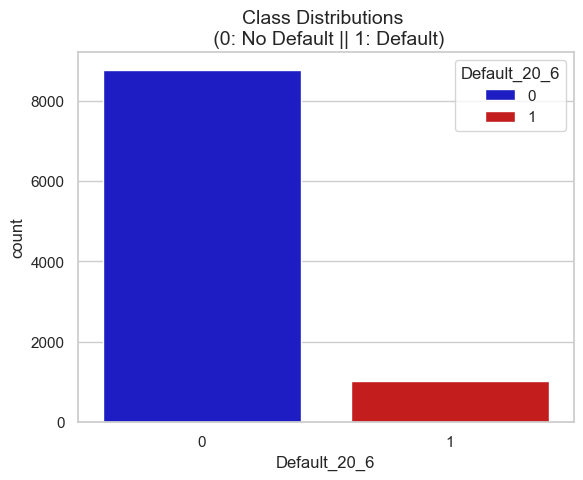

In [862]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Default_20_6', data=final_df, palette=colors,hue='Default_20_6')
plt.title('Class Distributions \n (0: No Default || 1: Default)', fontsize=14)
plt.show()

### Splitting the data into 70% train and 30% test set

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance, there could be several times more negative samples than positive samples. In such cases, it is recommended to use the **stratified sampling** technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

### **Building the model**

We will be building 4 different models:
- **Random Forest**
- **XGBoosts**
- **LightXGB**
- **Logistic Regression**

# RANDOM FOREST

### **Feature importance of Random Forest**

**Checking the model performance**

** Confusion matrix Curve for Random Forest

**Precision-Recall Curve for Random Forest

**Ajust the threshold for Random Forest

### RANDOM FOREST  ROC CURVE

*** Random Forest Train ROC Curve ***

*** Random Forest Train AUC ***

*** Random Forest Train KS ***

*** Random Forest Test ROC Curve ***

*** Random Forest Test AUC ***

*** Random Forest Test KS ***


Feature Importances:
Age                                      0.115543
NoOfGroupCustomers                       0.112446
POutstanding_DPD2                        0.081061
Customer_Vintage                         0.067556
pendapatan_lain                          0.062428
                                           ...   
AmountNextbucket_91_120_To_P121_150      0.000000
AmountNextbucket_P121_150_To_P151_180    0.000000
AmountNextbucket_P151_180_To_P180+       0.000000
#Recovery_From_P1_30                     0.000000
Amount_Max_DPD2>180                      0.000000
Length: 66, dtype: float64

Confusion Matrix - Train:
[[6132    0]
 [   0  710]]

Confusion Matrix - Test:
[[2620    9]
 [ 293   11]]

Classification Report - Train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6132
           1       1.00      1.00      1.00       710

    accuracy                           1.00      6842
   macro avg       1.00      1.00      1.00 

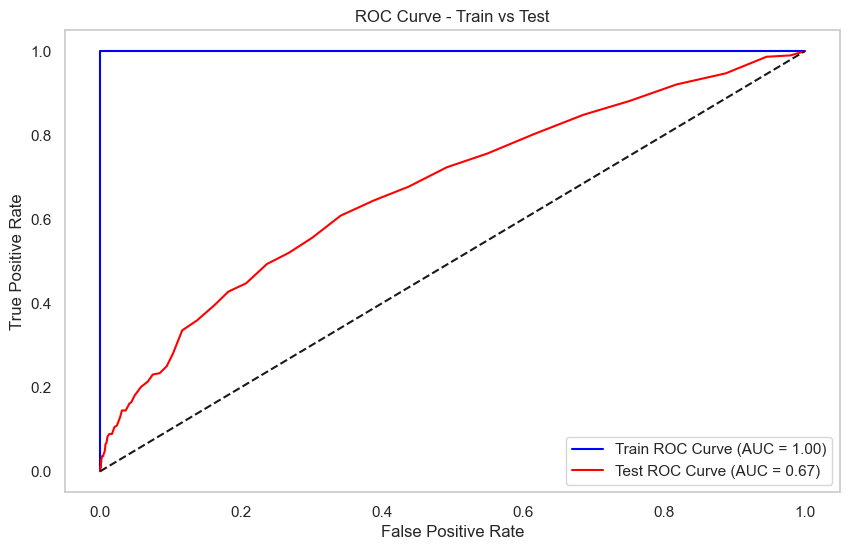

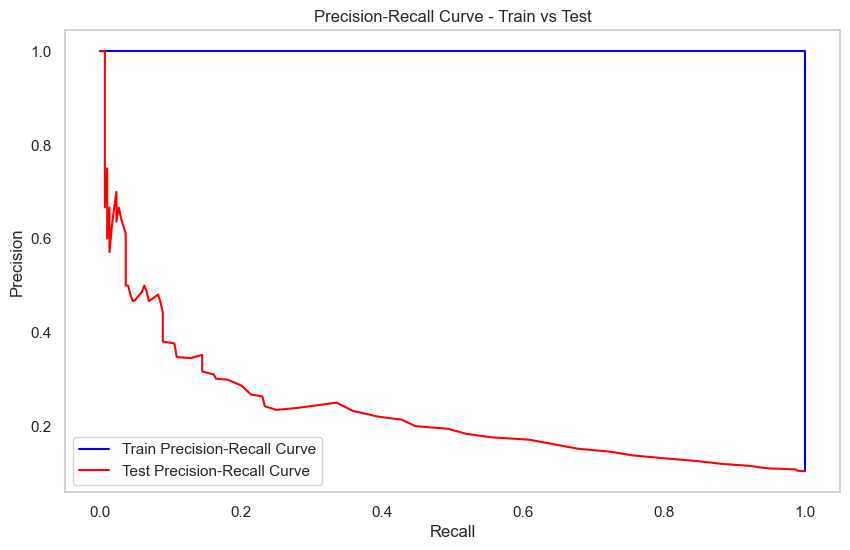


Confusion Matrix - Train (Adjusted Threshold):
[[6132    0]
 [   0  710]]

Confusion Matrix - Test (Adjusted Threshold):
[[2608   21]
 [ 284   20]]

Classification Report - Train (Adjusted Threshold):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6132
           1       1.00      1.00      1.00       710

    accuracy                           1.00      6842
   macro avg       1.00      1.00      1.00      6842
weighted avg       1.00      1.00      1.00      6842


Classification Report - Test (Adjusted Threshold):
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2629
           1       0.49      0.07      0.12       304

    accuracy                           0.90      2933
   macro avg       0.69      0.53      0.53      2933
weighted avg       0.86      0.90      0.86      2933



In [879]:
# Function to calculate KS statistic
def ks_statistic(y_true, y_proba):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    return max(tpr - fpr)
# Split data into train and test sets (70%, 30%)
X = final_df.drop(columns=['Default_20_6'])  # Features
y = final_df['Default_20_6']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# Step 1: Define RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Step 1.1: Evaluate the model performance without hyperparameter tuning
# Fit the model
rf.fit(X_train, y_train)

# Predictions and probabilities
y_train_proba = rf.predict_proba(X_train)[:, 1]
y_test_proba = rf.predict_proba(X_test)[:, 1]

y_train_pred = (y_train_proba > 0.5).astype(int)  # Default threshold 0.5
y_test_pred = (y_test_proba > 0.5).astype(int)

# Feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print("\nFeature Importances:")
print(feature_importances.sort_values(ascending=False))

# Confusion matrix (Train and Test)
print("\nConfusion Matrix - Train:")
print(confusion_matrix(y_train, y_train_pred))

print("\nConfusion Matrix - Test:")
print(confusion_matrix(y_test, y_test_pred))

# Classification report (Train and Test)
print("\nClassification Report - Train:")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report - Test:")
print(classification_report(y_test, y_test_pred))

# ROC Curve and AUC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

# AUC Scores
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

# KS Statistic
ks_train = ks_statistic(y_train, y_train_proba)
ks_test = ks_statistic(y_test, y_test_proba)

print(f"\nRandom Forest Train AUC: {auc_train:.3f}")
print(f"Random Forest Train KS: {ks_train:.3f}")

print(f"\nRandom Forest Test AUC: {auc_test:.3f}")
print(f"Random Forest Test KS: {ks_test:.3f}")

# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC Curve (AUC = {auc_train:.2f})', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {auc_test:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Train vs Test')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Precision-Recall Curve
precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_proba)
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_proba)

plt.figure(figsize=(10, 6))
plt.plot(recall_train, precision_train, label='Train Precision-Recall Curve', color='blue')
plt.plot(recall_test, precision_test, label='Test Precision-Recall Curve', color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Train vs Test')
plt.legend(loc='lower left')
plt.grid()
plt.show()

# Adjust threshold (e.g., 0.4)
y_train_pred_adj = (y_train_proba > 0.4).astype(int)
y_test_pred_adj = (y_test_proba > 0.4).astype(int)

# Confusion Matrix with adjusted threshold
print("\nConfusion Matrix - Train (Adjusted Threshold):")
print(confusion_matrix(y_train, y_train_pred_adj))

print("\nConfusion Matrix - Test (Adjusted Threshold):")
print(confusion_matrix(y_test, y_test_pred_adj))

# Classification report with adjusted threshold
print("\nClassification Report - Train (Adjusted Threshold):")
print(classification_report(y_train, y_train_pred_adj))

print("\nClassification Report - Test (Adjusted Threshold):")
print(classification_report(y_test, y_test_pred_adj))

- Overfitting: The model performs perfectly on the training set but performs poorly on the minority class in the test set, a strong indication of overfitting.
- Imbalance: The class imbalance is likely affecting the model's ability to generalize for class 1, as seen by the low recall and F1-score for this class in the test set.

### **Tuning the Random Forest hyper parameters**

**Checking the Random Forest hyper parameters tuning model performance**

### ** Feature importance of the Random Forest hyper parameters tuning model:**

** Confusion matrix Curve for Feature importance of the Random Forest hyper parameters tuning model

**Precision-Recall Curve for Random Forest hyper parameters tuning model**

**Ajust the threshold for Random Forest hyper parameters tuning model**

### Random Forest hyper parameters tuning ROC Curve

***  Random Forest hyper parameters tuning Train ROC Curve ***

***  Random Forest hyper parameters tuning AUC Train ***

***  Random Forest hyper parameters tuning KS Train ***

***  Random Forest hyper parameters tuning Test ROC Curve ***

***  Random Forest hyper parameters tuning AUC Test ***

***  Random Forest hyper parameters tuning KS Test ***

Fitting 3 folds for each of 24 candidates, totalling 72 fits

Feature Importances (Tuned):
NoOfGroupCustomers                       0.109186
Age                                      0.093214
POutstanding_DPD2                        0.067466
provinsi_group                           0.062427
Customer_Vintage                         0.060215
                                           ...   
AmountNextbucket_P61_90_To_P91_120       0.000000
Max_Loan_Term_Month_DPD2                 0.000000
AmountNextbucket_P121_150_To_P151_180    0.000000
AmountNextbucket_P151_180_To_P180+       0.000000
Amount_Max_DPD2>180                      0.000000
Length: 66, dtype: float64

Confusion Matrix - Train (Tuned):
[[6132    0]
 [ 625   85]]

Confusion Matrix - Test (Tuned):
[[2626    3]
 [ 298    6]]

Classification Report - Train (Tuned):
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      6132
           1       1.00      0.12      0.21       710

    a

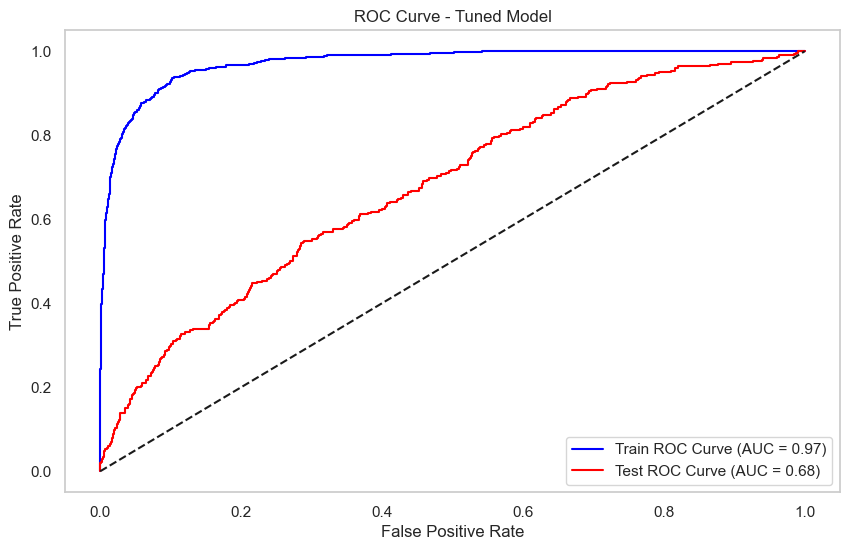

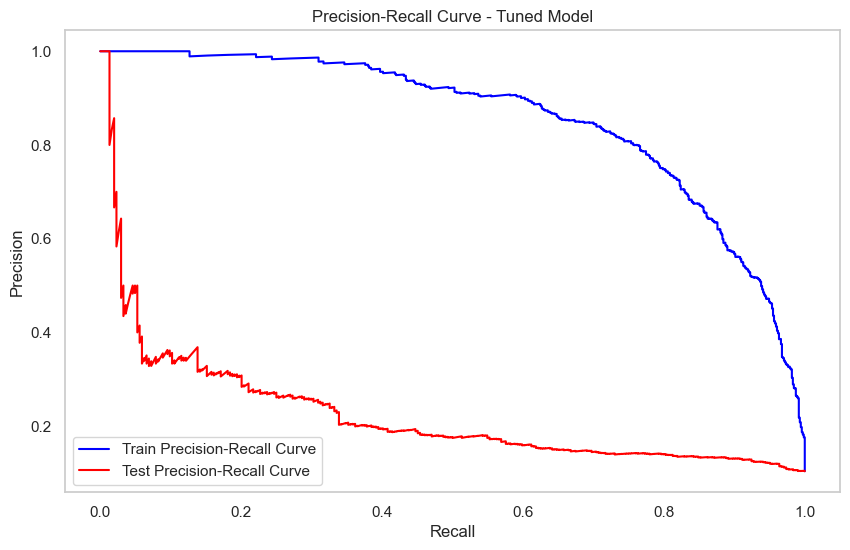


Confusion Matrix - Train Tuned (Adjusted Threshold):
[[6130    2]
 [ 551  159]]

Confusion Matrix - Test Tuned (Adjusted Threshold):
[[2615   14]
 [ 290   14]]

Classification Report - Train Tuned (Adjusted Threshold):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      6132
           1       0.99      0.22      0.37       710

    accuracy                           0.92      6842
   macro avg       0.95      0.61      0.66      6842
weighted avg       0.92      0.92      0.90      6842


Classification Report - Test Tuned (Adjusted Threshold):
              precision    recall  f1-score   support

           0       0.90      0.99      0.95      2629
           1       0.50      0.05      0.08       304

    accuracy                           0.90      2933
   macro avg       0.70      0.52      0.51      2933
weighted avg       0.86      0.90      0.86      2933



In [894]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Step 2: Define RandomForestClassifier for hyperparameter tuning
rf_tuned = RandomForestClassifier(random_state=42)

# Hyperparameter grid for tuning
param_grid_tuned = {
    'n_estimators': [50, 100],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Set up 3-fold cross-validation
cv_tuned = StratifiedKFold(n_splits=3)

# GridSearchCV setup for hyperparameter tuning
grid_search_tuned = GridSearchCV(estimator=rf_tuned, param_grid=param_grid_tuned, 
                                  cv=cv_tuned, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the tuned model
grid_search_tuned.fit(X_train, y_train)

# Get the best estimator from grid search
best_rf_tuned = grid_search_tuned.best_estimator_

# Predictions and probabilities for tuned model
y_train_proba_tuned = best_rf_tuned.predict_proba(X_train)[:, 1]
y_test_proba_tuned = best_rf_tuned.predict_proba(X_test)[:, 1]

y_train_pred_tuned = (y_train_proba_tuned > 0.5).astype(int)
y_test_pred_tuned = (y_test_proba_tuned > 0.5).astype(int)

# Step 2.1: Evaluate the tuned model performance
# Feature importance for tuned model
feature_importances_tuned = pd.Series(best_rf_tuned.feature_importances_, index=X.columns)
print("\nFeature Importances (Tuned):")
print(feature_importances_tuned.sort_values(ascending=False))

# Confusion matrix (Train and Test for tuned model)
print("\nConfusion Matrix - Train (Tuned):")
print(confusion_matrix(y_train, y_train_pred_tuned))

print("\nConfusion Matrix - Test (Tuned):")
print(confusion_matrix(y_test, y_test_pred_tuned))

# Classification report (Train and Test for tuned model)
print("\nClassification Report - Train (Tuned):")
print(classification_report(y_train, y_train_pred_tuned))

print("\nClassification Report - Test (Tuned):")
print(classification_report(y_test, y_test_pred_tuned))

# ROC Curve and AUC for tuned model
fpr_train_tuned, tpr_train_tuned, _ = roc_curve(y_train, y_train_proba_tuned)
fpr_test_tuned, tpr_test_tuned, _ = roc_curve(y_test, y_test_proba_tuned)

# AUC Scores for tuned model
auc_train_tuned = auc(fpr_train_tuned, tpr_train_tuned)
auc_test_tuned = auc(fpr_test_tuned, tpr_test_tuned)

# KS Statistic for tuned model
ks_train_tuned = ks_statistic(y_train, y_train_proba_tuned)
ks_test_tuned = ks_statistic(y_test, y_test_proba_tuned)

print(f"\nRandom Forest Tuned Train AUC: {auc_train_tuned:.3f}")
print(f"Random Forest Tuned Train KS: {ks_train_tuned:.3f}")

print(f"\nRandom Forest Tuned Test AUC: {auc_test_tuned:.3f}")
print(f"Random Forest Tuned Test KS: {ks_test_tuned:.3f}")

# Plot ROC Curves for tuned model
plt.figure(figsize=(10, 6))
plt.plot(fpr_train_tuned, tpr_train_tuned, label=f'Train ROC Curve (AUC = {auc_train_tuned:.2f})', color='blue')
plt.plot(fpr_test_tuned, tpr_test_tuned, label=f'Test ROC Curve (AUC = {auc_test_tuned:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Model')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Precision-Recall Curve for tuned model
precision_train_tuned, recall_train_tuned, _ = precision_recall_curve(y_train, y_train_proba_tuned)
precision_test_tuned, recall_test_tuned, _ = precision_recall_curve(y_test, y_test_proba_tuned)

plt.figure(figsize=(10, 6))
plt.plot(recall_train_tuned, precision_train_tuned, label='Train Precision-Recall Curve', color='blue')
plt.plot(recall_test_tuned, precision_test_tuned, label='Test Precision-Recall Curve', color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Tuned Model')
plt.legend(loc='lower left')
plt.grid()
plt.show()

# Adjust threshold for tuned model (e.g., 0.4)
y_train_pred_adj_tuned = (y_train_proba_tuned > 0.4).astype(int)
y_test_pred_adj_tuned = (y_test_proba_tuned > 0.4).astype(int)

# Confusion Matrix with adjusted threshold for tuned model
print("\nConfusion Matrix - Train Tuned (Adjusted Threshold):")
print(confusion_matrix(y_train, y_train_pred_adj_tuned))

print("\nConfusion Matrix - Test Tuned (Adjusted Threshold):")
print(confusion_matrix(y_test, y_test_pred_adj_tuned))

# Classification report with adjusted threshold for tuned model
print("\nClassification Report - Train Tuned (Adjusted Threshold):")
print(classification_report(y_train, y_train_pred_adj_tuned))

print("\nClassification Report - Test Tuned (Adjusted Threshold):")
print(classification_report(y_test, y_test_pred_adj_tuned))

- Training-Testing Gap: The model still overfits to some degree, particularly on the minority class, where the recall is much lower on the test set compared to training.
- Imbalance: The minority class (class 1) is still problematic. The model has very low recall and F1-score for class 1 on both the training and test sets, meaning it struggles to detect true positives.
- AUC and KS: Small improvements after tuning but still not enough to fully address the model's issues with class 1 predictions.

### LET'S CONSIDER THE MOST IMPORTANT  FEATURE FOR THE HYPERPARAMETER TUNING  RANDOM FOREST

### **Feature importance of the Random Forest Hyper parameters tuning model:**

**Checking the most important feature Random Forest Hyper parameters tuning model performance**

** Confusion matrix Curve for Feature importance of the Random Forest Hyper parameters tuning model

**Precision-Recall Curve for most important feature Random Forest Hyper parameters tuning model**

**Ajust the threshold for most important feature Random Forest Hyper parameters tunning model**

### Random Forest most important feature hyper parameters tuning ROC Curve

***  Random Forest most important feature hyper parameters tuning Train ROC Curve ***

***  Random Forest most important feature hyper parameters tuning AUC Train ***

***  Random Forest most important feature hyper parameters tuning KS Train ***

***  Random Forest most important feature hyper parameters tuning Test ROC Curve ***

***  Random Forest most important feature hyper parameters tuning AUC Test***

***  Random Forest most important feature hyper parameters tuning KS Test ***

The most important feature is: NoOfGroupCustomers

Feature Importances (Most Important Feature Model):
NoOfGroupCustomers    1.0
dtype: float64

Confusion Matrix - Train (Most Important Feature):
[[6128    4]
 [ 706    4]]

Confusion Matrix - Test (Most Important Feature):
[[2626    3]
 [ 303    1]]

Classification Report - Train (Most Important Feature):
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      6132
           1       0.50      0.01      0.01       710

    accuracy                           0.90      6842
   macro avg       0.70      0.50      0.48      6842
weighted avg       0.86      0.90      0.85      6842


Classification Report - Test (Most Important Feature):
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      2629
           1       0.25      0.00      0.01       304

    accuracy                           0.90      2933
   macro avg       0.57      0.50      0.

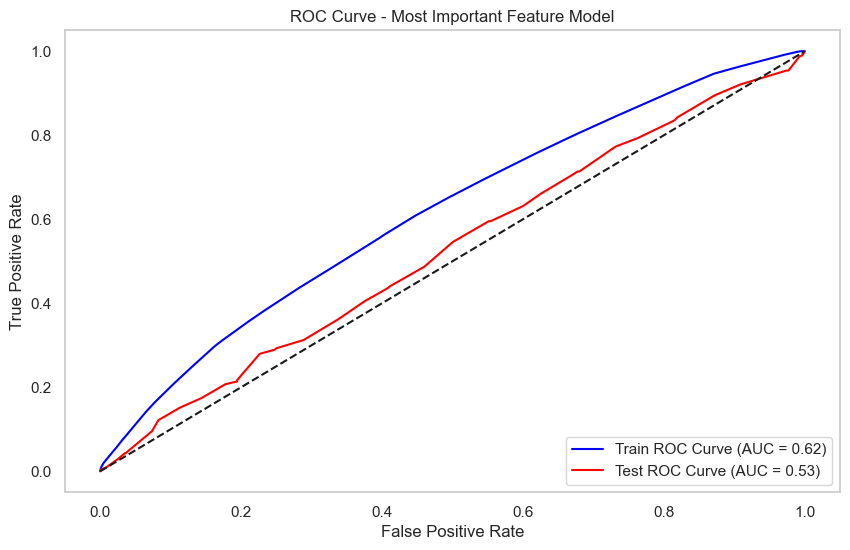

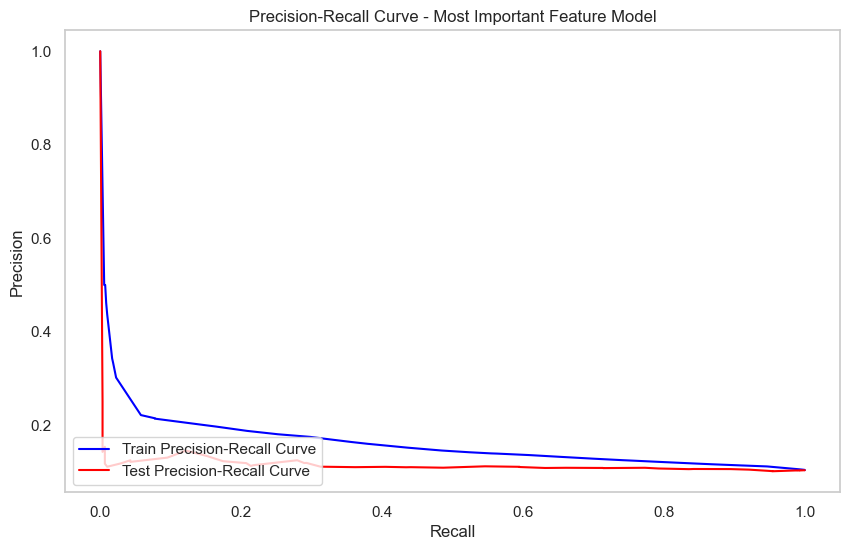


Confusion Matrix - Train Most Important Feature (Adjusted Threshold):
[[6128    4]
 [ 706    4]]

Confusion Matrix - Test Most Important Feature (Adjusted Threshold):
[[2626    3]
 [ 303    1]]

Classification Report - Train Most Important Feature (Adjusted Threshold):
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      6132
           1       0.50      0.01      0.01       710

    accuracy                           0.90      6842
   macro avg       0.70      0.50      0.48      6842
weighted avg       0.86      0.90      0.85      6842


Classification Report - Test Most Important Feature (Adjusted Threshold):
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      2629
           1       0.25      0.00      0.01       304

    accuracy                           0.90      2933
   macro avg       0.57      0.50      0.48      2933
weighted avg       0.83      0.90      0.85      2933



In [909]:
# Step 3: Get the most important feature from the tuned Random Forest model
most_important_feature = feature_importances_tuned.idxmax()
print(f"The most important feature is: {most_important_feature}")

# Step 3.1: Create a new dataset with only the most important feature
X_most_important = X[[most_important_feature]]  # Only the most important feature
X_train_most_important, X_test_most_important, y_train_most_important, y_test_most_important = train_test_split(
    X_most_important, y, test_size=0.30, stratify=y, random_state=42
)

# Fit a new RandomForestClassifier using only the most important feature
rf_most_important = RandomForestClassifier(random_state=42)
rf_most_important.fit(X_train_most_important, y_train_most_important)

# Predictions and probabilities for the most important feature model
y_train_proba_most_important = rf_most_important.predict_proba(X_train_most_important)[:, 1]
y_test_proba_most_important = rf_most_important.predict_proba(X_test_most_important)[:, 1]

y_train_pred_most_important = (y_train_proba_most_important > 0.5).astype(int)  # Default threshold 0.5
y_test_pred_most_important = (y_test_proba_most_important > 0.5).astype(int)

# Checking the performance of the model with the most important feature
# Feature importance
feature_importances_most_important = pd.Series(rf_most_important.feature_importances_, index=X_most_important.columns)
print("\nFeature Importances (Most Important Feature Model):")
print(feature_importances_most_important)

# Confusion matrix (Train and Test for most important feature model)
print("\nConfusion Matrix - Train (Most Important Feature):")
print(confusion_matrix(y_train_most_important, y_train_pred_most_important))

print("\nConfusion Matrix - Test (Most Important Feature):")
print(confusion_matrix(y_test_most_important, y_test_pred_most_important))

# Classification report (Train and Test for most important feature model)
print("\nClassification Report - Train (Most Important Feature):")
print(classification_report(y_train_most_important, y_train_pred_most_important))

print("\nClassification Report - Test (Most Important Feature):")
print(classification_report(y_test_most_important, y_test_pred_most_important))

# ROC Curve and AUC for most important feature model
fpr_train_most_important, tpr_train_most_important, _ = roc_curve(y_train_most_important, y_train_proba_most_important)
fpr_test_most_important, tpr_test_most_important, _ = roc_curve(y_test_most_important, y_test_proba_most_important)

# AUC Scores for most important feature model
auc_train_most_important = auc(fpr_train_most_important, tpr_train_most_important)
auc_test_most_important = auc(fpr_test_most_important, tpr_test_most_important)



# KS Statistic for tuned model
ks_train_tuned = ks_statistic(y_train, y_train_proba_most_important)
ks_test_tuned = ks_statistic(y_test, y_test_proba_most_important)

print(f"\nMost Important Feature Train AUC: {auc_train_most_important:.3f}")
print(f"Most Important Feature Train KS: {ks_train_tuned:.3f}")

print(f"Most Important Feature Test AUC: {auc_test_most_important:.3f}")
print(f"Most Important Feature Test KS: {ks_test_tuned:.3f}")

# Plot ROC Curves for most important feature model
plt.figure(figsize=(10, 6))
plt.plot(fpr_train_most_important, tpr_train_most_important, label=f'Train ROC Curve (AUC = {auc_train_most_important:.2f})', color='blue')
plt.plot(fpr_test_most_important, tpr_test_most_important, label=f'Test ROC Curve (AUC = {auc_test_most_important:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Most Important Feature Model')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Precision-Recall Curve for most important feature model
precision_train_most_important, recall_train_most_important, _ = precision_recall_curve(y_train_most_important, y_train_proba_most_important)
precision_test_most_important, recall_test_most_important, _ = precision_recall_curve(y_test_most_important, y_test_proba_most_important)

plt.figure(figsize=(10, 6))
plt.plot(recall_train_most_important, precision_train_most_important, label='Train Precision-Recall Curve', color='blue')
plt.plot(recall_test_most_important, precision_test_most_important, label='Test Precision-Recall Curve', color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Most Important Feature Model')
plt.legend(loc='lower left')
plt.grid()
plt.show()

# Adjust threshold for most important feature model (e.g., 0.4)
y_train_pred_adj_most_important = (y_train_proba_most_important > 0.4).astype(int)
y_test_pred_adj_most_important = (y_test_proba_most_important > 0.4).astype(int)

# Confusion Matrix with adjusted threshold for most important feature model
print("\nConfusion Matrix - Train Most Important Feature (Adjusted Threshold):")
print(confusion_matrix(y_train_most_important, y_train_pred_adj_most_important))

print("\nConfusion Matrix - Test Most Important Feature (Adjusted Threshold):")
print(confusion_matrix(y_test_most_important, y_test_pred_adj_most_important))

# Classification report with adjusted threshold for most important feature model
print("\nClassification Report - Train Most Important Feature (Adjusted Threshold):")
print(classification_report(y_train_most_important, y_train_pred_adj_most_important))

print("\nClassification Report - Test Most Important Feature (Adjusted Threshold):")
print(classification_report(y_test_most_important, y_test_pred_adj_most_important))

# XGBoost


Feature Importances for XGBoost:
Amount_Max_DPD2>10                       0.100458
Max_interest_amount_arrears              0.064512
provinsi_group                           0.054113
Amount_Max_DPD2>0                        0.045173
Vintage_Last_Loan_DPD2                   0.038687
                                           ...   
AmountNextbucket_P31_60_To_P61_90        0.000000
AmountNextbucket_P61_90_To_P91_120       0.000000
AmountNextbucket_91_120_To_P121_150      0.000000
AmountNextbucket_P121_150_To_P151_180    0.000000
Amount_Max_DPD2>180                      0.000000
Length: 66, dtype: float32

Confusion Matrix - Train (XGBoost):
[[6131    1]
 [ 292  418]]

Confusion Matrix - Test (XGBoost):
[[2599   30]
 [ 281   23]]

Classification Report - Train (XGBoost):
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      6132
           1       1.00      0.59      0.74       710

    accuracy                           0.96      6842
  

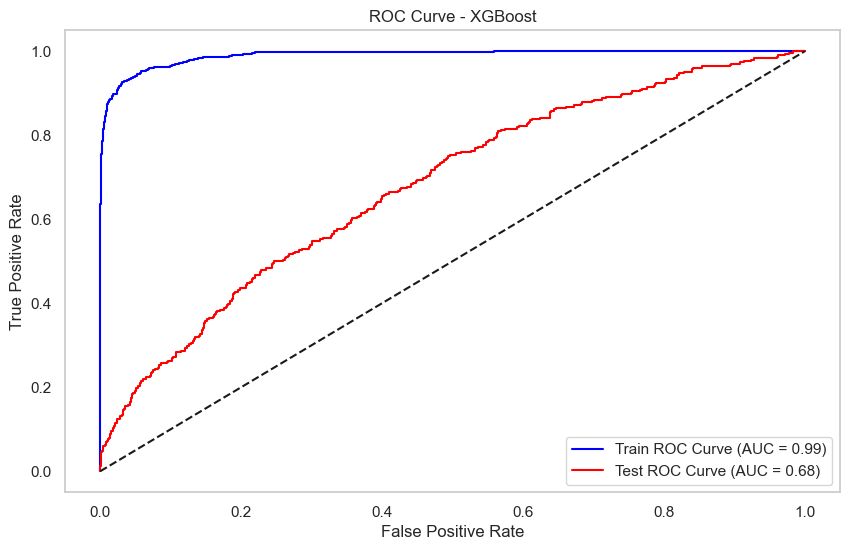

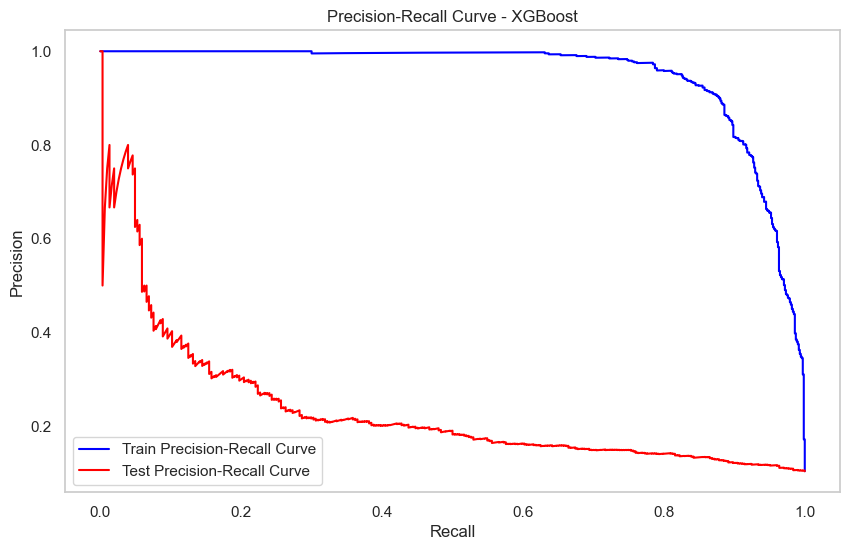


Confusion Matrix - Train (XGBoost, Adjusted Threshold):
[[6125    7]
 [ 199  511]]

Confusion Matrix - Test (XGBoost, Adjusted Threshold):
[[2574   55]
 [ 269   35]]

Classification Report - Train (XGBoost, Adjusted Threshold):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      6132
           1       0.99      0.72      0.83       710

    accuracy                           0.97      6842
   macro avg       0.98      0.86      0.91      6842
weighted avg       0.97      0.97      0.97      6842


Classification Report - Test (XGBoost, Adjusted Threshold):
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2629
           1       0.39      0.12      0.18       304

    accuracy                           0.89      2933
   macro avg       0.65      0.55      0.56      2933
weighted avg       0.85      0.89      0.86      2933



In [911]:

# Step 1: Simple XGBoost Classifier without hyperparameter tuning
xgb_model = xgb.XGBClassifier(random_state=42)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Predictions and probabilities
y_train_proba_xgb = xgb_model.predict_proba(X_train)[:, 1]
y_test_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

y_train_pred_xgb = (y_train_proba_xgb > 0.5).astype(int)
y_test_pred_xgb = (y_test_proba_xgb > 0.5).astype(int)

# Feature importance
feature_importances_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns)
print("\nFeature Importances for XGBoost:")
print(feature_importances_xgb.sort_values(ascending=False))

# Confusion matrix
print("\nConfusion Matrix - Train (XGBoost):")
print(confusion_matrix(y_train, y_train_pred_xgb))

print("\nConfusion Matrix - Test (XGBoost):")
print(confusion_matrix(y_test, y_test_pred_xgb))

# Classification report
print("\nClassification Report - Train (XGBoost):")
print(classification_report(y_train, y_train_pred_xgb))

print("\nClassification Report - Test (XGBoost):")
print(classification_report(y_test, y_test_pred_xgb))

# ROC Curve and AUC
fpr_train_xgb, tpr_train_xgb, _ = roc_curve(y_train, y_train_proba_xgb)
fpr_test_xgb, tpr_test_xgb, _ = roc_curve(y_test, y_test_proba_xgb)

auc_train_xgb = auc(fpr_train_xgb, tpr_train_xgb)
auc_test_xgb = auc(fpr_test_xgb, tpr_test_xgb)

# KS Statistic
ks_train_xgb = max(tpr_train_xgb - fpr_train_xgb)
ks_test_xgb = max(tpr_test_xgb - fpr_test_xgb)

print(f"\nXGBoost Train AUC: {auc_train_xgb:.3f}")
print(f"XGBoost Train KS: {ks_train_xgb:.3f}")
print(f"\nXGBoost Test AUC: {auc_test_xgb:.3f}")
print(f"XGBoost Test KS: {ks_test_xgb:.3f}")

# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_train_xgb, tpr_train_xgb, label=f'Train ROC Curve (AUC = {auc_train_xgb:.2f})', color='blue')
plt.plot(fpr_test_xgb, tpr_test_xgb, label=f'Test ROC Curve (AUC = {auc_test_xgb:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Precision-Recall Curve
precision_train_xgb, recall_train_xgb, _ = precision_recall_curve(y_train, y_train_proba_xgb)
precision_test_xgb, recall_test_xgb, _ = precision_recall_curve(y_test, y_test_proba_xgb)

plt.figure(figsize=(10, 6))
plt.plot(recall_train_xgb, precision_train_xgb, label='Train Precision-Recall Curve', color='blue')
plt.plot(recall_test_xgb, precision_test_xgb, label='Test Precision-Recall Curve', color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - XGBoost')
plt.legend(loc='lower left')
plt.grid()
plt.show()

# Adjust threshold (e.g., 0.4)
y_train_pred_xgb_adj = (y_train_proba_xgb > 0.4).astype(int)
y_test_pred_xgb_adj = (y_test_proba_xgb > 0.4).astype(int)

# Confusion Matrix with adjusted threshold
print("\nConfusion Matrix - Train (XGBoost, Adjusted Threshold):")
print(confusion_matrix(y_train, y_train_pred_xgb_adj))

print("\nConfusion Matrix - Test (XGBoost, Adjusted Threshold):")
print(confusion_matrix(y_test, y_test_pred_xgb_adj))

# Classification report with adjusted threshold
print("\nClassification Report - Train (XGBoost, Adjusted Threshold):")
print(classification_report(y_train, y_train_pred_xgb_adj))

print("\nClassification Report - Test (XGBoost, Adjusted Threshold):")
print(classification_report(y_test, y_test_pred_xgb_adj))

- Training-Testing Gap: The model performs well on the training set, especially on class 1 (with improved recall compared to previous models), but this performance does not fully generalize to the test set, particularly for class 1.
- Class Imbalance: The minority class (class 1) remains problematic. While there is some improvement in precision, the recall remains very low, meaning the model continues to miss most of the true positives for class 1.
- AUC and KS: The AUC and KS values on the test set remain moderate, showing the model still struggles to distinguish between the classes, especially in the test data.

### **Tuning the XGBoost Hyper parameters tuning**

### **Feature importance of the XGBoost Hyper parameters tuning model:**

**Checking the XGBoost Hyper parameters tuning model performance**

** Confusion matrix Curve for XGBoost Hyper parameters tuning model

**Precision-Recall Curve for XGBoost Hyper parameters tuning model**

**Ajust the threshold for XGBoost Hyper parameters tunning model**

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': None, 'n_estimators': 200, 'subsample': 0.8}

Feature Importances for Tuned XGBoost:
Amount_Max_DPD2>10                       0.060389
Amount_Max_DPD2>0                        0.054282
provinsi_group                           0.052057
Perc_AcumDaysDPD2                        0.050757
WMDPD2_desc_DPD2                         0.048323
                                           ...   
AmountNextbucket_91_120_To_P121_150      0.000000
AmountNextbucket_P121_150_To_P151_180    0.000000
AmountNextbucket_P151_180_To_P180+       0.000000
#Recovery_From_P1_30                     0.000000
Amount_Max_DPD2>180                      0.000000
Length: 66, dtype: float32

Confusion Matrix - Train (XGBoost):
[[6131    1]
 [ 669   41]]

Confusion Matrix - Test (XGBoost):
[[2626    3]
 [ 297    7]]

Classification Report - Train (XGBoost):
              pr

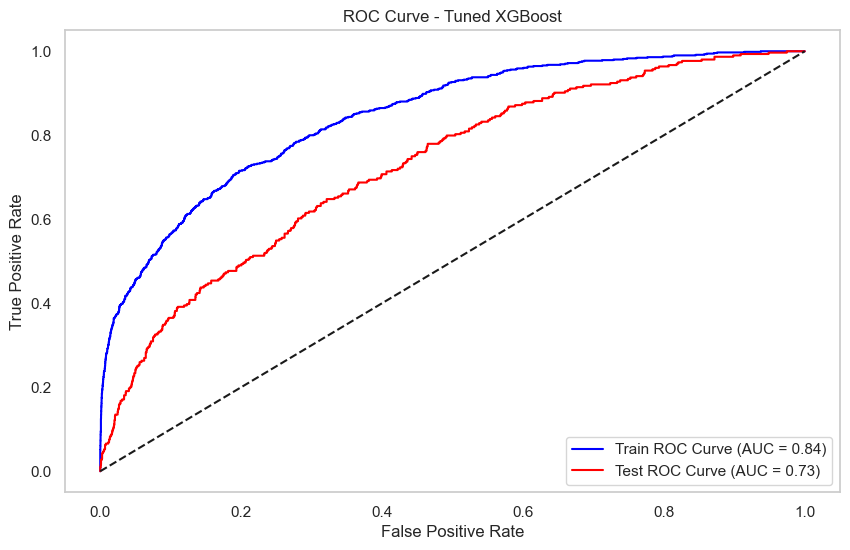

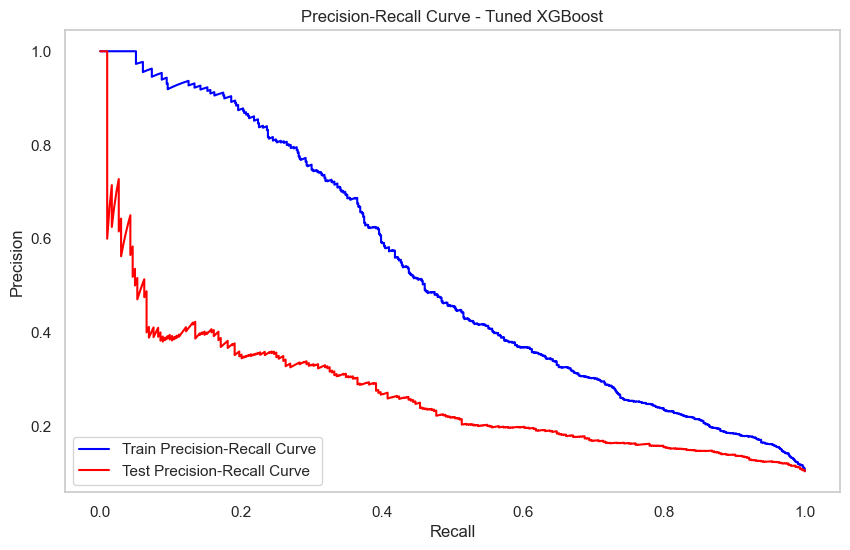


Confusion Matrix - Train (Tuned XGBoost, Adjusted Threshold):
[[6126    6]
 [ 636   74]]

Confusion Matrix - Test (Tuned XGBoost, Adjusted Threshold):
[[2622    7]
 [ 291   13]]

Classification Report - Train (Tuned XGBoost, Adjusted Threshold):
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      6132
           1       0.93      0.10      0.19       710

    accuracy                           0.91      6842
   macro avg       0.92      0.55      0.57      6842
weighted avg       0.91      0.91      0.87      6842


Classification Report - Test (Tuned XGBoost, Adjusted Threshold):
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2629
           1       0.65      0.04      0.08       304

    accuracy                           0.90      2933
   macro avg       0.78      0.52      0.51      2933
weighted avg       0.87      0.90      0.86      2933



In [919]:
# Step 2: Hyperparameter tuning for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [None, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb.XGBClassifier(random_state=42), 
                                param_grid=param_grid_xgb, 
                                scoring='roc_auc', 
                                cv=3, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search_xgb.fit(X_train, y_train)

# Best parameters
best_params_xgb = grid_search_xgb.best_params_
print(f"Best parameters for XGBoost: {best_params_xgb}")

# Best estimator
best_xgb_tuned = grid_search_xgb.best_estimator_

# Predictions and probabilities for tuned model
y_train_proba_xgb_tuned = best_xgb_tuned.predict_proba(X_train)[:, 1]
y_test_proba_xgb_tuned = best_xgb_tuned.predict_proba(X_test)[:, 1]

y_train_pred_xgb = (y_train_proba_xgb_tuned > 0.5).astype(int)
y_test_pred_xgb = (y_test_proba_xgb_tuned > 0.5).astype(int)

# # Feature importance
feature_importances_xgb = pd.Series(best_xgb_tuned.feature_importances_, index=X.columns)
print("\nFeature Importances for Tuned XGBoost:")
print(feature_importances_xgb.sort_values(ascending=False))

# Confusion matrix
print("\nConfusion Matrix - Train (XGBoost):")
print(confusion_matrix(y_train, y_train_pred_xgb))

print("\nConfusion Matrix - Test (XGBoost):")
print(confusion_matrix(y_test, y_test_pred_xgb))

# Classification report
print("\nClassification Report - Train (XGBoost):")
print(classification_report(y_train, y_train_pred_xgb))

print("\nClassification Report - Test (XGBoost):")
print(classification_report(y_test, y_test_pred_xgb))


# ROC Curve and AUC for tuned model
fpr_train_xgb_tuned, tpr_train_xgb_tuned, _ = roc_curve(y_train, y_train_proba_xgb_tuned)
fpr_test_xgb_tuned, tpr_test_xgb_tuned, _ = roc_curve(y_test, y_test_proba_xgb_tuned)

auc_train_xgb_tuned = auc(fpr_train_xgb_tuned, tpr_train_xgb_tuned)
auc_test_xgb_tuned = auc(fpr_test_xgb_tuned, tpr_test_xgb_tuned)

# KS Statistic
ks_train_xgb_tuned = max(tpr_train_xgb_tuned - fpr_train_xgb_tuned)
ks_test_xgb_tuned = max(tpr_test_xgb_tuned - fpr_test_xgb_tuned)

print(f"\nXGBoost Tuned Train AUC: {auc_train_xgb_tuned:.3f}")
print(f"XGBoost Tuned Test AUC: {auc_test_xgb_tuned:.3f}")
print(f"XGBoost Tuned Train KS: {ks_train_xgb_tuned:.3f}")
print(f"XGBoost Tuned Test KS: {ks_test_xgb_tuned:.3f}")

# Plot ROC Curves for tuned model
plt.figure(figsize=(10, 6))
plt.plot(fpr_train_xgb_tuned, tpr_train_xgb_tuned, label=f'Train ROC Curve (AUC = {auc_train_xgb_tuned:.2f})', color='blue')
plt.plot(fpr_test_xgb_tuned, tpr_test_xgb_tuned, label=f'Test ROC Curve (AUC = {auc_test_xgb_tuned:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned XGBoost')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Precision-Recall Curve
precision_train_xgb_tuned, recall_train_xgb_tuned, _ = precision_recall_curve(y_train, y_train_proba_xgb_tuned)
precision_test_xgb_tuned, recall_test_xgb_tuned, _ = precision_recall_curve(y_test, y_test_proba_xgb_tuned)

plt.figure(figsize=(10, 6))
plt.plot(recall_train_xgb_tuned, precision_train_xgb_tuned, label='Train Precision-Recall Curve', color='blue')
plt.plot(recall_test_xgb_tuned, precision_test_xgb_tuned, label='Test Precision-Recall Curve', color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Tuned XGBoost')
plt.legend(loc='lower left')
plt.grid()
plt.show()

# Adjust threshold for tuned model
y_train_pred_xgb_tuned_adj = (y_train_proba_xgb_tuned > 0.4).astype(int)
y_test_pred_xgb_tuned_adj = (y_test_proba_xgb_tuned > 0.4).astype(int)

# Confusion Matrix with adjusted threshold for tuned model
print("\nConfusion Matrix - Train (Tuned XGBoost, Adjusted Threshold):")
print(confusion_matrix(y_train, y_train_pred_xgb_tuned_adj))

print("\nConfusion Matrix - Test (Tuned XGBoost, Adjusted Threshold):")
print(confusion_matrix(y_test, y_test_pred_xgb_tuned_adj))

# Classification report with adjusted threshold for tuned model
print("\nClassification Report - Train (Tuned XGBoost, Adjusted Threshold):")
print(classification_report(y_train, y_train_pred_xgb_tuned_adj))

print("\nClassification Report - Test (Tuned XGBoost, Adjusted Threshold):")
print(classification_report(y_test, y_test_pred_xgb_tuned_adj))

- Training-Testing Gap: The model still overfits to some degree, achieving high accuracy on the training set but struggling with the minority class. The low recall for class 1 indicates a challenge in generalizing from the training to the test set.
- Class Imbalance: Class 1 remains a significant issue. While precision has improved, the model's inability to correctly identify most instances of class 1 (very low recall) highlights ongoing challenges with class imbalance.

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': None, 'n_estimators': 100, 'scale_pos_weight': 9, 'subsample': 0.8}

Feature Importances for Tuned XGBoost:
provinsi_group                        0.086466
sum_Max_DPD2                          0.065132
Perc_AcumDaysDPD2                     0.063277
Amount_Max_DPD2>0                     0.052471
WMDPD2_desc_DPD2                      0.051875
                                        ...   
#Nextbucket_P61_90_To_P91_120         0.000000
AmountNextbucket_P1_30_To_P31_60      0.000000
AmountNextbucket_P31_60_To_P61_90     0.000000
AmountNextbucket_P61_90_To_P91_120    0.000000
Amount_Max_DPD2>180                   0.000000
Length: 66, dtype: float32

Confusion Matrix - Train (XGBoost):
[[4429 1703]
 [ 162  548]]

Confusion Matrix - Test (XGBoost):
[[1853  776]
 [ 133  171]]

Classification Report - Train (XGBoost):
              precision   

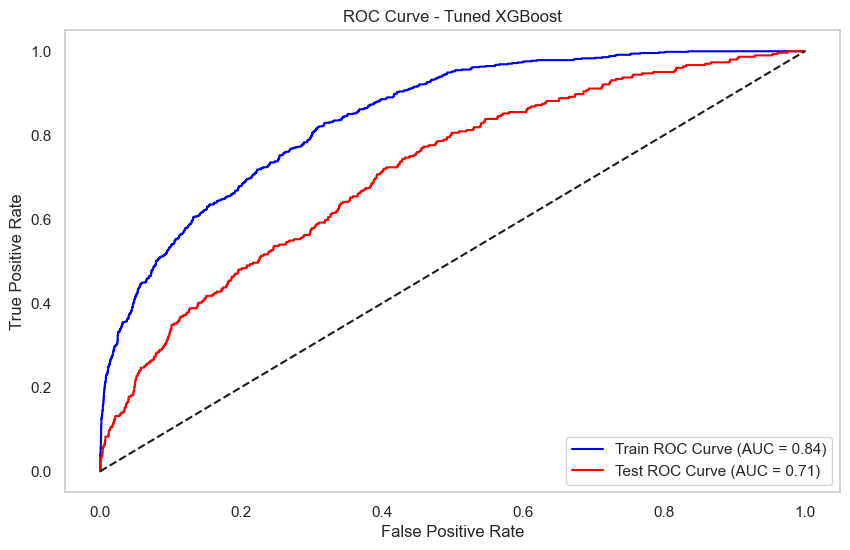

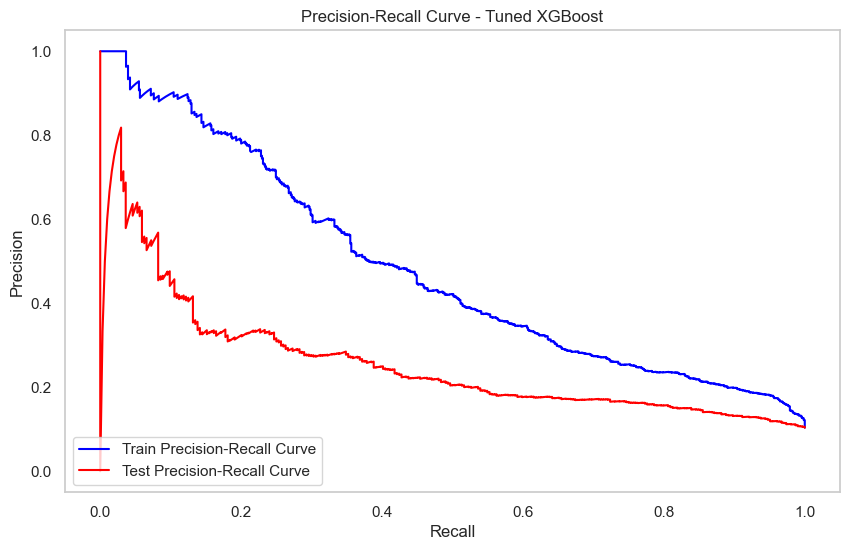


Confusion Matrix - Train (Tuned XGBoost, Adjusted Threshold):
[[1838 4294]
 [  12  698]]

Confusion Matrix - Test (Tuned XGBoost, Adjusted Threshold):
[[ 739 1890]
 [  24  280]]

Classification Report - Train (Tuned XGBoost, Adjusted Threshold):
              precision    recall  f1-score   support

           0       0.99      0.30      0.46      6132
           1       0.14      0.98      0.24       710

    accuracy                           0.37      6842
   macro avg       0.57      0.64      0.35      6842
weighted avg       0.90      0.37      0.44      6842


Classification Report - Test (Tuned XGBoost, Adjusted Threshold):
              precision    recall  f1-score   support

           0       0.97      0.28      0.44      2629
           1       0.13      0.92      0.23       304

    accuracy                           0.35      2933
   macro avg       0.55      0.60      0.33      2933
weighted avg       0.88      0.35      0.41      2933



In [921]:
# Step 2: Hyperparameter tuning for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [None, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
    ,'scale_pos_weight': [9]
}

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb.XGBClassifier(random_state=42), 
                                param_grid=param_grid_xgb, 
                                scoring='roc_auc', 
                                cv=3, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search_xgb.fit(X_train, y_train)

# Best parameters
best_params_xgb = grid_search_xgb.best_params_
print(f"Best parameters for XGBoost: {best_params_xgb}")

# Best estimator
best_xgb_tuned = grid_search_xgb.best_estimator_

# Predictions and probabilities for tuned model
y_train_proba_xgb_tuned = best_xgb_tuned.predict_proba(X_train)[:, 1]
y_test_proba_xgb_tuned = best_xgb_tuned.predict_proba(X_test)[:, 1]

y_train_pred_xgb = (y_train_proba_xgb_tuned > 0.5).astype(int)
y_test_pred_xgb = (y_test_proba_xgb_tuned > 0.5).astype(int)

# # Feature importance
feature_importances_xgb = pd.Series(best_xgb_tuned.feature_importances_, index=X.columns)
print("\nFeature Importances for Tuned XGBoost:")
print(feature_importances_xgb.sort_values(ascending=False))

# Confusion matrix
print("\nConfusion Matrix - Train (XGBoost):")
print(confusion_matrix(y_train, y_train_pred_xgb))

print("\nConfusion Matrix - Test (XGBoost):")
print(confusion_matrix(y_test, y_test_pred_xgb))

# Classification report
print("\nClassification Report - Train (XGBoost):")
print(classification_report(y_train, y_train_pred_xgb))

print("\nClassification Report - Test (XGBoost):")
print(classification_report(y_test, y_test_pred_xgb))


# ROC Curve and AUC for tuned model
fpr_train_xgb_tuned, tpr_train_xgb_tuned, _ = roc_curve(y_train, y_train_proba_xgb_tuned)
fpr_test_xgb_tuned, tpr_test_xgb_tuned, _ = roc_curve(y_test, y_test_proba_xgb_tuned)

auc_train_xgb_tuned = auc(fpr_train_xgb_tuned, tpr_train_xgb_tuned)
auc_test_xgb_tuned = auc(fpr_test_xgb_tuned, tpr_test_xgb_tuned)

# KS Statistic
ks_train_xgb_tuned = max(tpr_train_xgb_tuned - fpr_train_xgb_tuned)
ks_test_xgb_tuned = max(tpr_test_xgb_tuned - fpr_test_xgb_tuned)

print(f"\nXGBoost Tuned Train AUC: {auc_train_xgb_tuned:.3f}")
print(f"XGBoost Tuned Test AUC: {auc_test_xgb_tuned:.3f}")
print(f"XGBoost Tuned Train KS: {ks_train_xgb_tuned:.3f}")
print(f"XGBoost Tuned Test KS: {ks_test_xgb_tuned:.3f}")

# Plot ROC Curves for tuned model
plt.figure(figsize=(10, 6))
plt.plot(fpr_train_xgb_tuned, tpr_train_xgb_tuned, label=f'Train ROC Curve (AUC = {auc_train_xgb_tuned:.2f})', color='blue')
plt.plot(fpr_test_xgb_tuned, tpr_test_xgb_tuned, label=f'Test ROC Curve (AUC = {auc_test_xgb_tuned:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned XGBoost')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Precision-Recall Curve
precision_train_xgb_tuned, recall_train_xgb_tuned, _ = precision_recall_curve(y_train, y_train_proba_xgb_tuned)
precision_test_xgb_tuned, recall_test_xgb_tuned, _ = precision_recall_curve(y_test, y_test_proba_xgb_tuned)

plt.figure(figsize=(10, 6))
plt.plot(recall_train_xgb_tuned, precision_train_xgb_tuned, label='Train Precision-Recall Curve', color='blue')
plt.plot(recall_test_xgb_tuned, precision_test_xgb_tuned, label='Test Precision-Recall Curve', color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Tuned XGBoost')
plt.legend(loc='lower left')
plt.grid()
plt.show()

# Adjust threshold for tuned model
y_train_pred_xgb_tuned_adj = (y_train_proba_xgb_tuned > 0.4).astype(int)
y_test_pred_xgb_tuned_adj = (y_test_proba_xgb_tuned > 0.4).astype(int)

# Confusion Matrix with adjusted threshold for tuned model
print("\nConfusion Matrix - Train (Tuned XGBoost, Adjusted Threshold):")
print(confusion_matrix(y_train, y_train_pred_xgb_tuned_adj))

print("\nConfusion Matrix - Test (Tuned XGBoost, Adjusted Threshold):")
print(confusion_matrix(y_test, y_test_pred_xgb_tuned_adj))

# Classification report with adjusted threshold for tuned model
print("\nClassification Report - Train (Tuned XGBoost, Adjusted Threshold):")
print(classification_report(y_train, y_train_pred_xgb_tuned_adj))

print("\nClassification Report - Test (Tuned XGBoost, Adjusted Threshold):")
print(classification_report(y_test, y_test_pred_xgb_tuned_adj))

### XGBoost Hyper parameters tunning ROC Curve

*** XGBoost Hyper parameters tunning Train ROC Curve ***

*** XGBoost Hyper parameters tunning AUC Train ***

*** XGBoost Hyper parameters tunning KS Train ***

*** XGBoost Hyper parameters tunning Test ROC Curve ***

*** XGBoost Hyper parameters tunning AUC Test ***

*** XGBoost Hyper parameters tunning KS Test ***

#### Let's consider the most important feature for the XGBoost hyperparameter tuning

### **Feature importance of the XGBoost hyperparameter tuning model:**

Checking the Feature importance of the most important feature XGBoost hyperparameter tuning model

**Checking the XGBoost hyperparameter tuning model performance**

** Confusion matrix Curve for most important feature XGBoost hyperparameter tuning model

**Precision-Recall Curve for most important feature XGBoost hyperparameter tuning model**

**Ajust the threshold for most important feature XGBoost hyperparameter tuning model**

*** XGBoost Hyper parameters tunning the most important feature ROC Curve ***

*** XGBoost Hyper parameters tunning the most important feature Train ROC Curve ***

*** XGBoost Hyper parameters tunning the most important feature AUC Train ***

*** XGBoost Hyper parameters tunning the most important feature KS Train ***

*** XGBoost Hyper parameters tunning the most important feature Test ROC Curve ***

*** XGBoost Hyper parameters tunning the most important feature AUC Test ***

*** XGBoost Hyper parameters tunning the most important feature KS Test ***


Feature Importances for Tuned XGBoost:
provinsi_group                        0.086466
sum_Max_DPD2                          0.065132
Perc_AcumDaysDPD2                     0.063277
Amount_Max_DPD2>0                     0.052471
WMDPD2_desc_DPD2                      0.051875
                                        ...   
#Nextbucket_P61_90_To_P91_120         0.000000
AmountNextbucket_P1_30_To_P31_60      0.000000
AmountNextbucket_P31_60_To_P61_90     0.000000
AmountNextbucket_P61_90_To_P91_120    0.000000
Amount_Max_DPD2>180                   0.000000
Length: 66, dtype: float32

Most Important Feature: provinsi_group

Most Important Feature Model Train AUC: 0.638
Most Important Feature Model Train KS: 0.190

Most Important Feature Model Test AUC: 0.638
Most Important Feature Model Test KS: 0.174


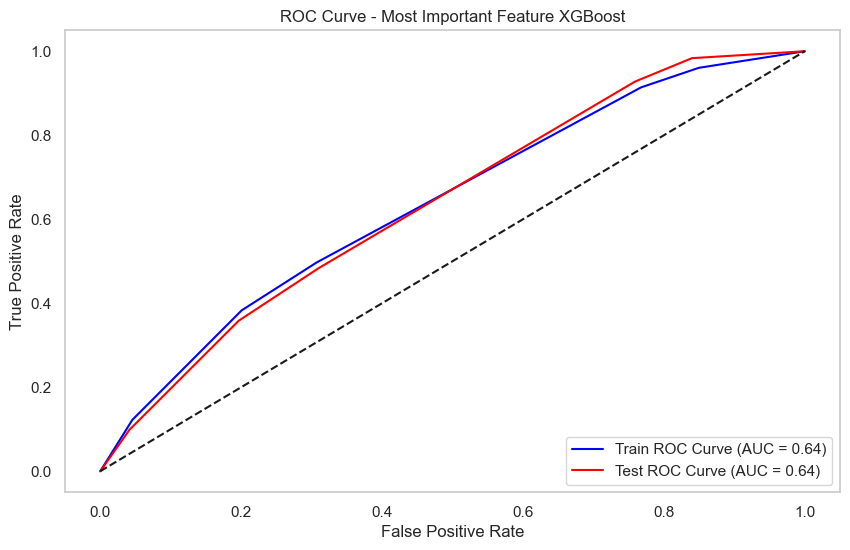


Confusion Matrix - Train (Most Important Feature XGBoost):
[[4248 1884]
 [ 357  353]]

Confusion Matrix - Test (Most Important Feature XGBoost):
[[1814  815]
 [ 157  147]]

Classification Report - Train (Most Important Feature XGBoost):
              precision    recall  f1-score   support

           0       0.92      0.69      0.79      6132
           1       0.16      0.50      0.24       710

    accuracy                           0.67      6842
   macro avg       0.54      0.59      0.52      6842
weighted avg       0.84      0.67      0.73      6842


Classification Report - Test (Most Important Feature XGBoost):
              precision    recall  f1-score   support

           0       0.92      0.69      0.79      2629
           1       0.15      0.48      0.23       304

    accuracy                           0.67      2933
   macro avg       0.54      0.59      0.51      2933
weighted avg       0.84      0.67      0.73      2933



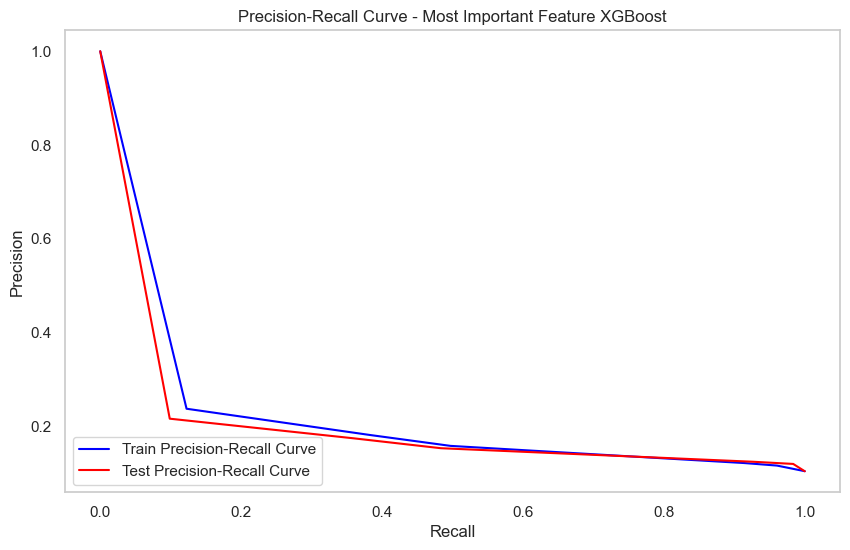


Confusion Matrix - Train (Most Important Feature XGBoost, Adjusted Threshold):
[[ 922 5210]
 [  28  682]]

Confusion Matrix - Test (Most Important Feature XGBoost, Adjusted Threshold):
[[ 421 2208]
 [   5  299]]

Classification Report - Train (Most Important Feature XGBoost, Adjusted Threshold):
              precision    recall  f1-score   support

           0       0.97      0.15      0.26      6132
           1       0.12      0.96      0.21       710

    accuracy                           0.23      6842
   macro avg       0.54      0.56      0.23      6842
weighted avg       0.88      0.23      0.25      6842


Classification Report - Test (Most Important Feature XGBoost, Adjusted Threshold):
              precision    recall  f1-score   support

           0       0.99      0.16      0.28      2629
           1       0.12      0.98      0.21       304

    accuracy                           0.25      2933
   macro avg       0.55      0.57      0.24      2933
weighted avg       

In [943]:
# Step 3: Feature importance of the XGBoost hyperparameter tuning model
feature_importances_xgb_tuned = pd.Series(best_xgb_tuned.feature_importances_, index=X_train.columns)

# Display feature importances
print("\nFeature Importances for Tuned XGBoost:")
print(feature_importances_xgb_tuned.sort_values(ascending=False))

# Identify the most important feature
most_important_feature = feature_importances_xgb_tuned.idxmax()
print(f"\nMost Important Feature: {most_important_feature}")

# Subset the dataset based on the most important feature
X_train_most_important = X_train[[most_important_feature]]
X_test_most_important = X_test[[most_important_feature]]

# Fit a new XGBoost model on the most important feature
xgb_most_important = xgb.XGBClassifier(**best_params_xgb, random_state=42)
xgb_most_important.fit(X_train_most_important, y_train)

# Predictions and probabilities for the most important feature model
y_train_proba_xgb_most_important = xgb_most_important.predict_proba(X_train_most_important)[:, 1]
y_test_proba_xgb_most_important = xgb_most_important.predict_proba(X_test_most_important)[:, 1]

# ROC Curve and AUC for the most important feature model
fpr_train_xgb_most_important, tpr_train_xgb_most_important, _ = roc_curve(y_train, y_train_proba_xgb_most_important)
fpr_test_xgb_most_important, tpr_test_xgb_most_important, _ = roc_curve(y_test, y_test_proba_xgb_most_important)

auc_train_xgb_most_important = auc(fpr_train_xgb_most_important, tpr_train_xgb_most_important)
auc_test_xgb_most_important = auc(fpr_test_xgb_most_important, tpr_test_xgb_most_important)

# KS Statistic for the most important feature model
ks_train_xgb_most_important = max(tpr_train_xgb_most_important - fpr_train_xgb_most_important)
ks_test_xgb_most_important = max(tpr_test_xgb_most_important - fpr_test_xgb_most_important)

print(f"\nMost Important Feature Model Train AUC: {auc_train_xgb_most_important:.3f}")
print(f"Most Important Feature Model Train KS: {ks_train_xgb_most_important:.3f}")
print(f"\nMost Important Feature Model Test AUC: {auc_test_xgb_most_important:.3f}")
print(f"Most Important Feature Model Test KS: {ks_test_xgb_most_important:.3f}")

# Plot ROC Curves for the most important feature model
plt.figure(figsize=(10, 6))
plt.plot(fpr_train_xgb_most_important, tpr_train_xgb_most_important, label=f'Train ROC Curve (AUC = {auc_train_xgb_most_important:.2f})', color='blue')
plt.plot(fpr_test_xgb_most_important, tpr_test_xgb_most_important, label=f'Test ROC Curve (AUC = {auc_test_xgb_most_important:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Most Important Feature XGBoost')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Confusion Matrix for the most important feature model
y_train_pred_xgb_most_important = (y_train_proba_xgb_most_important > 0.5).astype(int)
y_test_pred_xgb_most_important = (y_test_proba_xgb_most_important > 0.5).astype(int)

print("\nConfusion Matrix - Train (Most Important Feature XGBoost):")
print(confusion_matrix(y_train, y_train_pred_xgb_most_important))

print("\nConfusion Matrix - Test (Most Important Feature XGBoost):")
print(confusion_matrix(y_test, y_test_pred_xgb_most_important))

# Classification report for the most important feature model
print("\nClassification Report - Train (Most Important Feature XGBoost):")
print(classification_report(y_train, y_train_pred_xgb_most_important))

print("\nClassification Report - Test (Most Important Feature XGBoost):")
print(classification_report(y_test, y_test_pred_xgb_most_important))

# Precision-Recall Curve
precision_train_xgb_most_important, recall_train_xgb_most_important, _ = precision_recall_curve(y_train, y_train_proba_xgb_most_important)
precision_test_xgb_most_important, recall_test_xgb_most_important, _ = precision_recall_curve(y_test, y_test_proba_xgb_most_important)

plt.figure(figsize=(10, 6))
plt.plot(recall_train_xgb_most_important, precision_train_xgb_most_important, label='Train Precision-Recall Curve', color='blue')
plt.plot(recall_test_xgb_most_important, precision_test_xgb_most_important, label='Test Precision-Recall Curve', color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Most Important Feature XGBoost')
plt.legend(loc='lower left')
plt.grid()
plt.show()

# Adjust threshold for the most important feature model
threshold = 0.4
y_train_pred_xgb_most_important_adj = (y_train_proba_xgb_most_important > threshold).astype(int)
y_test_pred_xgb_most_important_adj = (y_test_proba_xgb_most_important > threshold).astype(int)

# Confusion Matrix with adjusted threshold
print("\nConfusion Matrix - Train (Most Important Feature XGBoost, Adjusted Threshold):")
print(confusion_matrix(y_train, y_train_pred_xgb_most_important_adj))

print("\nConfusion Matrix - Test (Most Important Feature XGBoost, Adjusted Threshold):")
print(confusion_matrix(y_test, y_test_pred_xgb_most_important_adj))

# Classification report with adjusted threshold
print("\nClassification Report - Train (Most Important Feature XGBoost, Adjusted Threshold):")
print(classification_report(y_train, y_train_pred_xgb_most_important_adj))

print("\nClassification Report - Test (Most Important Feature XGBoost, Adjusted Threshold):")
print(classification_report(y_test, y_test_pred_xgb_most_important_adj))

## LightGBM

### **Feature importance of LightGBM:**

**Checking the LightGBM model performance**

** Confusion matrix Curve for LightGBM

**Precision-Recall Curve for LightGBM

**Ajust the threshold for LightGBM

### LightGBM Hyper parameters tunning ROC Curve

**Checking the LightGBM Hyper parameters tunning model performance**

** Confusion matrix Curve for LightGBM Hyper parameters tunning

**Precision-Recall Curve for LightGBM Hyper parameters tunning

**Ajust the threshold for LightGBM Hyper parameters tunning

*** LightGBM Hyper parameters tunning Train ROC Curve ***

*** LightGBM Hyper parameters tunning AUC Train ***

*** LightGBM Hyper parameters tunning KS Train ***

*** LightGBM Test ROC Curve ***

*** LightGBM AUC Test ***

*** LightGBM KS Test ***

[LightGBM] [Info] Number of positive: 710, number of negative: 6132
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001808 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 987
[LightGBM] [Info] Number of data points in the train set: 6842, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.103771 -> initscore=-2.156011
[LightGBM] [Info] Start training from score -2.156011

Feature Importances for LightGBM:
NoOfGroupCustomers                       396
Age                                      363
Customer_Vintage                         261
POutstanding_DPD2                        251
provinsi_group                           183
                                        ... 
AmountNextbucket_P1_30_To_P31_60           0
AmountNextbucket_P31_60_To_P61_90          0
AmountNextbucket_P61_90_To_P91_120         0
AmountNextbucket_P121_150_To_P151_180      0
Amount_Max_DPD2>180       

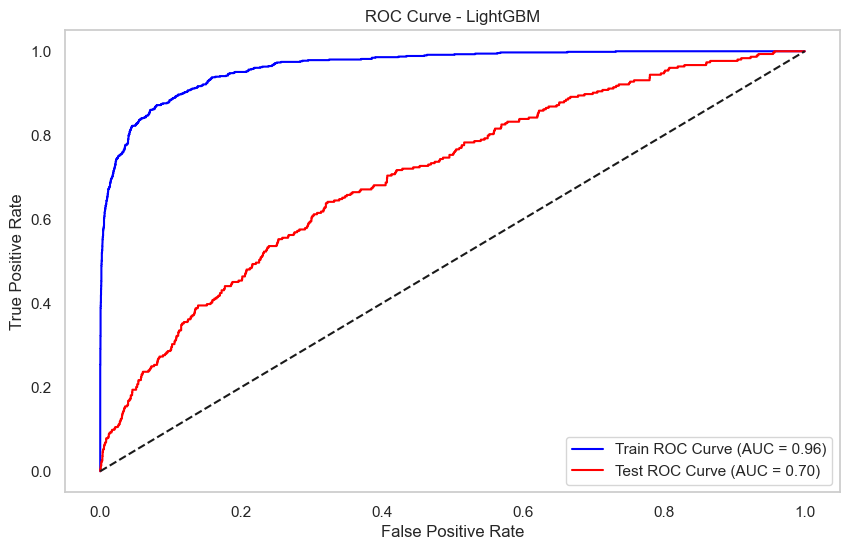

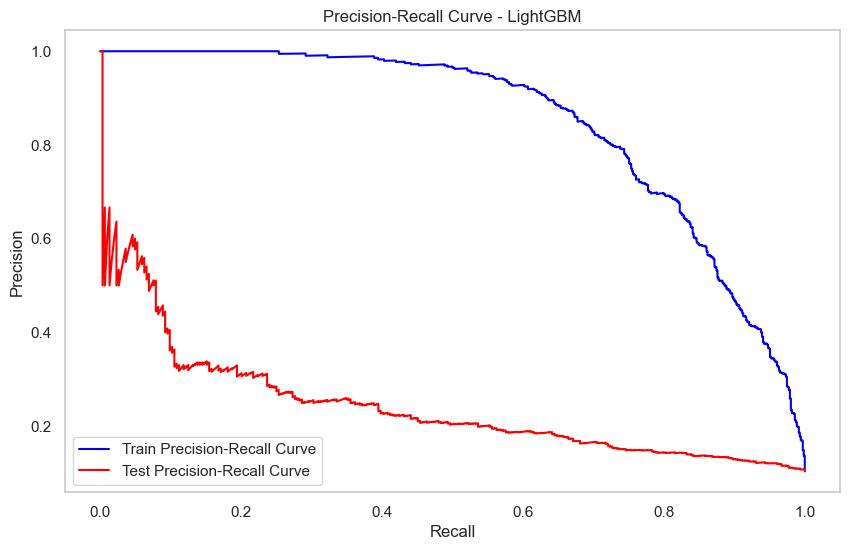


Confusion Matrix - Train (LightGBM, Adjusted Threshold):
[[6123    9]
 [ 392  318]]

Confusion Matrix - Test (LightGBM, Adjusted Threshold):
[[2590   39]
 [ 276   28]]

Classification Report - Train (LightGBM, Adjusted Threshold):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      6132
           1       0.97      0.45      0.61       710

    accuracy                           0.94      6842
   macro avg       0.96      0.72      0.79      6842
weighted avg       0.94      0.94      0.93      6842


Classification Report - Test (LightGBM, Adjusted Threshold):
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2629
           1       0.42      0.09      0.15       304

    accuracy                           0.89      2933
   macro avg       0.66      0.54      0.55      2933
weighted avg       0.85      0.89      0.86      2933



In [961]:
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

# Step 1: Simple LightGBM Classifier without hyperparameter tuning
lgb_model = lgb.LGBMClassifier(random_state=42)

# Fit the model on the training data
lgb_model.fit(X_train, y_train)

# Predictions and probabilities
y_train_proba_lgb = lgb_model.predict_proba(X_train)[:, 1]
y_test_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]

y_train_pred_lgb = (y_train_proba_lgb > 0.5).astype(int)
y_test_pred_lgb = (y_test_proba_lgb > 0.5).astype(int)

# Feature importance
feature_importances_lgb = pd.Series(lgb_model.feature_importances_, index=X.columns)
print("\nFeature Importances for LightGBM:")
print(feature_importances_lgb.sort_values(ascending=False))

# Confusion matrix
print("\nConfusion Matrix - Train (LightGBM):")
print(confusion_matrix(y_train, y_train_pred_lgb))

print("\nConfusion Matrix - Test (LightGBM):")
print(confusion_matrix(y_test, y_test_pred_lgb))

# Classification report
print("\nClassification Report - Train (LightGBM):")
print(classification_report(y_train, y_train_pred_lgb))

print("\nClassification Report - Test (LightGBM):")
print(classification_report(y_test, y_test_pred_lgb))

# ROC Curve and AUC
fpr_train_lgb, tpr_train_lgb, _ = roc_curve(y_train, y_train_proba_lgb)
fpr_test_lgb, tpr_test_lgb, _ = roc_curve(y_test, y_test_proba_lgb)

auc_train_lgb = auc(fpr_train_lgb, tpr_train_lgb)
auc_test_lgb = auc(fpr_test_lgb, tpr_test_lgb)

# KS Statistic
ks_train_lgb = max(tpr_train_lgb - fpr_train_lgb)
ks_test_lgb = max(tpr_test_lgb - fpr_test_lgb)

print(f"\nLightGBM Train AUC: {auc_train_lgb:.3f}")
print(f"LightGBM Train KS: {ks_train_lgb:.3f}")
print(f"\nLightGBM Test AUC: {auc_test_lgb:.3f}")
print(f"LightGBM Test KS: {ks_test_lgb:.3f}")

# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_train_lgb, tpr_train_lgb, label=f'Train ROC Curve (AUC = {auc_train_lgb:.2f})', color='blue')
plt.plot(fpr_test_lgb, tpr_test_lgb, label=f'Test ROC Curve (AUC = {auc_test_lgb:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LightGBM')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Precision-Recall Curve
precision_train_lgb, recall_train_lgb, _ = precision_recall_curve(y_train, y_train_proba_lgb)
precision_test_lgb, recall_test_lgb, _ = precision_recall_curve(y_test, y_test_proba_lgb)

plt.figure(figsize=(10, 6))
plt.plot(recall_train_lgb, precision_train_lgb, label='Train Precision-Recall Curve', color='blue')
plt.plot(recall_test_lgb, precision_test_lgb, label='Test Precision-Recall Curve', color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - LightGBM')
plt.legend(loc='lower left')
plt.grid()
plt.show()

# Adjust threshold (e.g., 0.4)
y_train_pred_lgb_adj = (y_train_proba_lgb > 0.4).astype(int)
y_test_pred_lgb_adj = (y_test_proba_lgb > 0.4).astype(int)

# Confusion Matrix with adjusted threshold
print("\nConfusion Matrix - Train (LightGBM, Adjusted Threshold):")
print(confusion_matrix(y_train, y_train_pred_lgb_adj))

print("\nConfusion Matrix - Test (LightGBM, Adjusted Threshold):")
print(confusion_matrix(y_test, y_test_pred_lgb_adj))

# Classification report with adjusted threshold
print("\nClassification Report - Train (LightGBM, Adjusted Threshold):")
print(classification_report(y_train, y_train_pred_lgb_adj))

print("\nClassification Report - Test (LightGBM, Adjusted Threshold):")
print(classification_report(y_test, y_test_pred_lgb_adj))

- Training vs. Test: Similar to previous models, LightGBM performs well on the training set, but its generalization to the test set is limited, especially for class 1.
- Class Imbalance: As with earlier models, the primary issue is poor recall for class 1, meaning that the model struggles to identify the minority class, although it has relatively high precision.

### **Tuning the LightGBM hyper parameters**

### ** Feature importance of the LightGBM hyper tuning:**

**Checking the Feature importance of the LightGBM hyper tuning model performance**

** Confusion matrix Curve for Feature importance of the LightGBM hyper tuning

**Precision-Recall Curve for Feature importance of the LightGBM hyper tuning

**Ajust the threshold for Feature importance of the LightGBM hyper tuning

### LightGBM Hyper parameters tunning ROC Curve

*** LightGBM Hyper parameters tunning Train ROC Curve ***

*** LightGBM Hyper parameters tunning AUC Train ***

*** LightGBM Hyper parameters tunning KS Train ***

*** LightGBM Hyper parameters tunning Test ROC Curve ***

*** LightGBM Hyper parameters tunning AUC Test ***

*** LightGBM Hyper parameters tunning KS Test ***

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[LightGBM] [Info] Number of positive: 710, number of negative: 6132
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 987
[LightGBM] [Info] Number of data points in the train set: 6842, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.103771 -> initscore=-2.156011
[LightGBM] [Info] Start training from score -2.156011
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

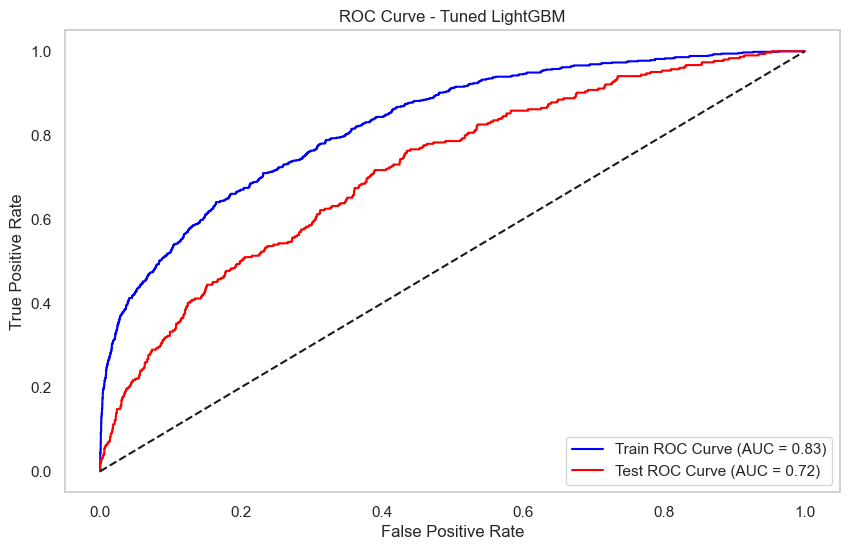

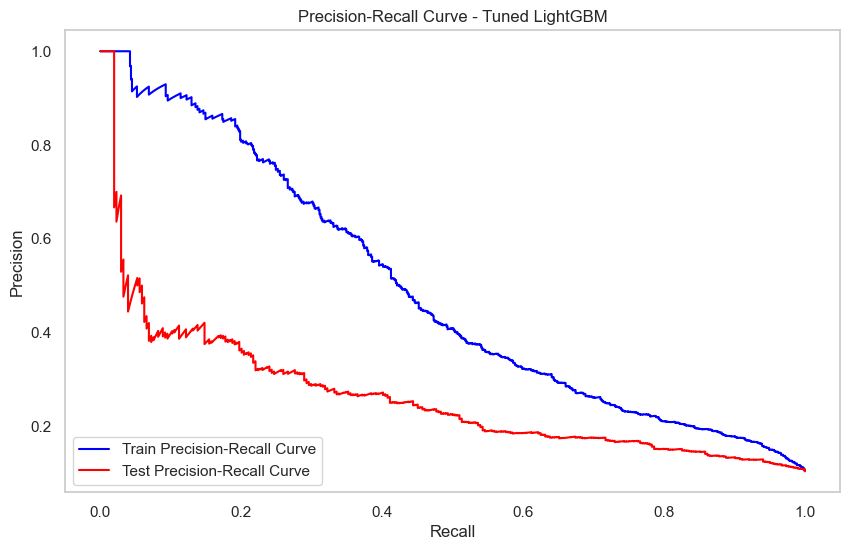


Confusion Matrix - Train (Tuned LightGBM, Adjusted Threshold):
[[6124    8]
 [ 640   70]]

Confusion Matrix - Test (Tuned LightGBM, Adjusted Threshold):
[[2614   15]
 [ 292   12]]

Classification Report - Train (Tuned LightGBM, Adjusted Threshold):
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      6132
           1       0.90      0.10      0.18       710

    accuracy                           0.91      6842
   macro avg       0.90      0.55      0.56      6842
weighted avg       0.90      0.91      0.87      6842


Classification Report - Test (Tuned LightGBM, Adjusted Threshold):
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2629
           1       0.44      0.04      0.07       304

    accuracy                           0.90      2933
   macro avg       0.67      0.52      0.51      2933
weighted avg       0.85      0.90      0.85      2933



In [976]:


# Step 2: Hyperparameter tuning for LightGBM
param_grid_lgb = {
    'n_estimators': [100, 200],
    'max_depth': [-1, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV
grid_search_lgb = GridSearchCV(estimator=lgb.LGBMClassifier(random_state=42),
                               param_grid=param_grid_lgb,
                               scoring='roc_auc',
                               cv=3, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search_lgb.fit(X_train, y_train)

# Best parameters
best_params_lgb = grid_search_lgb.best_params_
print(f"Best parameters for LightGBM: {best_params_lgb}")

# Best estimator
best_lgb_tuned = grid_search_lgb.best_estimator_

# Predictions and probabilities for tuned model
y_train_proba_lgb_tuned = best_lgb_tuned.predict_proba(X_train)[:, 1]
y_test_proba_lgb_tuned = best_lgb_tuned.predict_proba(X_test)[:, 1]


y_train_pred_lgb_tuned = (y_train_proba_lgb_tuned > 0.5).astype(int)
y_test_pred_lgb_tuned = (y_test_proba_lgb_tuned > 0.5).astype(int)

# Feature importance
feature_importances_lgb = pd.Series(best_lgb_tuned.feature_importances_, index=X.columns)
print("\nFeature Importances for LightGBM:")
print(feature_importances_lgb.sort_values(ascending=False))

# Confusion matrix
print("\nConfusion Matrix - Train (LightGBM):")
print(confusion_matrix(y_train, y_train_pred_lgb_tuned))

print("\nConfusion Matrix - Test (LightGBM):")
print(confusion_matrix(y_test, y_test_pred_lgb_tuned))

# Classification report
print("\nClassification Report - Train (LightGBM):")
print(classification_report(y_train, y_train_pred_lgb_tuned))

print("\nClassification Report - Test (LightGBM):")
print(classification_report(y_test, y_test_pred_lgb_tuned))


# ROC Curve and AUC for tuned model
fpr_train_lgb_tuned, tpr_train_lgb_tuned, _ = roc_curve(y_train, y_train_proba_lgb_tuned)
fpr_test_lgb_tuned, tpr_test_lgb_tuned, _ = roc_curve(y_test, y_test_proba_lgb_tuned)

auc_train_lgb_tuned = auc(fpr_train_lgb_tuned, tpr_train_lgb_tuned)
auc_test_lgb_tuned = auc(fpr_test_lgb_tuned, tpr_test_lgb_tuned)

# KS Statistic
ks_train_lgb_tuned = max(tpr_train_lgb_tuned - fpr_train_lgb_tuned)
ks_test_lgb_tuned = max(tpr_test_lgb_tuned - fpr_test_lgb_tuned)

print(f"\nLightGBM Tuned Train AUC: {auc_train_lgb_tuned:.3f}")
print(f"LightGBM Tuned Test AUC: {auc_test_lgb_tuned:.3f}")
print(f"LightGBM Tuned Train KS: {ks_train_lgb_tuned:.3f}")
print(f"LightGBM Tuned Test KS: {ks_test_lgb_tuned:.3f}")

# Plot ROC Curves for tuned model
plt.figure(figsize=(10, 6))
plt.plot(fpr_train_lgb_tuned, tpr_train_lgb_tuned, label=f'Train ROC Curve (AUC = {auc_train_lgb_tuned:.2f})', color='blue')
plt.plot(fpr_test_lgb_tuned, tpr_test_lgb_tuned, label=f'Test ROC Curve (AUC = {auc_test_lgb_tuned:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned LightGBM')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Precision-Recall Curve
precision_train_lgb_tuned, recall_train_lgb_tuned, _ = precision_recall_curve(y_train, y_train_proba_lgb_tuned)
precision_test_lgb_tuned, recall_test_lgb_tuned, _ = precision_recall_curve(y_test, y_test_proba_lgb_tuned)

plt.figure(figsize=(10, 6))
plt.plot(recall_train_lgb_tuned, precision_train_lgb_tuned, label='Train Precision-Recall Curve', color='blue')
plt.plot(recall_test_lgb_tuned, precision_test_lgb_tuned, label='Test Precision-Recall Curve', color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Tuned LightGBM')
plt.legend(loc='lower left')
plt.grid()
plt.show()

# Adjust threshold for tuned model
y_train_pred_lgb_tuned_adj = (y_train_proba_lgb_tuned > 0.4).astype(int)
y_test_pred_lgb_tuned_adj = (y_test_proba_lgb_tuned > 0.4).astype(int)

# Confusion Matrix with adjusted threshold for tuned model
print("\nConfusion Matrix - Train (Tuned LightGBM, Adjusted Threshold):")
print(confusion_matrix(y_train, y_train_pred_lgb_tuned_adj))

print("\nConfusion Matrix - Test (Tuned LightGBM, Adjusted Threshold):")
print(confusion_matrix(y_test, y_test_pred_lgb_tuned_adj))

# Classification report with adjusted threshold for tuned model
print("\nClassification Report - Train (Tuned LightGBM, Adjusted Threshold):")
print(classification_report(y_train, y_train_pred_lgb_tuned_adj))

print("\nClassification Report - Test (Tuned LightGBM, Adjusted Threshold):")
print(classification_report(y_test, y_test_pred_lgb_tuned_adj))

- Training vs. Testing Discrepancy: The model demonstrates high accuracy on the training set but continues to struggle with the minority class, reflected in the low recall for class 1. This indicates potential overfitting, where the model learns well from training data but fails to generalize to unseen data.
- Class Imbalance: Similar to previous models, class imbalance remains a significant challenge, particularly in capturing class 1 instances. The model's ability to predict class 1 remains poor despite hyperparameter tuning.

## LET'S CONSIDER THE MOST IMPORTANT FEATURE LightGBM hyper tuning

### **Feature importance of LightGBM:**

**Checking the most important feature LightGBM Hyper parameters tuning model performance**

** Confusion matrix Curve for most important feature LightGBM Hyper parameters tuning model

**Precision-Recall Curve for most important feature LightGBM Hyper parameters tuning model**

**Ajust the threshold for most important feature LightGBM Hyper parameters tunning model**

### LightGBM most important feature hyper parameters tuning ROC Curve

***  LightGBM most important feature hyper parameters tuning Train ROC Curve ***

***  LightGBM most important feature hyper parameters tuning AUC Train ***

***  LightGBM most important feature hyper parameters tuning KS Train ***

***  LightGBM most important feature hyper parameters tuning Test ROC Curve ***

***  LightGBM most important feature hyper parameters tuning AUC Test***

***  LightGBM most important feature hyper parameters tuning KS Test ***


Feature Importances for Tuned LightGBM:
NoOfGroupCustomers                     920
provinsi_group                         708
Age                                    536
rate                                   395
POutstanding_DPD2                      390
                                      ... 
AmountNextbucket_P1_30_To_P31_60         0
AmountNextbucket_P31_60_To_P61_90        0
AmountNextbucket_P61_90_To_P91_120       0
AmountNextbucket_91_120_To_P121_150      0
Amount_Max_DPD2>180                      0
Length: 66, dtype: int32

Most Important Feature: NoOfGroupCustomers
[LightGBM] [Info] Number of positive: 710, number of negative: 6132
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50
[LightGBM] [Info] Number of data points in the train set: 6842, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.103771 -> init

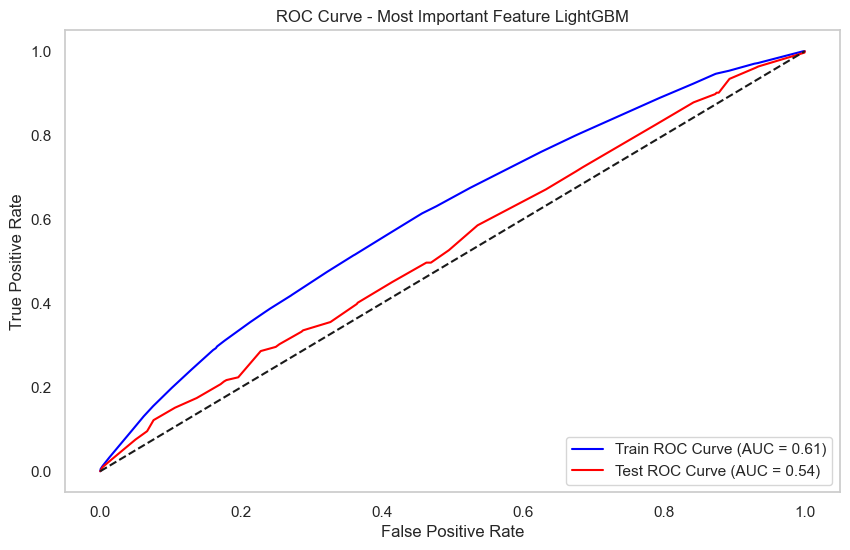


Confusion Matrix - Train (Most Important Feature LightGBM):
[[6132    0]
 [ 710    0]]

Confusion Matrix - Test (Most Important Feature LightGBM):
[[2629    0]
 [ 304    0]]

Classification Report - Train (Most Important Feature LightGBM):
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      6132
           1       0.00      0.00      0.00       710

    accuracy                           0.90      6842
   macro avg       0.45      0.50      0.47      6842
weighted avg       0.80      0.90      0.85      6842


Classification Report - Test (Most Important Feature LightGBM):
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2629
           1       0.00      0.00      0.00       304

    accuracy                           0.90      2933
   macro avg       0.45      0.50      0.47      2933
weighted avg       0.80      0.90      0.85      2933



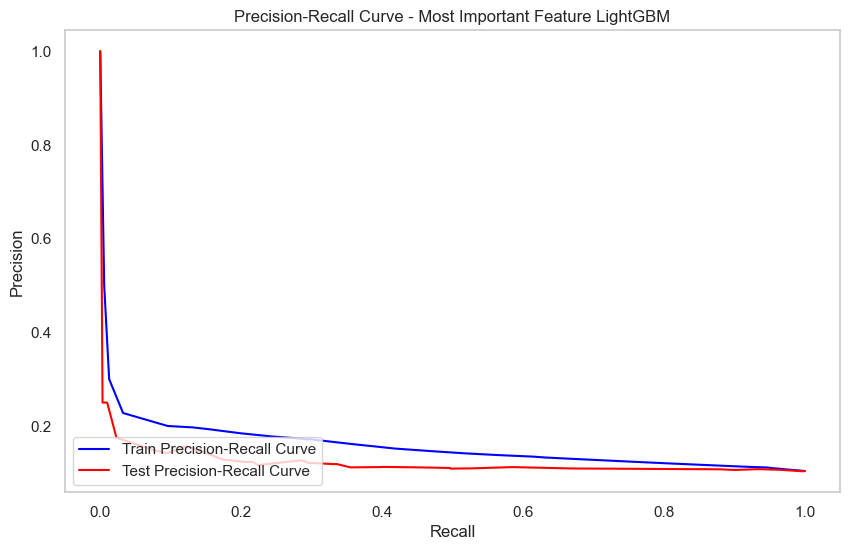


Confusion Matrix - Train (Most Important Feature LightGBM, Adjusted Threshold):
[[6132    0]
 [ 710    0]]

Confusion Matrix - Test (Most Important Feature LightGBM, Adjusted Threshold):
[[2629    0]
 [ 304    0]]

Classification Report - Train (Most Important Feature LightGBM, Adjusted Threshold):
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      6132
           1       0.00      0.00      0.00       710

    accuracy                           0.90      6842
   macro avg       0.45      0.50      0.47      6842
weighted avg       0.80      0.90      0.85      6842


Classification Report - Test (Most Important Feature LightGBM, Adjusted Threshold):
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2629
           1       0.00      0.00      0.00       304

    accuracy                           0.90      2933
   macro avg       0.45      0.50      0.47      2933
weighted avg   

In [991]:
# Step 3: Feature importance of the LightGBM hyperparameter tuning model
feature_importances_lgb_tuned = pd.Series(best_lgb_tuned.feature_importances_, index=X_train.columns)

# Display feature importances
print("\nFeature Importances for Tuned LightGBM:")
print(feature_importances_lgb_tuned.sort_values(ascending=False))

# Identify the most important feature
most_important_feature = feature_importances_lgb_tuned.idxmax()
print(f"\nMost Important Feature: {most_important_feature}")

# Subset the dataset based on the most important feature
X_train_most_important = X_train[[most_important_feature]]
X_test_most_important = X_test[[most_important_feature]]

# Fit a new LightGBM model on the most important feature
lgb_most_important = lgb.LGBMClassifier(**best_params_lgb, random_state=42)
lgb_most_important.fit(X_train_most_important, y_train)

# Predictions and probabilities for the most important feature model
y_train_proba_lgb_most_important = lgb_most_important.predict_proba(X_train_most_important)[:, 1]
y_test_proba_lgb_most_important = lgb_most_important.predict_proba(X_test_most_important)[:, 1]

# ROC Curve and AUC for the most important feature model
fpr_train_lgb_most_important, tpr_train_lgb_most_important, _ = roc_curve(y_train, y_train_proba_lgb_most_important)
fpr_test_lgb_most_important, tpr_test_lgb_most_important, _ = roc_curve(y_test, y_test_proba_lgb_most_important)

auc_train_lgb_most_important = auc(fpr_train_lgb_most_important, tpr_train_lgb_most_important)
auc_test_lgb_most_important = auc(fpr_test_lgb_most_important, tpr_test_lgb_most_important)

# KS Statistic for the most important feature model
ks_train_lgb_most_important = max(tpr_train_lgb_most_important - fpr_train_lgb_most_important)
ks_test_lgb_most_important = max(tpr_test_lgb_most_important - fpr_test_lgb_most_important)

print(f"\nMost Important Feature Model Train AUC: {auc_train_lgb_most_important:.3f}")
print(f"Most Important Feature Model Train KS: {ks_train_lgb_most_important:.3f}")
print(f"\nMost Important Feature Model Test AUC: {auc_test_lgb_most_important:.3f}")
print(f"Most Important Feature Model Test KS: {ks_test_lgb_most_important:.3f}")

# Plot ROC Curves for the most important feature model
plt.figure(figsize=(10, 6))
plt.plot(fpr_train_lgb_most_important, tpr_train_lgb_most_important, label=f'Train ROC Curve (AUC = {auc_train_lgb_most_important:.2f})', color='blue')
plt.plot(fpr_test_lgb_most_important, tpr_test_lgb_most_important, label=f'Test ROC Curve (AUC = {auc_test_lgb_most_important:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Most Important Feature LightGBM')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Confusion Matrix for the most important feature model
y_train_pred_lgb_most_important = (y_train_proba_lgb_most_important > 0.5).astype(int)
y_test_pred_lgb_most_important = (y_test_proba_lgb_most_important > 0.5).astype(int)

print("\nConfusion Matrix - Train (Most Important Feature LightGBM):")
print(confusion_matrix(y_train, y_train_pred_lgb_most_important))

print("\nConfusion Matrix - Test (Most Important Feature LightGBM):")
print(confusion_matrix(y_test, y_test_pred_lgb_most_important))

# Classification report for the most important feature model
print("\nClassification Report - Train (Most Important Feature LightGBM):")
print(classification_report(y_train, y_train_pred_lgb_most_important))

print("\nClassification Report - Test (Most Important Feature LightGBM):")
print(classification_report(y_test, y_test_pred_lgb_most_important))

# Precision-Recall Curve
precision_train_lgb_most_important, recall_train_lgb_most_important, _ = precision_recall_curve(y_train, y_train_proba_lgb_most_important)
precision_test_lgb_most_important, recall_test_lgb_most_important, _ = precision_recall_curve(y_test, y_test_proba_lgb_most_important)

plt.figure(figsize=(10, 6))
plt.plot(recall_train_lgb_most_important, precision_train_lgb_most_important, label='Train Precision-Recall Curve', color='blue')
plt.plot(recall_test_lgb_most_important, precision_test_lgb_most_important, label='Test Precision-Recall Curve', color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Most Important Feature LightGBM')
plt.legend(loc='lower left')
plt.grid()
plt.show()

# Adjust threshold for the most important feature model
threshold = 0.4
y_train_pred_lgb_most_important_adj = (y_train_proba_lgb_most_important > threshold).astype(int)
y_test_pred_lgb_most_important_adj = (y_test_proba_lgb_most_important > threshold).astype(int)

# Confusion Matrix with adjusted threshold
print("\nConfusion Matrix - Train (Most Important Feature LightGBM, Adjusted Threshold):")
print(confusion_matrix(y_train, y_train_pred_lgb_most_important_adj))

print("\nConfusion Matrix - Test (Most Important Feature LightGBM, Adjusted Threshold):")
print(confusion_matrix(y_test, y_test_pred_lgb_most_important_adj))

# Classification report with adjusted threshold
print("\nClassification Report - Train (Most Important Feature LightGBM, Adjusted Threshold):")
print(classification_report(y_train, y_train_pred_lgb_most_important_adj))

print("\nClassification Report - Test (Most Important Feature LightGBM, Adjusted Threshold):")
print(classification_report(y_test, y_test_pred_lgb_most_important_adj))

# LOGISTICS REGRESION

**Let's check the coefficients and find which variables are leading to default max DPD 20 days the first 6 months (Default_20_6) and which can help to reduce the default max DPD 20 days the first 6 months (Default_20_6).**

**Checking the model performance**

**The Precision-Recall Curve for Logistic Regression**

**Let's find out the performance of the model at this threshold.**

*** Logistic Regression ROC Curve ***

*** Logistic Regression Train ROC Curve ***

*** Logistic Regression AUC Train ***

*** Logistic Regression KS Train ***

*** Logistic Regression ROC Curve ***

*** Logistic Regression AUC Test ***

*** Logistic Regression KS Test ***

In [1004]:
final_logistic_df = temp_logistic_df


Logistic Regression Coefficients:
Amount_Max_DPD2_16_30     0.615845
NUMOBS_DPD2               0.517415
Perc_AcumDaysDPD2         0.336937
NoOfGroupCustomers        0.279359
provinsi_group_A2         0.270619
                            ...   
WMDPD2_desc_DPD2         -0.202750
sum_Max_DPD2             -0.239792
provinsi_group_B2        -0.493945
Vintage_Last_Loan_DPD2   -0.577042
Amount_Max_DPD2>15       -0.594693
Length: 87, dtype: float64

Confusion Matrix - Train:
[[6128    9]
 [ 687   18]]

Confusion Matrix - Test:
[[2620    4]
 [ 304    5]]

Classification Report - Train:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      6137
           1       0.67      0.03      0.05       705

    accuracy                           0.90      6842
   macro avg       0.78      0.51      0.50      6842
weighted avg       0.88      0.90      0.85      6842


Classification Report - Test:
              precision    recall  f1-score   support

 

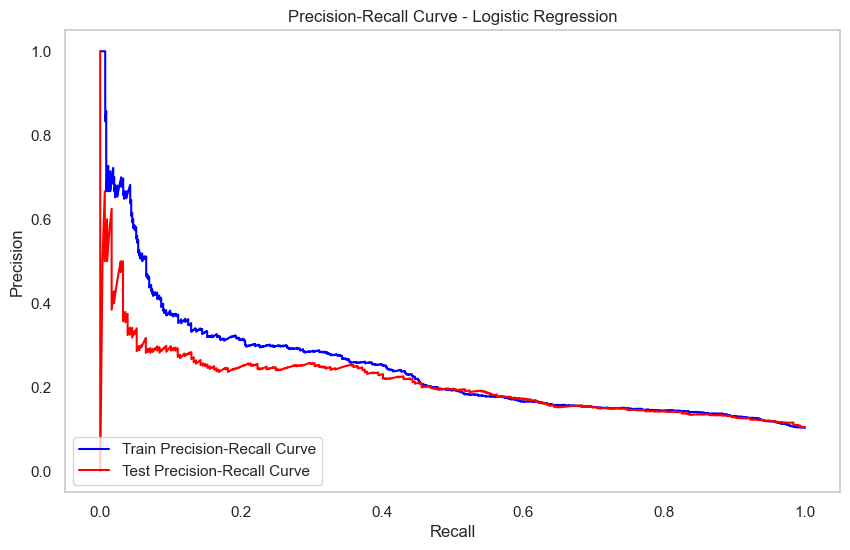

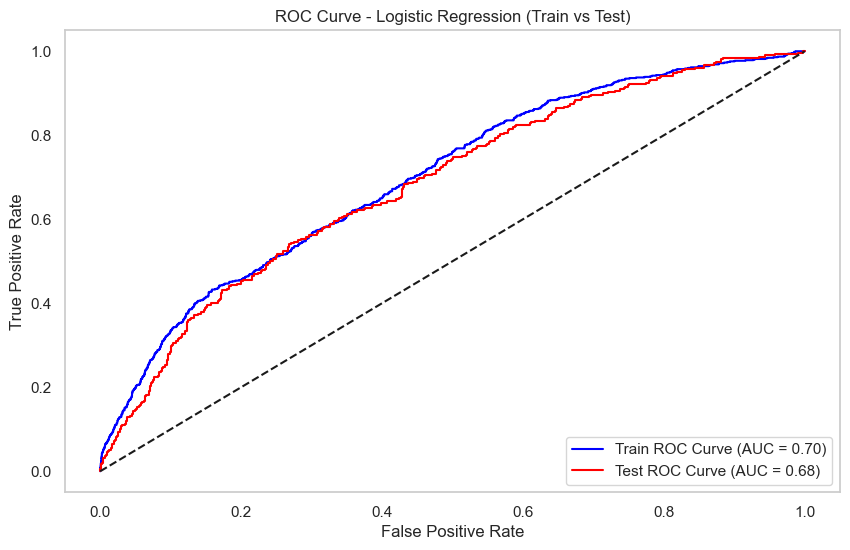

*** Logistic Regression AUC Train: 0.699 ***
*** Logistic Regression KS Train: 0.274 ***
*** Logistic Regression AUC Test: 0.684 ***
*** Logistic Regression KS Test: 0.273 ***


In [1005]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, 
    classification_report, 
    roc_curve, 
    auc, 
    precision_recall_curve
)
from sklearn.preprocessing import StandardScaler

# Assuming your dataset is loaded into a DataFrame named `df`
# Replace `df` with your actual DataFrame variable name
# Let's consider `Default_20_6` as the target variable and other features for the model
X = final_logistic_df.drop(columns=['Default_20_6'])  # Features
y = final_logistic_df['Default_20_6']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional but recommended for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit a logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Check coefficients to see which variables are leading to default and which can help reduce it
coefficients = pd.Series(log_reg.coef_[0], index=X.columns)
print("\nLogistic Regression Coefficients:")
print(coefficients.sort_values(ascending=False))

# Predict probabilities for train and test sets
y_train_proba = log_reg.predict_proba(X_train_scaled)[:, 1]
y_test_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# Predict class labels
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

# Confusion Matrix for training set
print("\nConfusion Matrix - Train:")
print(confusion_matrix(y_train, y_train_pred))

# Confusion Matrix for test set
print("\nConfusion Matrix - Test:")
print(confusion_matrix(y_test, y_test_pred))

# Classification Report for training set
print("\nClassification Report - Train:")
print(classification_report(y_train, y_train_pred))

# Classification Report for test set
print("\nClassification Report - Test:")
print(classification_report(y_test, y_test_pred))

# Precision-Recall Curve for Logistic Regression
precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_proba)
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_proba)

plt.figure(figsize=(10, 6))
plt.plot(recall_train, precision_train, label='Train Precision-Recall Curve', color='blue')
plt.plot(recall_test, precision_test, label='Test Precision-Recall Curve', color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.legend(loc='lower left')
plt.grid()
plt.show()

# ROC Curve for Logistic Regression
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

# AUC for train and test sets
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

# KS Statistic for train and test sets
ks_train = max(tpr_train - fpr_train)
ks_test = max(tpr_test - fpr_test)

# Combined ROC Curve for Train and Test
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC Curve (AUC = {auc_train:.2f})', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {auc_test:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (Train vs Test)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


print(f"*** Logistic Regression AUC Train: {auc_train:.3f} ***")
print(f"*** Logistic Regression KS Train: {ks_train:.3f} ***")

print(f"*** Logistic Regression AUC Test: {auc_test:.3f} ***")
print(f"*** Logistic Regression KS Test: {ks_test:.3f} ***")

- Class Imbalance Challenge: The model exhibits a common issue with class imbalance, performing excellently on the majority class (0) while failing to identify instances of the minority class (1). This results in very low recall and F1 scores for class 1.

- Performance Consistency: While the model maintains high accuracy across both training and testing datasets, this is primarily due to the performance on the majority class. The low performance on the minority class raises concerns about the model's utility in practical scenarios.

<b>Observations:</b>

<table border="1">
    <thead>
        <tr>
            <th>Model</th>
            <th>Confusion Matrix (Train)</th>
            <th>Confusion Matrix (Test)</th>
            <th>AUC (Train)</th>
            <th>AUC (Test)</th>
            <th>KS (Train)</th>
            <th>KS (Test)</th>
            <th>Accuracy (Train)</th>
            <th>Accuracy (Test)</th>
            <th>Precision (Train)</th>
            <th>Precision (Test)</th>
            <th>Recall (Train)</th>
            <th>Recall (Test)</th>
            <th>F1-Score (Train)</th>
            <th>F1-Score (Test)</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Random Forest</td>
            <td>6132, 0, 625, 85</td>
            <td>2626, 3, 298, 6</td>
            <td>0.973</td>
            <td>0.678</td>
            <td>0.833</td>
            <td>0.260</td>
            <td>0.91</td>
            <td>0.90</td>
            <td>0.91 (0) / 1.00 (1)</td>
            <td>0.90 (0) / 0.67 (1)</td>
            <td>1.00 (0) / 0.12 (1)</td>
            <td>1.00 (0) / 0.02 (1)</td>
            <td>0.95 (0) / 0.21 (1)</td>
            <td>0.95 (0) / 0.04 (1)</td>
        </tr>
        <tr>
            <td>XGBoost</td>
            <td>6131, 1, 669, 41</td>
            <td>2626, 3, 297, 7</td>
            <td>0.845</td>
            <td>0.727</td>
            <td>0.518</td>
            <td>0.327</td>
            <td>0.90</td>
            <td>0.90</td>
            <td>0.90 (0) / 0.98 (1)</td>
            <td>0.90 (0) / 0.70 (1)</td>
            <td>1.00 (0) / 0.06 (1)</td>
            <td>1.00 (0) / 0.02 (1)</td>
            <td>0.95 (0) / 0.11 (1)</td>
            <td>0.95 (0) / 0.04 (1)</td>
        </tr>
        <tr>
            <td>LightGBM</td>
            <td>6128, 4, 673, 37</td>
            <td>2625, 4, 295, 9</td>
            <td>0.826</td>
            <td>0.719</td>
            <td>0.479</td>
            <td>0.328</td>
            <td>0.90</td>
            <td>0.90</td>
            <td>0.90 (0) / 0.90 (1)</td>
            <td>0.90 (0) / 0.69 (1)</td>
            <td>1.00 (0) / 0.05 (1)</td>
            <td>1.00 (0) / 0.03 (1)</td>
            <td>0.95 (0) / 0.10 (1)</td>
            <td>0.95 (0) / 0.06 (1)</td>
        </tr>
        <tr>
            <td>Logistic Regression</td>
            <td>6128, 9, 687, 18</td>
            <td>2620, 4, 304, 5</td>
            <td>0.699</td>
            <td>0.684</td>
            <td>0.274</td>
            <td>0.273</td>
            <td>0.90</td>
            <td>0.89</td>
            <td>0.90 (0) / 0.67 (1)</td>
            <td>0.90 (0) / 0.56 (1)</td>
            <td>1.00 (0) / 0.03 (1)</td>
            <td>1.00 (0) / 0.02 (1)</td>
            <td>0.95 (0) / 0.05 (1)</td>
            <td>0.94 (0) / 0.03 (1)</td>
        </tr>
    </tbody>
</table>


<h3>Insights</h3>

<h5>Overall Performance:</h5>

<div style='font-size:12px';>
<b>XGBoost</b> is the most balanced model overall, having the highest Test AUC and Test KS, while maintaining a high Test Accuracy and Precision.
<b>LightGBM</b> is also a strong candidate, showing competitive performance with the highest Test KS and a good balance in other metrics.

<h5>Class Imbalance:</h5>
<div style='font-size:12px';>All models struggled with the positive class (1) prediction, as indicated by the confusion matrices showing many true negatives and few true positives. This suggests a possible class imbalance issue in the dataset.</div>

#### Trying to further fine-tune the XGboost with additional feature `scale_pos_weight`

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': None, 'n_estimators': 100, 'scale_pos_weight': 5, 'subsample': 0.8}

Feature Importances for Tuned XGBoost:
provinsi_group                           0.069964
sum_Max_DPD2                             0.069935
Perc_AcumDaysDPD2                        0.066785
Amount_Max_DPD2>0                        0.060609
WMDPD2_desc_DPD2                         0.054506
                                           ...   
AmountNextbucket_P31_60_To_P61_90        0.000000
AmountNextbucket_P61_90_To_P91_120       0.000000
AmountNextbucket_91_120_To_P121_150      0.000000
AmountNextbucket_P121_150_To_P151_180    0.000000
Amount_Max_DPD2>180                      0.000000
Length: 66, dtype: float32

Confusion Matrix - Train (XGBoost):
[[6048   84]
 [ 528  182]]

Confusion Matrix - Test (XGBoost):
[[2584   45]
 [ 266   38]]

Classification Report - Train (X

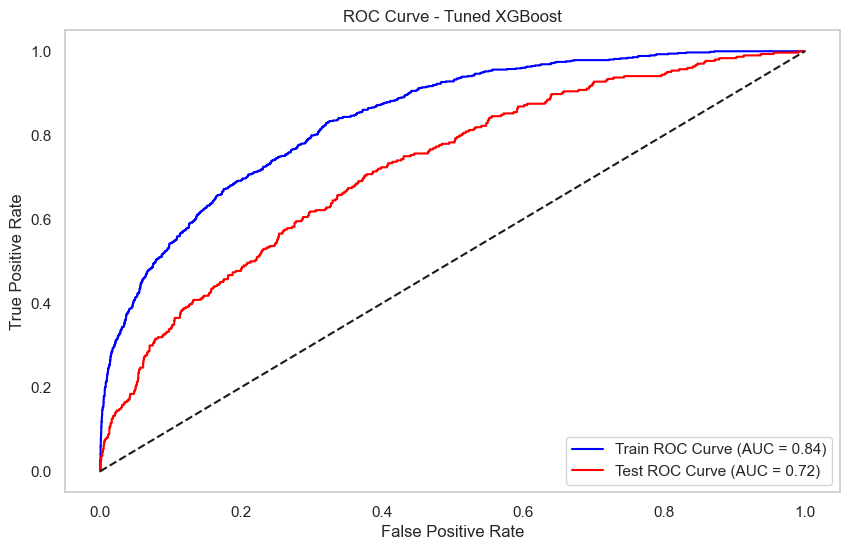

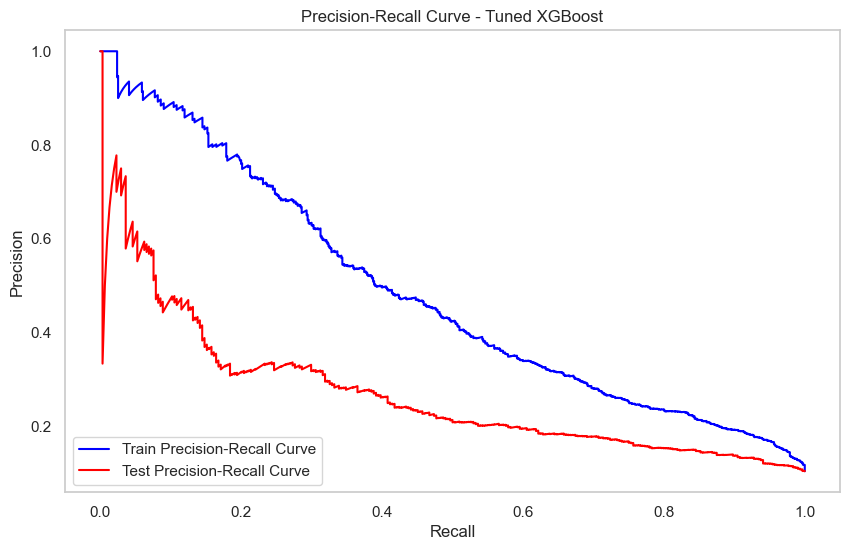


Confusion Matrix - Train (Tuned XGBoost, Adjusted Threshold):
[[5428  704]
 [ 307  403]]

Confusion Matrix - Test (Tuned XGBoost, Adjusted Threshold):
[[2288  341]
 [ 183  121]]

Classification Report - Train (Tuned XGBoost, Adjusted Threshold):
              precision    recall  f1-score   support

           0       0.95      0.89      0.91      6132
           1       0.36      0.57      0.44       710

    accuracy                           0.85      6842
   macro avg       0.66      0.73      0.68      6842
weighted avg       0.89      0.85      0.87      6842


Classification Report - Test (Tuned XGBoost, Adjusted Threshold):
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      2629
           1       0.26      0.40      0.32       304

    accuracy                           0.82      2933
   macro avg       0.59      0.63      0.61      2933
weighted avg       0.86      0.82      0.84      2933


XGBoost Tuned Train KS (Adjuste

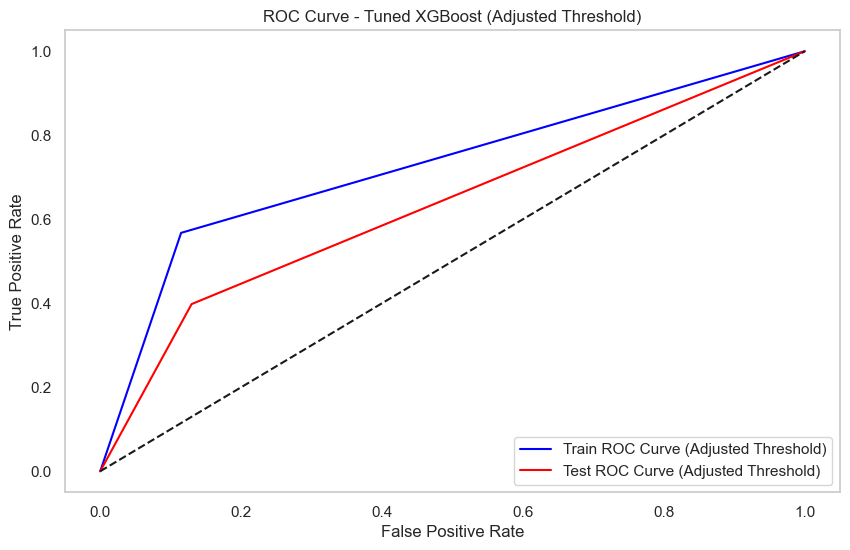

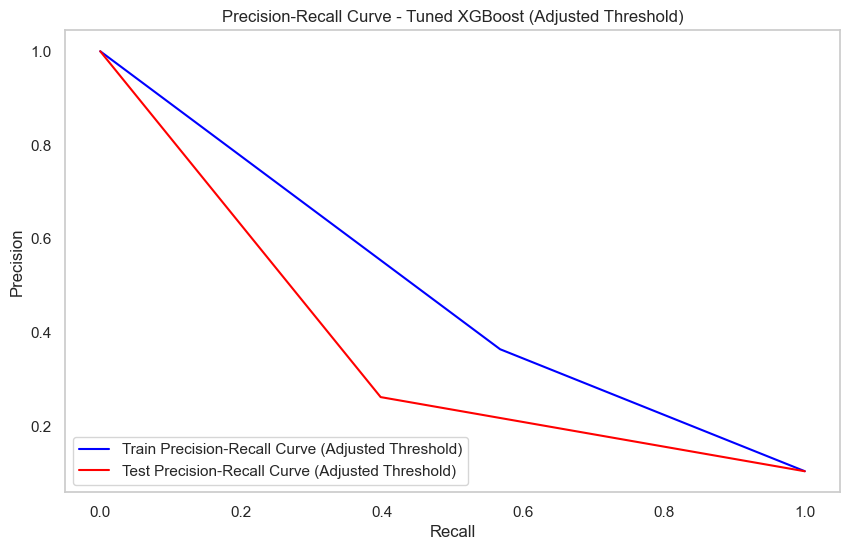

In [1095]:
# Split data into train and test sets (70%, 30%)
X = final_df.drop(columns=['Default_20_6'])  # Features
y = final_df['Default_20_6']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# Step 2: Hyperparameter tuning for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [None, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [5, 6, 9]
}

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb.XGBClassifier(random_state=42), 
                                param_grid=param_grid_xgb, 
                                scoring='roc_auc', 
                                cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search_xgb.fit(X_train, y_train)

# Best parameters
best_params_xgb = grid_search_xgb.best_params_
print(f"Best parameters for XGBoost: {best_params_xgb}")

# Best estimator
best_xgb_tuned = grid_search_xgb.best_estimator_

# Predictions and probabilities for tuned model
y_train_proba_xgb_tuned = best_xgb_tuned.predict_proba(X_train)[:, 1]
y_test_proba_xgb_tuned = best_xgb_tuned.predict_proba(X_test)[:, 1]

y_train_pred_xgb = (y_train_proba_xgb_tuned > 0.5).astype(int)
y_test_pred_xgb = (y_test_proba_xgb_tuned > 0.5).astype(int)

# Feature importance
feature_importances_xgb = pd.Series(best_xgb_tuned.feature_importances_, index=X.columns)
print("\nFeature Importances for Tuned XGBoost:")
print(feature_importances_xgb.sort_values(ascending=False))

# Confusion matrix
print("\nConfusion Matrix - Train (XGBoost):")
print(confusion_matrix(y_train, y_train_pred_xgb))

print("\nConfusion Matrix - Test (XGBoost):")
print(confusion_matrix(y_test, y_test_pred_xgb))

# Classification report
print("\nClassification Report - Train (XGBoost):")
print(classification_report(y_train, y_train_pred_xgb))

print("\nClassification Report - Test (XGBoost):")
print(classification_report(y_test, y_test_pred_xgb))


# ROC Curve and AUC for tuned model
fpr_train_xgb_tuned, tpr_train_xgb_tuned, _ = roc_curve(y_train, y_train_proba_xgb_tuned)
fpr_test_xgb_tuned, tpr_test_xgb_tuned, _ = roc_curve(y_test, y_test_proba_xgb_tuned)

auc_train_xgb_tuned = auc(fpr_train_xgb_tuned, tpr_train_xgb_tuned)
auc_test_xgb_tuned = auc(fpr_test_xgb_tuned, tpr_test_xgb_tuned)

# KS Statistic
ks_train_xgb_tuned = max(tpr_train_xgb_tuned - fpr_train_xgb_tuned)
ks_test_xgb_tuned = max(tpr_test_xgb_tuned - fpr_test_xgb_tuned)

print(f"\nXGBoost Tuned Train AUC: {auc_train_xgb_tuned:.3f}")
print(f"XGBoost Tuned Test AUC: {auc_test_xgb_tuned:.3f}")
print(f"XGBoost Tuned Train KS: {ks_train_xgb_tuned:.3f}")
print(f"XGBoost Tuned Test KS: {ks_test_xgb_tuned:.3f}")

# Plot ROC Curves for tuned model
plt.figure(figsize=(10, 6))
plt.plot(fpr_train_xgb_tuned, tpr_train_xgb_tuned, label=f'Train ROC Curve (AUC = {auc_train_xgb_tuned:.2f})', color='blue')
plt.plot(fpr_test_xgb_tuned, tpr_test_xgb_tuned, label=f'Test ROC Curve (AUC = {auc_test_xgb_tuned:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned XGBoost')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Precision-Recall Curve
precision_train_xgb_tuned, recall_train_xgb_tuned, _ = precision_recall_curve(y_train, y_train_proba_xgb_tuned)
precision_test_xgb_tuned, recall_test_xgb_tuned, _ = precision_recall_curve(y_test, y_test_proba_xgb_tuned)

plt.figure(figsize=(10, 6))
plt.plot(recall_train_xgb_tuned, precision_train_xgb_tuned, label='Train Precision-Recall Curve', color='blue')
plt.plot(recall_test_xgb_tuned, precision_test_xgb_tuned, label='Test Precision-Recall Curve', color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Tuned XGBoost')
plt.legend(loc='lower left')
plt.grid()
plt.show()

# Adjust threshold for tuned model
y_train_pred_xgb_tuned_adj = (y_train_proba_xgb_tuned > 0.4).astype(int)
y_test_pred_xgb_tuned_adj = (y_test_proba_xgb_tuned > 0.4).astype(int)

# Confusion Matrix with adjusted threshold for tuned model
print("\nConfusion Matrix - Train (Tuned XGBoost, Adjusted Threshold):")
print(confusion_matrix(y_train, y_train_pred_xgb_tuned_adj))

print("\nConfusion Matrix - Test (Tuned XGBoost, Adjusted Threshold):")
print(confusion_matrix(y_test, y_test_pred_xgb_tuned_adj))

# Classification report with adjusted threshold for tuned model
print("\nClassification Report - Train (Tuned XGBoost, Adjusted Threshold):")
print(classification_report(y_train, y_train_pred_xgb_tuned_adj))

print("\nClassification Report - Test (Tuned XGBoost, Adjusted Threshold):")
print(classification_report(y_test, y_test_pred_xgb_tuned_adj))

# Calculate TPR and FPR based on adjusted threshold
fpr_train_xgb_tuned_adj, tpr_train_xgb_tuned_adj, _ = roc_curve(y_train, y_train_pred_xgb_tuned_adj)
fpr_test_xgb_tuned_adj, tpr_test_xgb_tuned_adj, _ = roc_curve(y_test, y_test_pred_xgb_tuned_adj)

# Calculate KS Statistic (max difference between TPR and FPR)
ks_train_xgb_tuned_adj = max(tpr_train_xgb_tuned_adj - fpr_train_xgb_tuned_adj)
ks_test_xgb_tuned_adj = max(tpr_test_xgb_tuned_adj - fpr_test_xgb_tuned_adj)

print(f"\nXGBoost Tuned Train KS (Adjusted Threshold): {ks_train_xgb_tuned_adj:.3f}")
print(f"XGBoost Tuned Test KS (Adjusted Threshold): {ks_test_xgb_tuned_adj:.3f}")

# Plot ROC Curves after adjusting threshold
plt.figure(figsize=(10, 6))
plt.plot(fpr_train_xgb_tuned_adj, tpr_train_xgb_tuned_adj, label=f'Train ROC Curve (Adjusted Threshold)', color='blue')
plt.plot(fpr_test_xgb_tuned_adj, tpr_test_xgb_tuned_adj, label=f'Test ROC Curve (Adjusted Threshold)', color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned XGBoost (Adjusted Threshold)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Plot Precision-Recall Curve after adjusting threshold
precision_train_xgb_tuned_adj, recall_train_xgb_tuned_adj, _ = precision_recall_curve(y_train, y_train_pred_xgb_tuned_adj)
precision_test_xgb_tuned_adj, recall_test_xgb_tuned_adj, _ = precision_recall_curve(y_test, y_test_pred_xgb_tuned_adj)

plt.figure(figsize=(10, 6))
plt.plot(recall_train_xgb_tuned_adj, precision_train_xgb_tuned_adj, label='Train Precision-Recall Curve (Adjusted Threshold)', color='blue')
plt.plot(recall_test_xgb_tuned_adj, precision_test_xgb_tuned_adj, label='Test Precision-Recall Curve (Adjusted Threshold)', color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Tuned XGBoost (Adjusted Threshold)')
plt.legend(loc='lower left')
plt.grid()
plt.show()

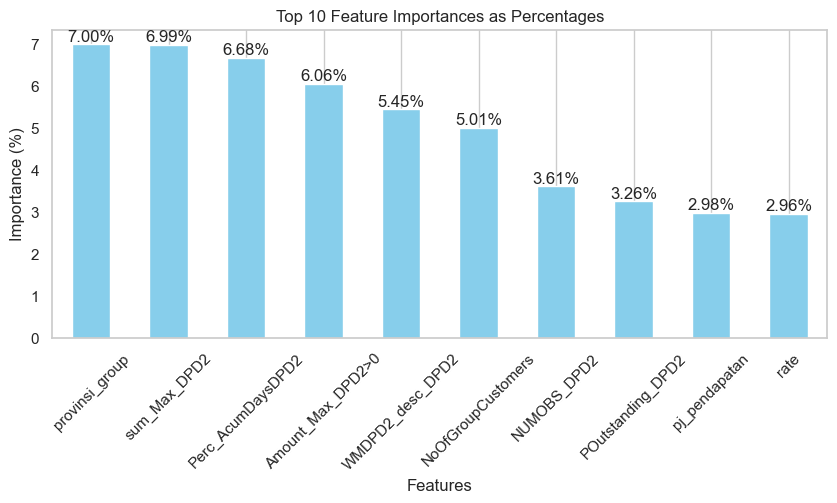

In [1096]:
# Convert feature importances to percentages
feature_importances_percent = feature_importances_xgb / feature_importances_xgb.sum() * 100

# Get the top 10 features
top_features = feature_importances_percent.nlargest(10)

# Plotting
plt.figure(figsize=(10, 4))
bars = top_features.plot(kind='bar', color='skyblue')
plt.title('Top 10 Feature Importances as Percentages')
plt.xlabel('Features')
plt.ylabel('Importance (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding data labels on top of the bars
for bar in bars.patches:
    plt.annotate(f'{bar.get_height():.2f}%', 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom')

# Show the plot
plt.show()

<table border="1" cellpadding="5" cellspacing="0">
    <thead>
        <tr>
            <th>Model</th>
            <th>Train AUC</th>
            <th>Test AUC</th>
            <th>Train KS</th>
            <th>Test KS</th>
            <th>Train Accuracy</th>
            <th>Test Accuracy</th>
            <th>Train Precision (0,1)</th>
            <th>Test Precision (0,1)</th>
            <th>Train Recall (0,1)</th>
            <th>Test Recall (0,1)</th>
            <th>Train F1-Score (0,1)</th>
            <th>Test F1-Score (0,1)</th>
            <th>Confusion Matrix (Train)</th>
            <th>Confusion Matrix (Test)</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><strong>XGBoost (without scale_pos_weight)</strong></td>
            <td>0.845</td>
            <td>0.727</td>
            <td>0.518</td>
            <td>0.327</td>
            <td>0.9</td>
            <td>0.9</td>
            <td>0.9, 0.06</td>
            <td>0.9, 0.02</td>
            <td>1, 0.06</td>
            <td>1, 0.02</td>
            <td>0.95, 0.11</td>
            <td>0.95, 0.04</td>
            <td>[[6131, 1], [669, 41]]</td>
            <td>[[2626, 3], [297, 7]]</td>
        </tr>
        <tr>
            <td><strong>XGBoost scale_pos_weight=0.5 </strong></td>
            <td>0.841</td>
            <td>0.723</td>
            <td>0.508</td>
            <td>0.329</td>
            <td>0.91</td>
            <td>0.89</td>
            <td>0.92, 0.68</td>
            <td>0.91, 0.46</td>
            <td>0.99, 0.26</td>
            <td>0.98, 0.12</td>
            <td>0.94, 0.37</td>
            <td>0.94, 0.2</td>
            <td>[[6048, 84], [528, 182]]</td>
            <td>[[2584, 45], [266, 38]]</td>
        </tr>
        <tr>
            <td><strong>Threshold Adjusted XGBoost (0.4)</strong></td>
            <td>0.841</td>
            <td>0.723</td>
            <td>0.508</td>
            <td>0.329</td>
            <td>0.88</td>
            <td>0.86</td>
            <td>0.90, 0.62</td>
            <td>0.88, 0.45</td>
            <td>0.92, 0.39</td>
            <td>0.91, 0.26</td>
            <td>0.91, 0.48</td>
            <td>0.89, 0.33</td>
            <td>[[5910, 222], [462, 248]]</td>
            <td>[[2502, 127], [230, 74]]</td>
        </tr>
    </tbody>
</table>

## **Actionable Insights and Business Recommendations**

<h5>Focus on Risk Identification:</h5>

Use the tuned model to identify high-risk customers. This helps in taking preemptive actions, such as requiring additional documentation or conducting further financial assessments.

<h5>Threshold Adjustment:</h5>

Consider adjusting the classification threshold further based on business needs. If you need more cautious lending, lowering the threshold may capture even more defaults.
<h5>Feature Importance Analysis:</h5>

The top 10 features for identifying potential loan defaulters include geographic location (provinsi_group), cumulative maximum days past due (sum_Max_DPD2), and the percentage of accumulated days past due (Perc_AcumDaysDPD2), which all indicate the likelihood of default. Additional indicators such as the presence of any days past due (Amount_Max_DPD2>0) and outstanding principal amounts (POutstanding_DPD2) highlight customers with troubling repayment histories. Customer income (pj_pendapatan) and interest rates (rate) further provide insight into financial strain that may increase default risk. Focusing on these features can help businesses implement targeted risk management strategies to mitigate potential losses.

<h5>Targeted Communication:</h5>

Use the insights from the model to design targeted communication strategies for high-risk customers. This could involve personalized financial advice or offering financial products that help them manage their debt better.

<h5>Ongoing Monitoring and Updates:</h5>

Regularly monitor the model's performance. As economic conditions and borrower behavior change, the model may need updates or retraining to maintain its effectiveness.
<h5>Test New Features:</h5>

Consider adding new features that could help improve the model’s performance, such as behavioral data, recent spending patterns, or changes in income. Conduct feature engineering to find the most predictive variables.
<h5>Evaluate Costs of False Positives:</h5>

Understand the business implications of false positives. Analyze whether the cost of investigating flagged defaults outweighs the potential losses from missed defaults.